In [1]:
# Extract and save data from database in AWS
import db_utils as dbu
# Get descritve informarion from the dataframe
import extract_info as extract
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Creates plots for data
import plot as plo
# Tranform dataframe and columns
import pre_processing as prep   
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import statsmodels.formula.api as smf

# DataBase

In this section the RDSDatabaseConnector class from db_utils.py was used to connect to AWS RDS and download the data into the local machine.

In [2]:
# Read the AWS RDS credentials from yaml file
db_credentials = dbu.read_credentials("/Users/ChAre/OneDrive/Desktop/aicore/EDA_finance/credentials.yaml")

In [3]:
# Initialise RDSDatabaseConnector class
db_connector = dbu.RDSDatabaseConnector(db_credentials)

A connection was made, the data extracted and saved as a csv file into the local machine using save_data() method. This class method also called the methods for connecting and extracting the data.

In [5]:
# Connect to the AWS RDS, extract and save the data
db_connector.save_data()

: 

Then the data was loaded into python as a dataframe.

In [ ]:
# Load data into pyhton
df_unclean = db_connector.load_data("./loan_payments")

# Data preprocessing

In this section the dataframe colums were transformed to their appropriate data type, missing values were removed or imputed, the data was transformed to correct skeweness, outlier were removed and overly correlated columns were dropped.

#### Transforming columns

In [ ]:
# Inspect the columns data types
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

Not all columns were converted to their correct data type especially those who are categorical or dates type data. Therefore the columns were transformed using the methods in the DataTransform class in the pre_processing.py file.

In [ ]:
# Create instance of preprocessing of DataTransform class for preprocessing
df_prep = prep.DataTransform(df_unclean)

In [ ]:
# Transform columns into the categorical data type
df_prep.category_transform(["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "application_type", "employment_length", "policy_code", "term"])

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade  ... recoveries  \
0      36 months      7.49      248.82     A        A4  ...       0.00   
1      36 months      6.99      407.52     A        A3  ...       0.00   
2      36 months      7.49      497.63     A        A4  ...       0.00   
3      36 months     14.31      514.93     C        C4  ...       0.00   
4      36 months      6.03      456.54     A        A1  ...       0.00   
...          ...       ...         ...   ...       ...  ...        ...   
54226  36 months      9.01      159.03     B        B2  ...       0.00   
54227  36 months     10.59      162.73     C        C2  ...       0.00   
54228  36 months      7.43      108.77     A        A2  ...       0.00   
54229  36 months      7.43      155.38     A        A2  ...       0.00   
54230  36 months     11.54      164.98     C        C5  ...     182.27   

      collection_recovery_fee  last_payment_date last_payment_amount  \
0                        0.00           Jan-2022              248.82   
1                        0.00           Jan-2022              407.52   
2                        0.00           Oct-2021            12850.16   
3                        0.00           Jun-2021            13899.67   
4                        0.00           Jan-2022              456.54   
...                       ...                ...                 ...   
54226                    0.00           Jul-2016              160.61   
54227                    0.00           Oct-2016              490.01   
54228                    0.00           Sep-2016              110.58   
54229                    0.00           Mar-2014                0.00   
54230                    1.84           Mar-2014              164.97   

      next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0              Feb-2022              Jan-2022                        0.0   
1              Feb-2022              Jan-2022                        0.0   
2                   NaN              Oct-2021                        0.0   
3                   NaN              Jun-2021                        0.0   
4              Feb-2022              Jan-2022                        0.0   
...                 ...                   ...                        ...   
54226               NaN              Jul-2016                        NaN   
54227               NaN              Sep-2016                        0.0   
54228          Sep-2016              May-2013                        NaN   
54229               NaN              May-2013                        NaN   
54230          Dec-2014              Jan-2015                        NaN   

      mths_since_last_major_derog  policy_code  application_type  
0                             5.0            1        INDIVIDUAL  
1                             NaN            1        INDIVIDUAL  
2                             NaN            1        INDIVIDUAL  
3                             NaN            1        INDIVIDUAL  
4                             NaN            1        INDIVIDUAL  
...                

In [ ]:
# Convert columns to date type data
df_prep.date_transform(["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"])

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade  ... recoveries  \
0      36 months      7.49      248.82     A        A4  ...       0.00   
1      36 months      6.99      407.52     A        A3  ...       0.00   
2      36 months      7.49      497.63     A        A4  ...       0.00   
3      36 months     14.31      514.93     C        C4  ...       0.00   
4      36 months      6.03      456.54     A        A1  ...       0.00   
...          ...       ...         ...   ...       ...  ...        ...   
54226  36 months      9.01      159.03     B        B2  ...       0.00   
54227  36 months     10.59      162.73     C        C2  ...       0.00   
54228  36 months      7.43      108.77     A        A2  ...       0.00   
54229  36 months      7.43      155.38     A        A2  ...       0.00   
54230  36 months     11.54      164.98     C        C5  ...     182.27   

      collection_recovery_fee  last_payment_date last_payment_amount  \
0                        0.00         2022-01-01              248.82   
1                        0.00         2022-01-01              407.52   
2                        0.00         2021-10-01            12850.16   
3                        0.00         2021-06-01            13899.67   
4                        0.00         2022-01-01              456.54   
...                       ...                ...                 ...   
54226                    0.00         2016-07-01              160.61   
54227                    0.00         2016-10-01              490.01   
54228                    0.00         2016-09-01              110.58   
54229                    0.00         2014-03-01                0.00   
54230                    1.84         2014-03-01              164.97   

      next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0            2022-02-01            2022-01-01                        0.0   
1            2022-02-01            2022-01-01                        0.0   
2                   NaT            2021-10-01                        0.0   
3                   NaT            2021-06-01                        0.0   
4            2022-02-01            2022-01-01                        0.0   
...                 ...                   ...                        ...   
54226               NaT            2016-07-01                        NaN   
54227               NaT            2016-09-01                        0.0   
54228        2016-09-01            2013-05-01                        NaN   
54229               NaT            2013-05-01                        NaN   
54230        2014-12-01            2015-01-01                        NaN   

      mths_since_last_major_derog  policy_code  application_type  
0                             5.0            1        INDIVIDUAL  
1                             NaN            1        INDIVIDUAL  
2                             NaN            1        INDIVIDUAL  
3                             NaN            1        INDIVIDUAL  
4                             NaN            1        INDIVIDUAL  
...                

Although the term column had has the "month" next to the actual value, this data would be more useful as numeric since this colums tell us the number of motnhly payment to the loan, which could  be use for calculations. However, first it was converted to string to remove "month" and then was converted to the integer type and the column name was updated to "term_in_months" to undertand the context of the numeric data.

In [ ]:
# Convert column values into strings
df_prep.string_transform(["term"])

# Remove unwanted characters from the column values
df_prep.remove_characters("term", ["months"])

# Transform column values to numeric
df_prep.numeric_transform(["term"])

#Rename column to reflect the unit for the values
df_prep.rename_column("term", "term_in_months")

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ... recoveries  \
0                36.0      7.49      248.82     A        A4  ...       0.00   
1                36.0      6.99      407.52     A        A3  ...       0.00   
2                36.0      7.49      497.63     A        A4  ...       0.00   
3                36.0     14.31      514.93     C        C4  ...       0.00   
4                36.0      6.03      456.54     A        A1  ...       0.00   
...               ...       ...         ...   ...       ...  ...        ...   
54226            36.0      9.01      159.03     B        B2  ...       0.00   
54227            36.0     10.59      162.73     C        C2  ...       0.00   
54228            36.0      7.43      108.77     A        A2  ...       0.00   
54229            36.0      7.43      155.38     A        A2  ...       0.00   
54230            36.0     11.54      164.98     C        C5  ...     182.27   

      collection_recovery_fee  last_payment_date last_payment_amount  \
0                        0.00         2022-01-01              248.82   
1                        0.00         2022-01-01              407.52   
2                        0.00         2021-10-01            12850.16   
3                        0.00         2021-06-01            13899.67   
4                        0.00         2022-01-01              456.54   
...                       ...                ...                 ...   
54226                    0.00         2016-07-01              160.61   
54227                    0.00         2016-10-01              490.01   
54228                    0.00         2016-09-01              110.58   
54229                    0.00         2014-03-01                0.00   
54230                    1.84         2014-03-01              164.97   

      next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0            2022-02-01            2022-01-01                        0.0   
1            2022-02-01            2022-01-01                        0.0   
2                   NaT            2021-10-01                        0.0   
3                   NaT            2021-06-01                        0.0   
4            2022-02-01            2022-01-01                        0.0   
...                 ...                   ...                        ...   
54226               NaT            2016-07-01                        NaN   
54227               NaT            2016-09-01                        0.0   
54228        2016-09-01            2013-05-01                        NaN   
54229               NaT            2013-05-01                        NaN   
54230        2014-12-01            2015-01-01                        NaN   

      mths_since_last_major_derog  policy_code  application_type  
0                             5.0            1        INDIVIDUAL  
1                             NaN            1        INDIVIDUAL  
2                             NaN            1        INDIVIDUAL  
3                             NaN            1        INDIVIDUAL  
4                         

Converted loan status subcategories that begun "Does not meet the credit policy.  Status: Charged Off/Fully Paid" inot either Charged Off or Fully Paid.

In [ ]:
df_prep.dataframe["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid", "Fully Paid", inplace=True)
df_prep.dataframe["loan_status"].replace("Does not meet the credit policy. Status:Charged Off", "Charged Off", inplace=True)
df_prep.dataframe["loan_status"].replace("Late (31-120 days)", "Late", inplace=True)
df_prep.dataframe["loan_status"].replace("Late (16-30 days)", "Late", inplace=True)

#### Removing/imputing missing values

In [ ]:
# Create DataFrameInfo instance to extract useful information from the dataframe.
df_inf = extract.DataFrameInfo(df_prep.dataframe)

In [ ]:
# Check the data types of the columns after the transformations.
df_inf.check_columns_type()

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term_in_months                        float64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

The percentage of null per column of the dataframe was generated, to visualise the proportion on missing values across the whole data and to undertand which columns will need further pre_processing.

In [ ]:
# Generate a count/percentage count of NULL values in each column
df_inf.count_null(percentage=True)

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term_in_months                  8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

Base on the percentage of missing data I decided to:

Drop:
 - mths_since_last_delinq:        57.2% missing values
 - mths_since_last_record:        88.6% missing values
 - mths_since_last_major_derog:   86.2% missing values
 
 Based on the large proprotion of missing data. Although these data could be imputed if needed it would most likely require machine learning and therefore an extended period of time. 

Impute:
- funded_amount:                   5.5% missing values
- term_in_months:                  8.8% missing values
- int_rate:                        9.5% missing values
- employment_length:               3.9% missing values
- last_payment_date:               0.1% missing values
- last_credit_pull_date:           0.013% missing values
- collections_12_mths_ex_med:      0.094% missing values
- next_payment_date:               86.2%  missing values

Although the next_payment_date column has 86.2% of missing values, it may be useful to project the profit for the following month but I chose to impute it. I also prioritise imputing values rather than dropping rows since it  will reduce the data in other column decreasing the accuracy of imputation for other values  and inference made from the data.

In [ ]:
# Dropping columns
df_prep.remove_columns(["mths_since_last_delinq", "mths_since_last_record", "mths_since_last_major_derog"])

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

Normality test were carried on numerical and date type columns to undertand their distribution to select wether the mean, media or mode is the most appropriate method for imputation.Therefore, the Plotter class was used to visualise the data.

In [ ]:
# Initiate instance
plots = plo.Plotter(df_prep.dataframe)

##### Funded amount

Statistics=4491.436, p=0.000


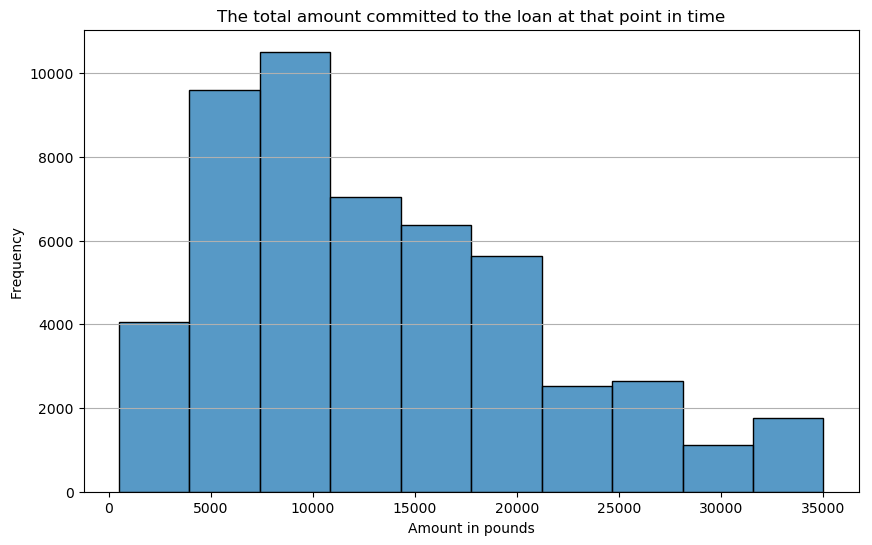

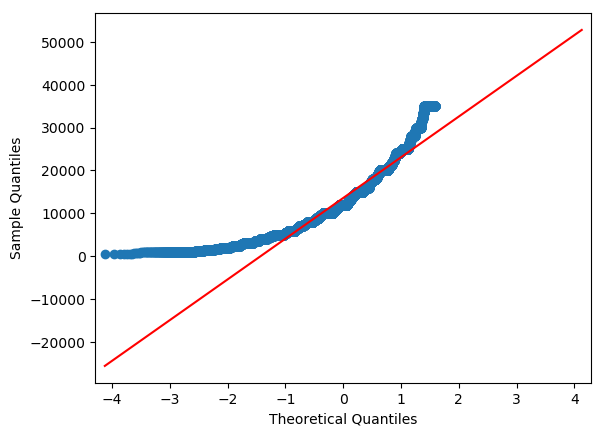

In [ ]:
# Normality test
df_inf.norm_test("funded_amount")
# Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column="funded_amount",
                title= "The total amount committed to the loan at that point in time",
                xlabel="Amount in pounds",
                ylabel="Frequency")
# QQplot
plots.plot_qq(dataframe = df_inf.dataframe,
              column = "funded_amount")


Although the normality test had a significant P-value (p<0.05), both the histogram and QQ-plot showed that the data has a slight positive skew. Therefore the median will be used to impute missing values.

In [ ]:
# Imputing Values

# Get the mendian
df_inf.descriptive_stats(selected_column=["funded_amount"])

# Replace missing values with the median
df_prep.replace_null("funded_amount", 12000.0)



 
funded_amount: 
 mean:13229.50911682024  
 median:12000.0 
 standard_deviation: 8019.01759934149


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

##### Term in months

Statistics=16516.551, p=0.000


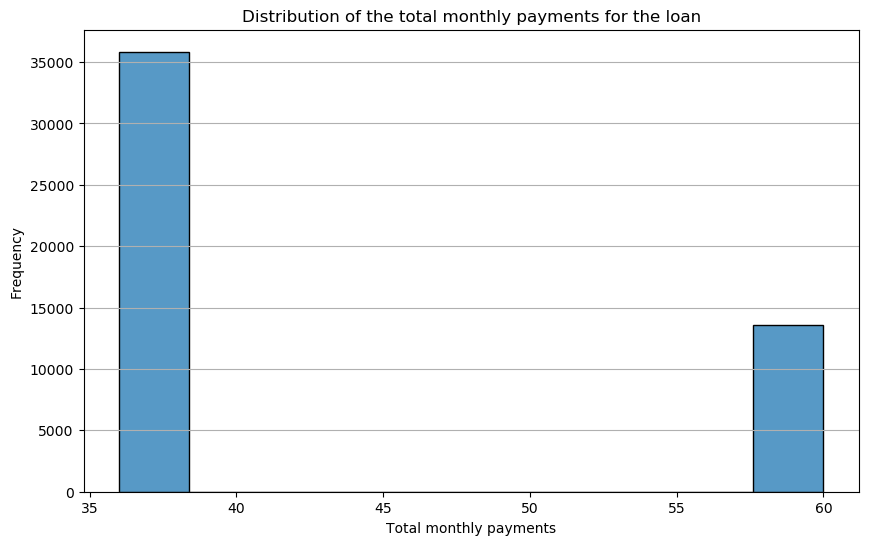

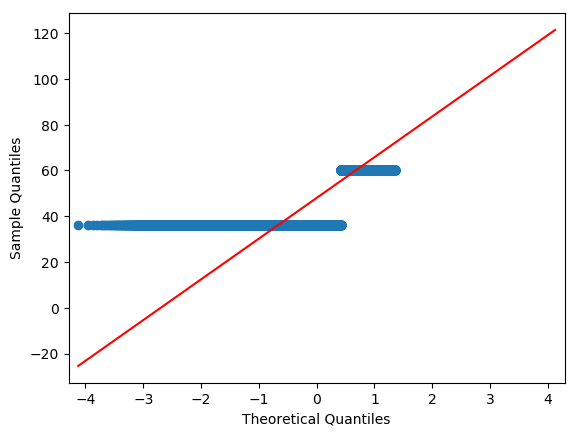

In [ ]:
# Normality test
df_inf.norm_test("term_in_months")

# Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column="term_in_months",
                title= "Distribution of the total monthly payments for the loan",
                xlabel="Total monthly payments",
                ylabel="Frequency")

# QQplot
plots.plot_qq(dataframe= plots.dataframe,
              column="term_in_months")

Both the histogram and QQ plot showed no normal distribution although the normality test's p value was significant. Also the histrogram could be interpreted as the data having positive skew. Therefore I will impute using the median.

In [ ]:
# Impute values of the "term_in_months" column

# Get the mendian
df_inf.descriptive_stats(selected_column=["term_in_months"])
# replace null values
df_prep.replace_null("term_in_months", 36.0)


 
term_in_months: 
 mean:42.60619907398047  
 median:36.0 
 standard_deviation: 10.71957251449841


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

##### Interest rate

Statistics=1421.934, p=0.000


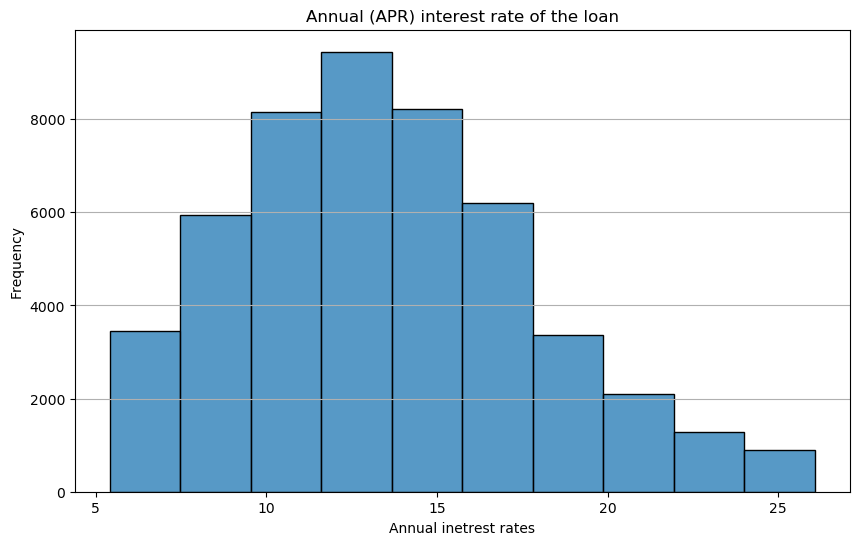

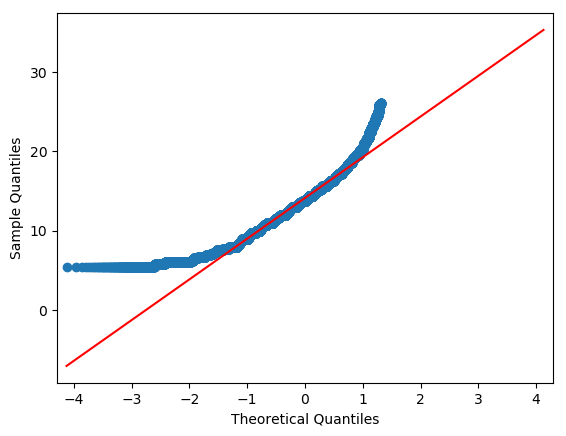

In [ ]:
# Normality test
df_inf.norm_test("int_rate")

# Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column= "int_rate",
                title= "Annual (APR) interest rate of the loan",
                xlabel="Annual inetrest rates",
                ylabel="Frequency")


# QQplot
plots.plot_qq(dataframe= plots.dataframe,
              column="int_rate")

Although the normality test showed a significant p value, both the histogram and QQ-plot displayed sligthly positive skewness of the data. Therefore i will use the median to impute missing values.

In [ ]:
# Impute values 

# Get the mendian
df_inf.descriptive_stats(selected_column=["int_rate"])

# replace null values
df_prep.replace_null("int_rate", 13.16)


 
int_rate: 
 mean:13.507328482327546  
 median:13.16 
 standard_deviation: 4.392892583652351


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

##### Lats payment date

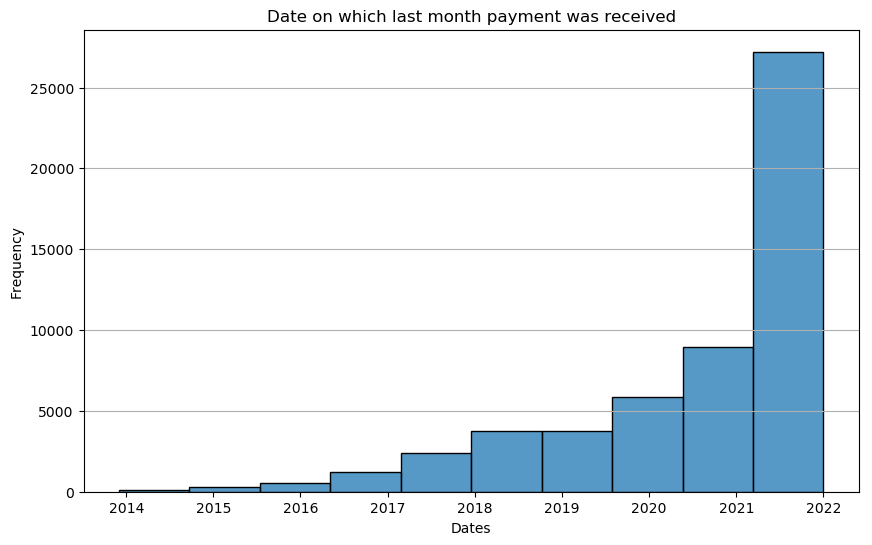

In [ ]:
# Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column= "last_payment_date",
                title= "Date on which last month payment was received",
                xlabel="Dates",
                ylabel="Frequency")

The histogram showed prominent negative skew of the data but the QQplot and normality test could not be used to to conflict with the date type data. Thereofre, missing values will be imputed using the median.

In [ ]:
# Impute values 

# Get the mendian
df_inf.descriptive_stats( selected_column=["last_payment_date"])

# replace null values
df_prep.replace_null("last_payment_date",  pd.to_datetime('2021-04-01 00:00:00'))


 
last_payment_date: 
 mean:2020-08-23 00:21:38.600391680  
 median:2021-04-01 00:00:00 
 standard_deviation: 586 days 05:22:10.970691976


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

##### Last credit pull date

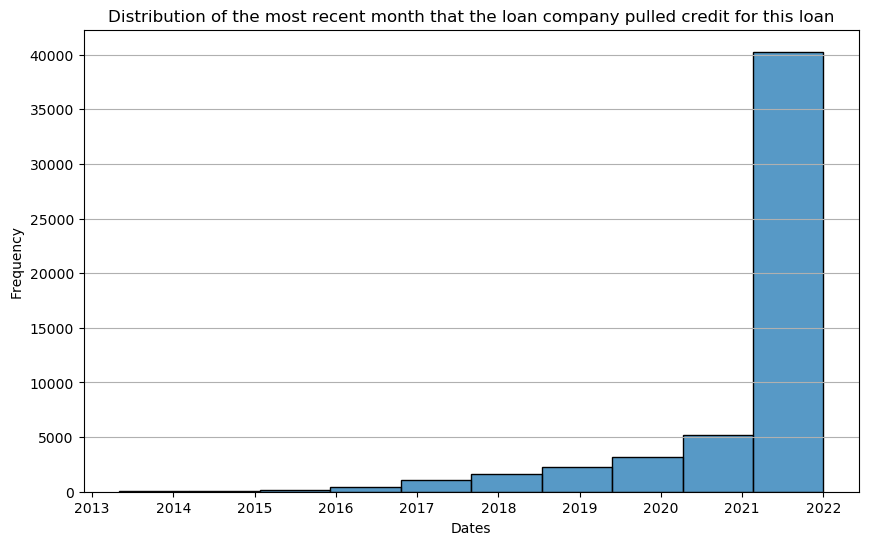

In [ ]:
#Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column= "last_credit_pull_date",
                title= "Distribution of the most recent month that the loan company pulled credit for this loan",
                xlabel="Dates",
                ylabel="Frequency")

The histogram showed prominent negative skewness of the data. Therefore the median will be used to impute missing values.

In [ ]:
# Impute values

# Get the mendian
df_inf.descriptive_stats( selected_column=["last_credit_pull_date"])

# replace null values
df_prep.replace_null("last_credit_pull_date",  pd.to_datetime('2022-01-01 00:00:00'))


 
last_credit_pull_date: 
 mean:2021-04-15 16:16:28.964296192  
 median:2022-01-01 00:00:00 
 standard_deviation: 473 days 08:18:38.512651744


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        NaN            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        NaN            1   
54229      

#####  Collections 12 months

Statistics=118894.649, p=0.000


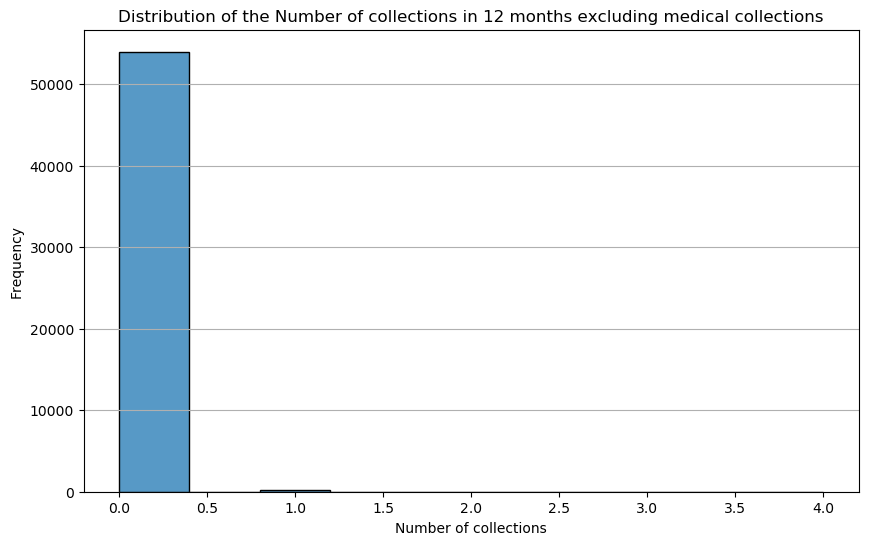

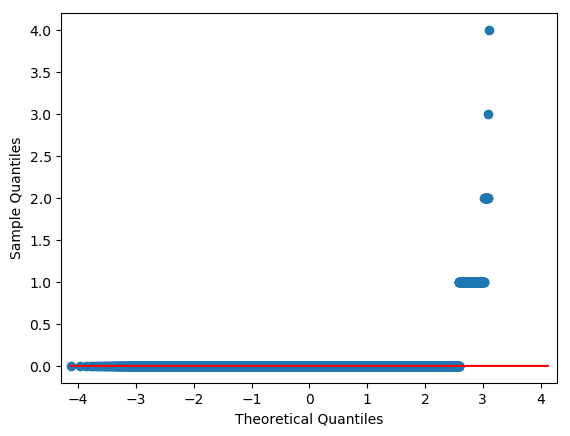

In [ ]:
# Normality test
df_inf.norm_test("collections_12_mths_ex_med")

# Historgram
plots.hist_plot(dataframe= plots.dataframe,
                column="collections_12_mths_ex_med",
                title= "Distribution of the Number of collections in 12 months excluding medical collections",
                xlabel="Number of collections",
                ylabel="Frequency")

# QQplot
plots.plot_qq(dataframe= plots.dataframe,
              column="collections_12_mths_ex_med")

Although the normality test p value is significant the  histogram and qq plot, showed a non normal distribution. However, this might be due to insufficient data but for this the data was treated as having a positive skewed and so the median was used to inpute the missing values.

In [ ]:
#Impute values

# Get the median
df_inf.descriptive_stats(selected_column=["collections_12_mths_ex_med"])
# replace null values
df_prep.replace_null("collections_12_mths_ex_med", 0.0)


 
collections_12_mths_ex_med: 
 mean:0.004208194905869324  
 median:0.0 
 standard_deviation: 0.0709901457713239


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16               NaT   
3            2021-06-01            13899.67               NaT   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61               NaT   
54227        2016-10-01              490.01               NaT   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00               NaT   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        0.0            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        0.0            1   
54229      

##### Next payment date

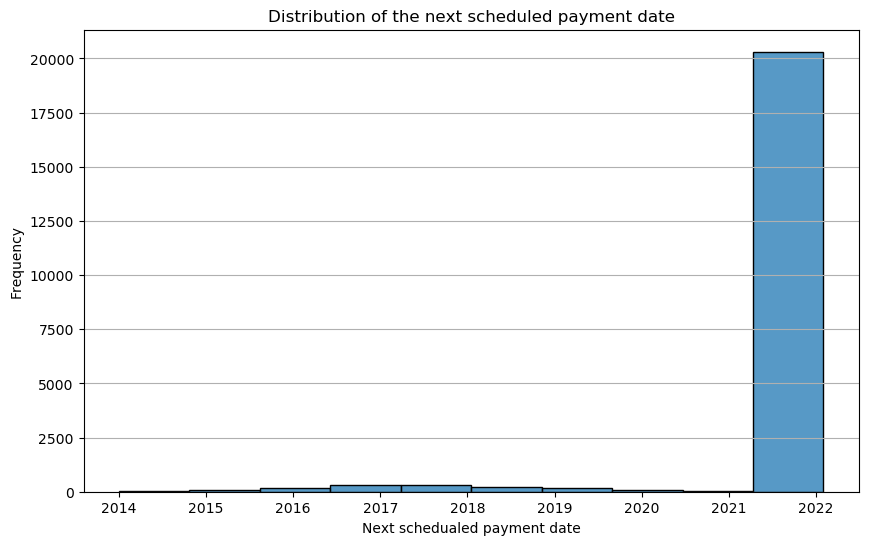

In [ ]:

# Histogram
plots.hist_plot(dataframe= plots.dataframe,
                column="next_payment_date",
                title= "Distribution of the next scheduled payment date",
                xlabel='Next schedualed payment date',
                ylabel="Frequency")

The histogram showed negative skew of the data. Therefore missing values were imputed based on the median. The QQplot and normality test coudl not be done due to conflicts with the date data type. I acknowlwedge that since there is a large protion of data missing in this column imputing missing values based on median, mean or mode is not the best choice. However, the alternative would be using machine learning but the distance between null values an actual values in the column had to be taken into account since imputing them based their nearest neighbour would not be relaible in my opinion if there is a large gap between actual values and missing values.

In [ ]:
# Get the mendian
df_inf.descriptive_stats( selected_column=["next_payment_date"])

# replace null values
df_prep.replace_null("next_payment_date",  pd.to_datetime('2022-02-01 00:00:00'))


 
next_payment_date: 
 mean:2021-10-18 16:47:47.613189632  
 median:2022-02-01 00:00:00 
 standard_deviation: 418 days 12:25:32.507294440


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16        2022-02-01   
3            2021-06-01            13899.67        2022-02-01   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61        2022-02-01   
54227        2016-10-01              490.01        2022-02-01   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00        2022-02-01   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        0.0            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        0.0            1   
54229      

##### Employment length

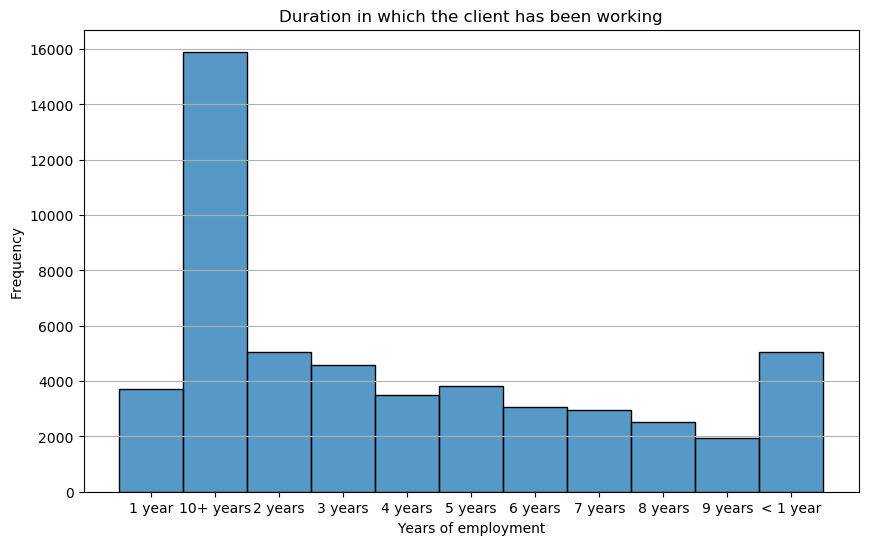

In [ ]:
# Histogram
plots.hist_plot(dataframe= plots.dataframe,
                column="employment_length",
                title= "Duration in which the client has been working",
                xlabel="Years of employment",
                ylabel="Frequency")

The histogram showed positive skew of the data. However, since the data is categorical the mode was used.

In [ ]:
# Impute values
# Get the mode
df_prep.dataframe["employment_length"].mode()
# replace null values
df_prep.replace_null("employment_length", "10+ years")


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49      248.82     A        A4  ...   
1                36.0      6.99      407.52     A        A3  ...   
2                36.0      7.49      497.63     A        A4  ...   
3                36.0     14.31      514.93     C        C4  ...   
4                36.0      6.03      456.54     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01      159.03     B        B2  ...   
54227            36.0     10.59      162.73     C        C2  ...   
54228            36.0      7.43      108.77     A        A2  ...   
54229            36.0      7.43      155.38     A        A2  ...   
54230            36.0     11.54      164.98     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0               0.000000       0.00                     0.00   
1               0.000000       0.00                     0.00   
2               0.000000       0.00                     0.00   
3               0.000000       0.00                     0.00   
4               0.000000       0.00                     0.00   
...                  ...        ...                      ...   
54226           0.000000       0.00                     0.00   
54227         104.942381       0.00                     0.00   
54228           0.000000       0.00                     0.00   
54229           0.000000       0.00                     0.00   
54230           0.000000     182.27                     1.84   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01              248.82        2022-02-01   
1            2022-01-01              407.52        2022-02-01   
2            2021-10-01            12850.16        2022-02-01   
3            2021-06-01            13899.67        2022-02-01   
4            2022-01-01              456.54        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01              160.61        2022-02-01   
54227        2016-10-01              490.01        2022-02-01   
54228        2016-09-01              110.58        2016-09-01   
54229        2014-03-01                0.00        2022-02-01   
54230        2014-03-01              164.97        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                        0.0            1   
1                2022-01-01                        0.0            1   
2                2021-10-01                        0.0            1   
3                2021-06-01                        0.0            1   
4                2022-01-01                        0.0            1   
...                     ...                        ...          ...   
54226            2016-07-01                        0.0            1   
54227            2016-09-01                        0.0            1   
54228            2013-05-01                        0.0            1   
54229      

<Figure size 1200x800 with 0 Axes>

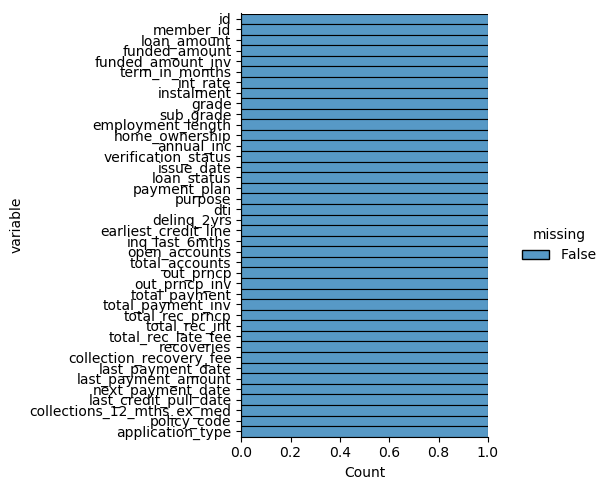

In [ ]:
plots.missing_values_plot()

The dataframe wiht the imputation will be save locally and be used for further sections with require transformation. This action was taken to prevent the transformations affecting the actual values of the data that will be used for the analysis sections. 

In [ ]:
df_prep.dataframe.to_csv("impute_loan_payments", index=False)

# Dealing with skewness

In this section the skewness of the numeric columns was measure, if their skewness was bigger than or equla to 0.5 they were considered skewed. Their skewness were corrected using a combination of histogram to visualise the skewness, transformations (log, Box-Cox, Yeo-Johnson) to alter the distribution shape and histogram to select the most effective transformation. In some cases the Box-Cox transformation was omitted due to the presence of zero and negative numbers.



In [ ]:
# Create a new intance with the impute dataframe to test for skewness
df_inf_imp = extract.DataFrameInfo(df_prep.dataframe)

In [ ]:
# Check skewness
df_inf_imp.skew_check()


 id: 
 skewness:2.37 


 member_id: 
 skewness:2.21 


 loan_amount: 
 skewness:0.81 


 funded_amount: 
 skewness:0.87 


 funded_amount_inv: 
 skewness:0.81 


 term_in_months: 
 skewness:1.15 


 instalment: 
 skewness:1.0 


 annual_inc: 
 skewness:8.71 


 delinq_2yrs: 
 skewness:5.37 


 inq_last_6mths: 
 skewness:3.25 


 open_accounts: 
 skewness:1.06 


 total_accounts: 
 skewness:0.78 


 out_prncp: 
 skewness:2.36 


 out_prncp_inv: 
 skewness:2.36 


 total_payment: 
 skewness:1.27 


 total_payment_inv: 
 skewness:1.26 


 total_rec_prncp: 
 skewness:1.26 


 total_rec_int: 
 skewness:2.2 


 total_rec_late_fee: 
 skewness:13.18 


 recoveries: 
 skewness:14.59 


 collection_recovery_fee: 
 skewness:27.64 


 last_payment_amount: 
 skewness:2.5 


 collections_12_mths_ex_med: 
 skewness:20.26 



The following columns were classified as skewed and therefore will be transformed.

- loan_amount:        0.81 
- funded_amount:      0.87
- funded_amount_inv:  0.81 
- term_in_moths:      1.15
- instalmet:          1.0
- annual_inc:         8.71  
- delinq_2yrs:        5.37 
- inq_last_6mths:     3.25
- open_accounts:      1.06
- total_accounts:     0.78
- out_prncp:          2.36 
- out_prncp_inv:      2.36
- total_payment:      1.27 
- total_payment_inv:  1.26 
- total_rec_prncp:    1.26
- total_rec_int:      2.2 
- total_rec_late_fee: 13.18 
- recoveries:         14.59 
- collection_recovery_fee: 27.64
- last_payment_amount: 2.5
- collections_12_mths_ex_med: 20.26

##### Loan amount

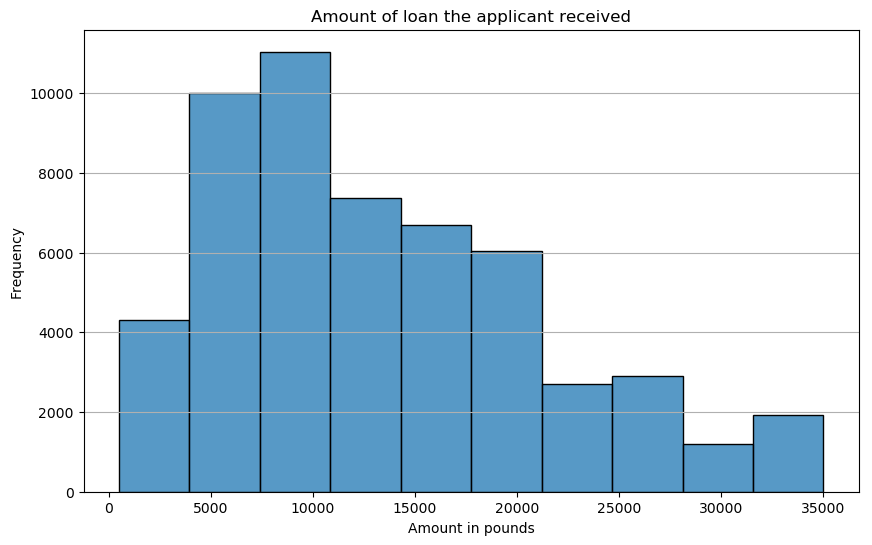

In [ ]:
# Visualise the skew
plots.hist_plot(dataframe= df_prep.dataframe,
                column="loan_amount",
                title= "Amount of loan the applicant received",
                xlabel="Amount in pounds",
                ylabel="Frequency")

- Positive skew

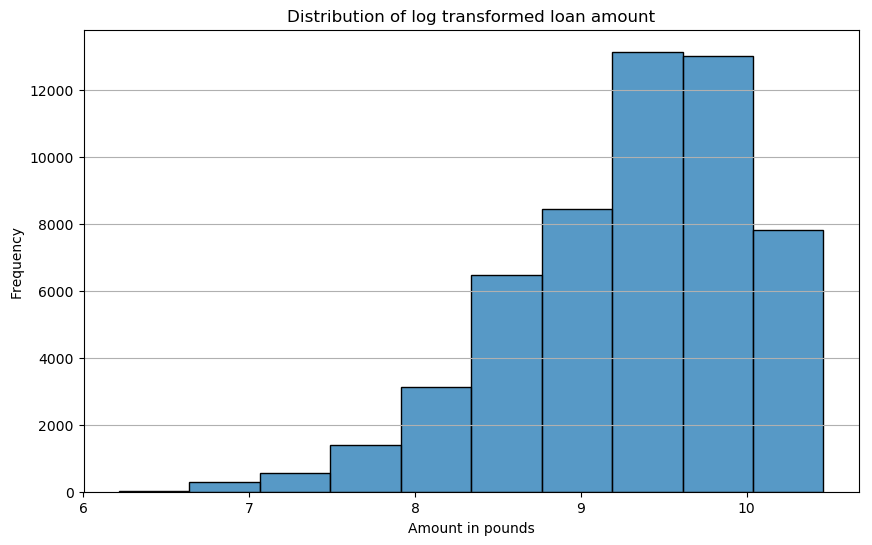

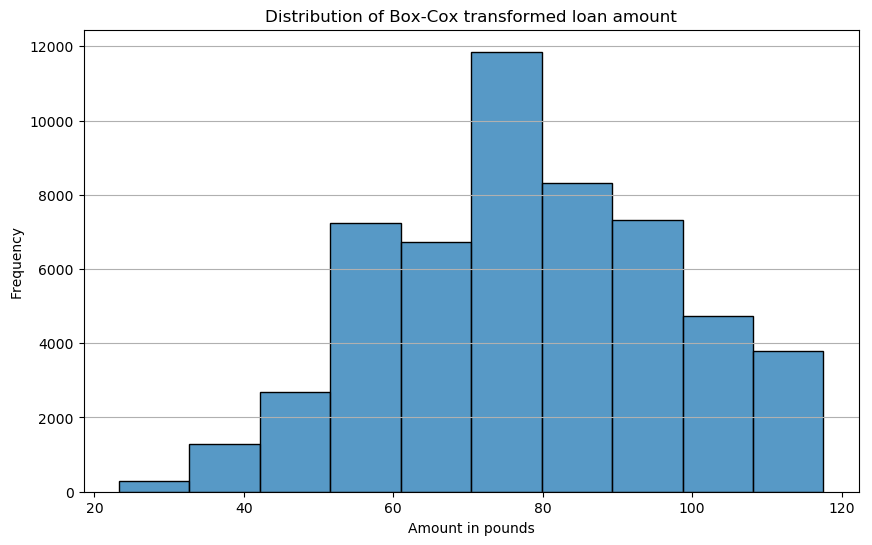

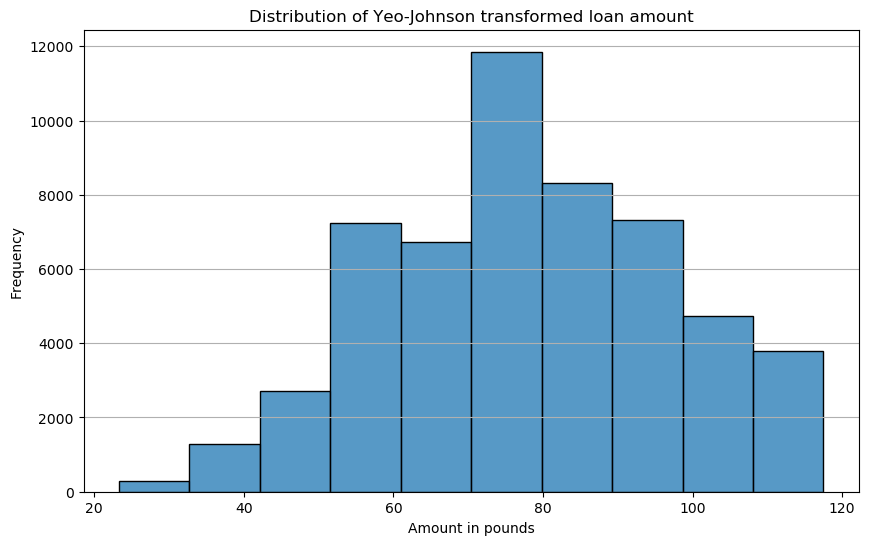

In [ ]:
# Apply log transformation.
loan_log_transform = df_prep.skew_transform(df_prep.dataframe["loan_amount"], transformation="log")
loan_BC_transform = df_prep.skew_transform(df_prep.dataframe["loan_amount"], transformation="BC")
loan_YJ_transform = df_prep.skew_transform(df_prep.dataframe["loan_amount"], transformation="YJ")

# Histogram for log transform data
plots.hist_plot(dataframe= loan_log_transform,
                column="log",
                title="Distribution of log transformed loan amount",
                xlabel="Amount in pounds",
                ylabel="Frequency")


# Histogram for Box-Cox transform data
plots.hist_plot(dataframe= loan_BC_transform,
                column="Box-Cox",
                title="Distribution of Box-Cox transformed loan amount",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Histogram for Yeo-Johnson transform data
plots.hist_plot(dataframe= loan_YJ_transform,
                column="Yeo-Johnson",
                title="Distribution of Yeo-Johnson transformed loan amount",
                xlabel="Amount in pounds",
                ylabel="Frequency")

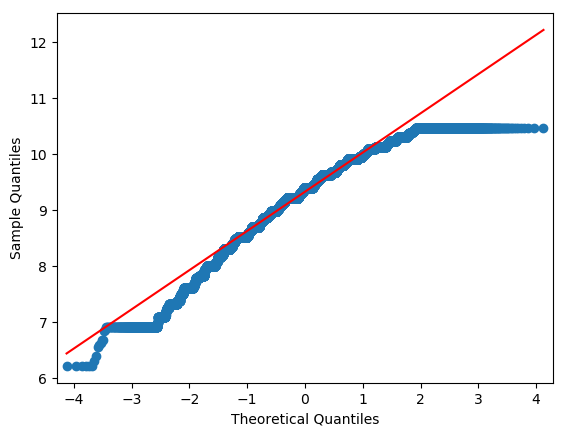

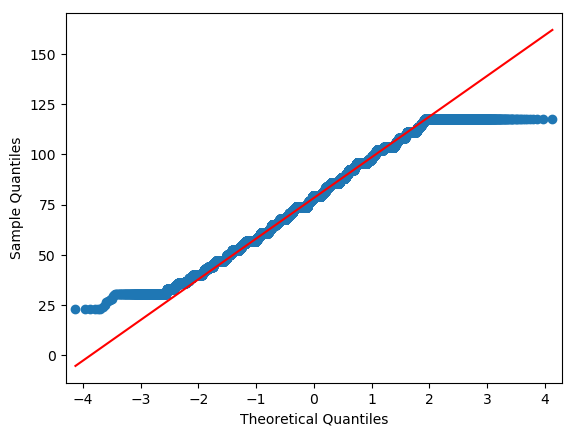

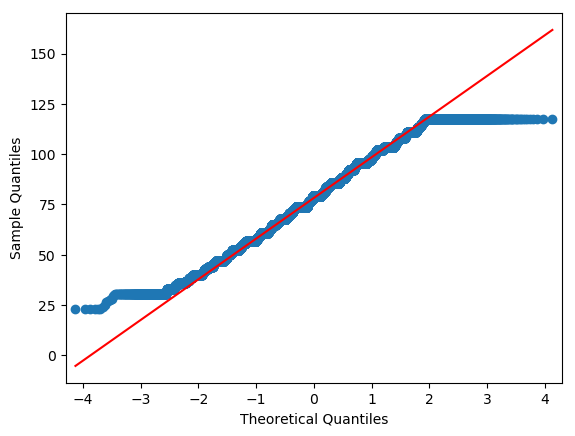

In [ ]:

# QQplot
plots.plot_qq(dataframe= loan_log_transform,
              column="log")

plots.plot_qq(dataframe= loan_BC_transform,
              column="Box-Cox")

plots.plot_qq(dataframe= loan_YJ_transform,
              column="Yeo-Johnson")

- Box-Cox and Yeo-Johnson trasnformation produced the greater effect in the distribution.

- Applied Box-Cox since there was not presence of negative or zero values.

In [ ]:
# Applied transformation
df_prep.dataframe["loan_amount"] = loan_log_transform["log"]

##### Funded amount

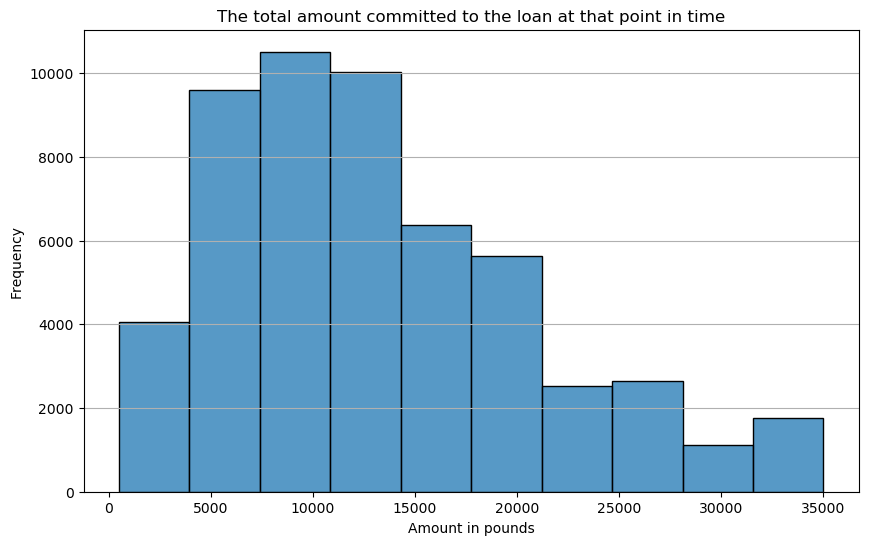

In [ ]:
# Histogram
plots.hist_plot(dataframe= df_prep.dataframe,
                column="funded_amount",
                title= "The total amount committed to the loan at that point in time",
                xlabel="Amount in pounds",
                ylabel="Frequency")

 - Positive skew data.

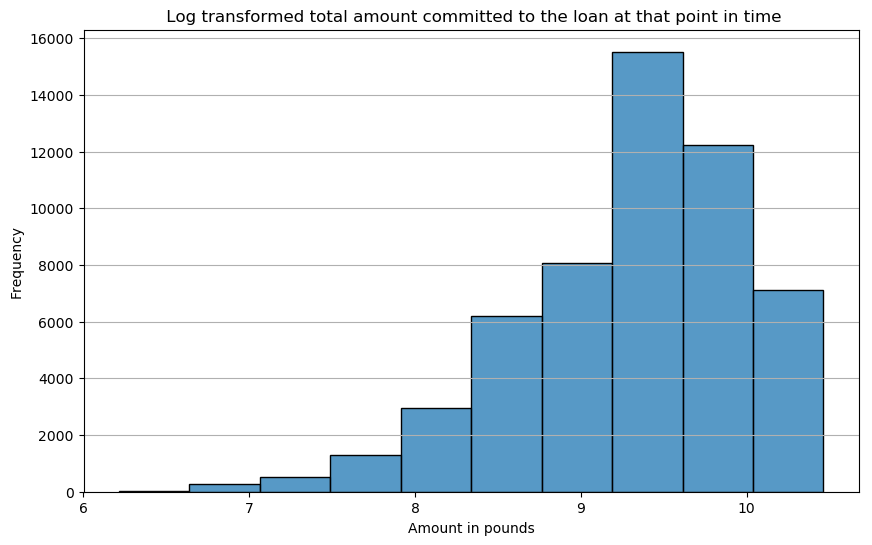

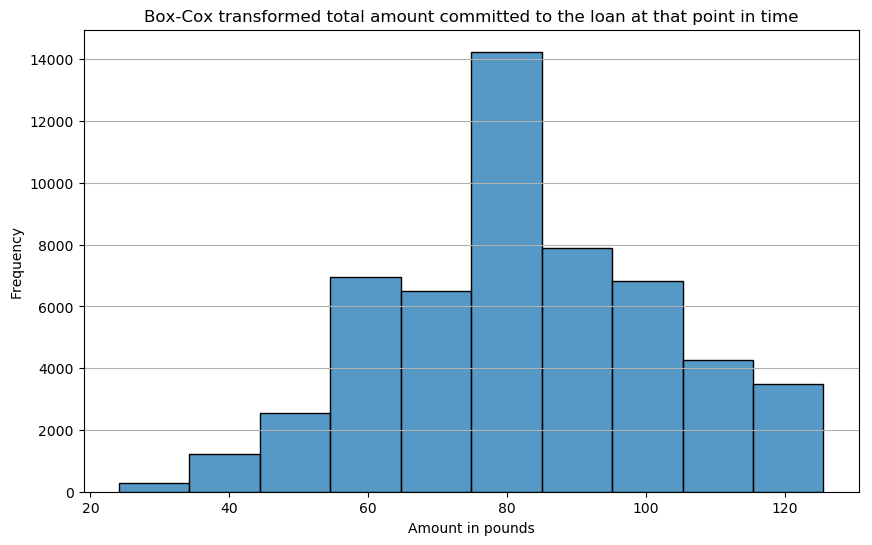

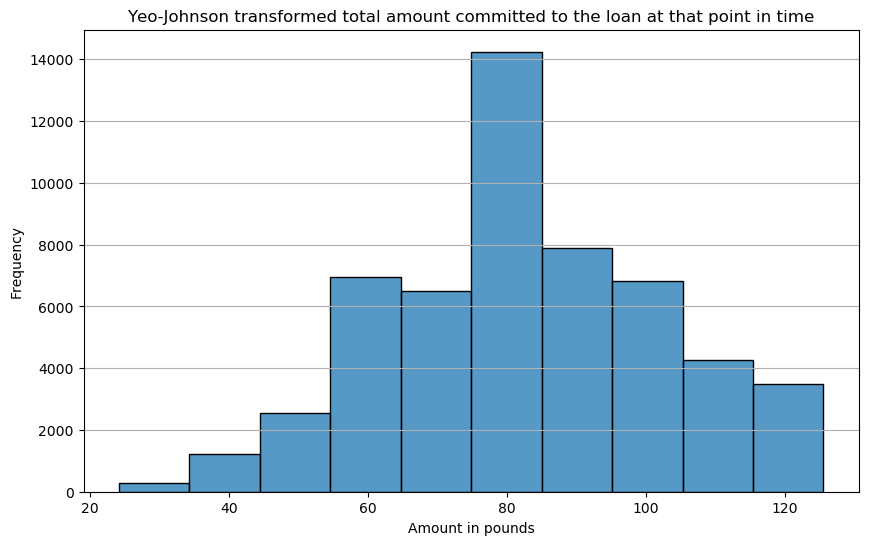

In [ ]:
# Apply log transformation.
funded_am_log_transform = df_prep.skew_transform(df_prep.dataframe["funded_amount"], transformation="log")
funded_am_BC_transform = df_prep.skew_transform(df_prep.dataframe["funded_amount"], transformation="BC")
funded_am_YJ_transform = df_prep.skew_transform(df_prep.dataframe["funded_amount"], transformation="YJ")

# Histogram log
plots.hist_plot(dataframe= funded_am_log_transform,
                column="log",
                title= " Log transformed total amount committed to the loan at that point in time",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Histogram Box-Cox
plots.hist_plot(dataframe= funded_am_BC_transform,
                column="Box-Cox",
                title= "Box-Cox transformed total amount committed to the loan at that point in time",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Histogram Yeo-Johnson
plots.hist_plot(dataframe= funded_am_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson transformed total amount committed to the loan at that point in time",
                xlabel="Amount in pounds",
                ylabel="Frequency")

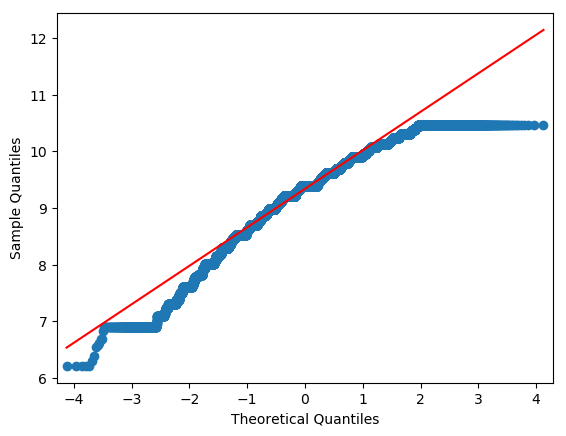

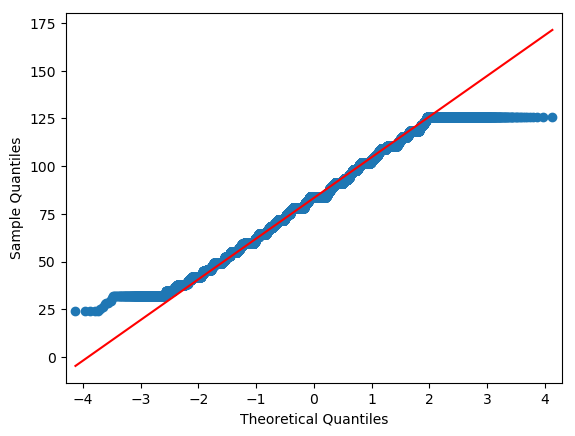

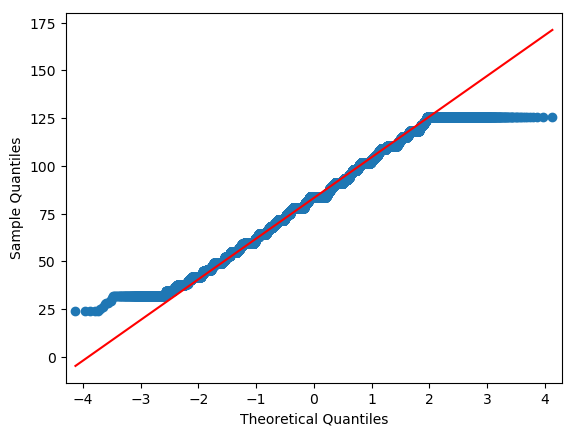

In [ ]:
plots.plot_qq(dataframe=funded_am_log_transform,
              column="log")
plots.plot_qq(dataframe=funded_am_BC_transform,
              column="Box-Cox")
plots.plot_qq(dataframe=funded_am_YJ_transform,
              column="Yeo-Johnson")

- Box-Cox and Yeo-Johnson produce the greates effect
- Box-Cox was chosen since the data dosen't have any zero or nagative values.

In [ ]:
# Skew transformation
df_prep.dataframe["funded_amount"] = funded_am_BC_transform

##### Funded amount inv

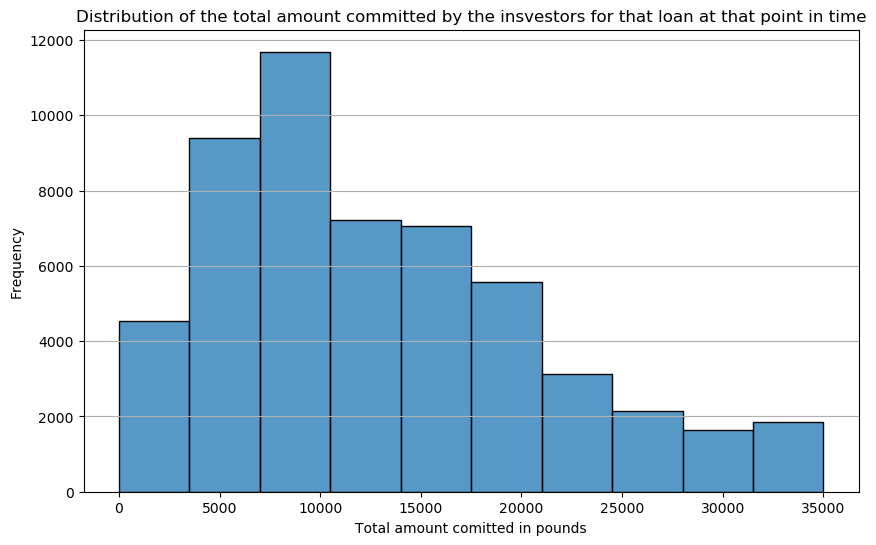

In [ ]:
# Visualise the skew of funded_amount_inv
plt.figure(figsize=(10, 6))
sns.histplot(data=df_prep.dataframe, x="funded_amount_inv", bins= 10)
plt.title('Distribution of the total amount committed by the insvestors for that loan at that point in time')
plt.xlabel('Total amount comitted in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y")
plt.show()

- Positive skew data

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


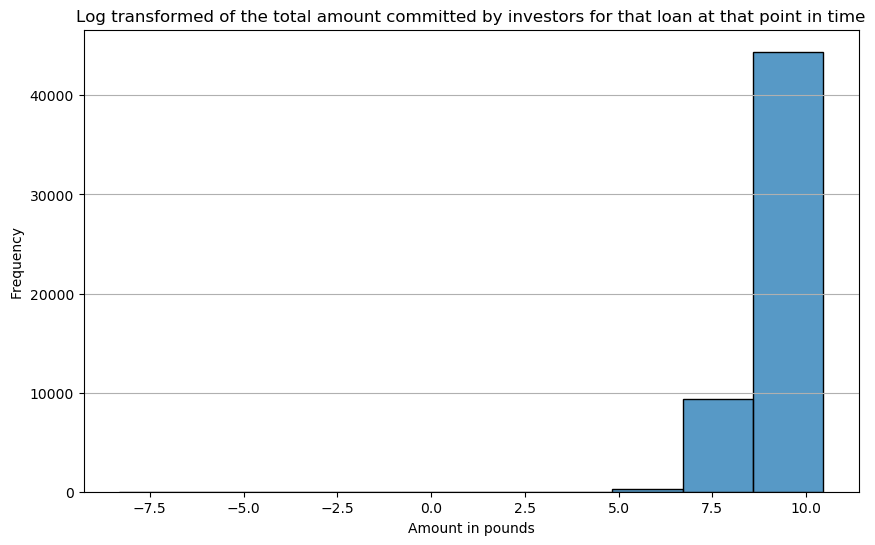

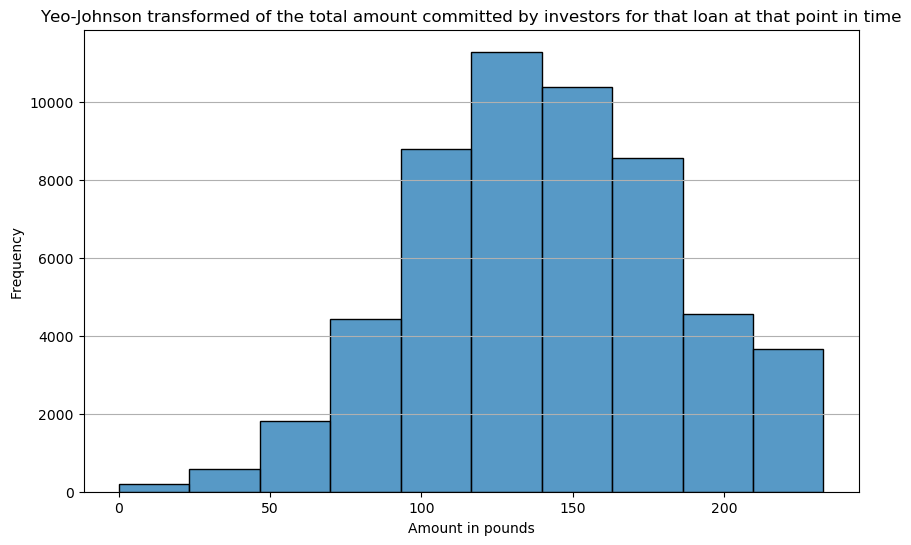

In [ ]:
# Apply log transformation.
funded_log_transform = df_prep.skew_transform(df_prep.dataframe["funded_amount_inv"], transformation="log")
funded_YJ_transform = df_prep.skew_transform(df_prep.dataframe["funded_amount_inv"], transformation="YJ")

# Histogram for log transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=funded_log_transform, x="log", bins= 10)
plt.title('Log transformed of the total amount committed by investors for that loan at that point in time')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

# Histogram for Yeo-Johnson transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=funded_YJ_transform, x="Yeo-Johnson", bins= 10)
plt.title('Yeo-Johnson transformed of the total amount committed by investors for that loan at that point in time')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y")
plt.show()

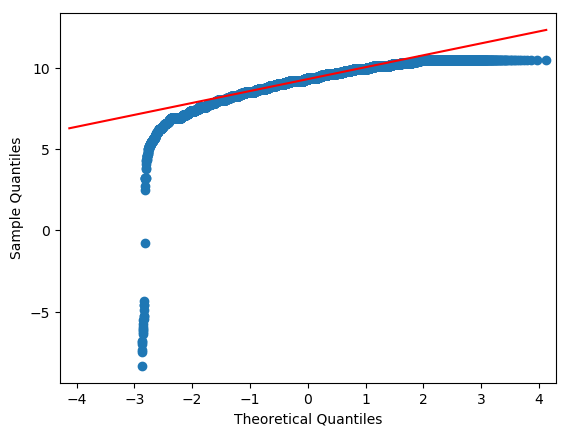

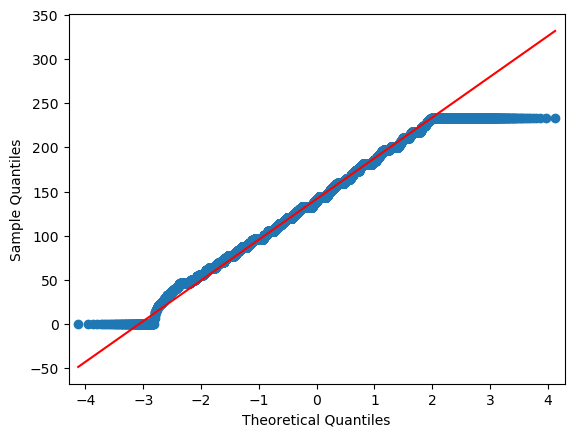

In [ ]:
# QQplot
qq_plot = qqplot(funded_log_transform["log"], scale=1 ,line='q')
qq_plot = qqplot(funded_YJ_transform["Yeo-Johnson"], scale=1 ,line='q')
pyplot.show()

- Yeo-Johnson trasnformation produce the greater effect and therefore was used.

In [ ]:
df_prep.dataframe["funded_amount_inv"] = funded_YJ_transform 

##### Instalment

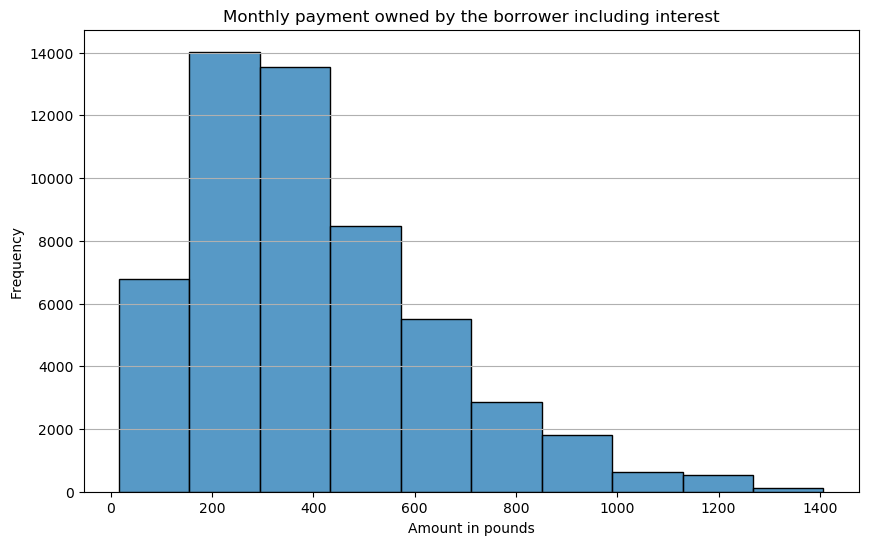

In [ ]:
# Histogram of original data
plt.figure(figsize=(10, 6))
sns.histplot(data=df_prep.dataframe, x="instalment", bins= 10)
plt.title('Monthly payment owned by the borrower including interest')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

- Positive skew data.

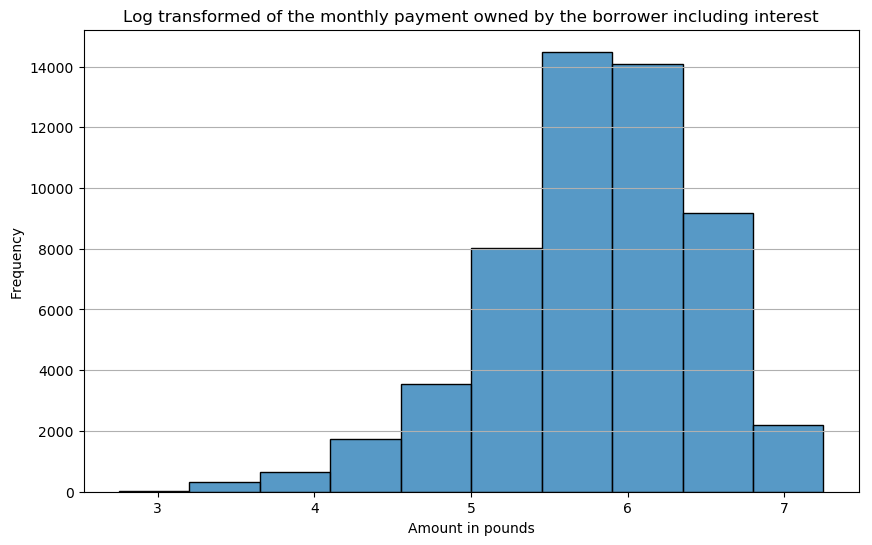

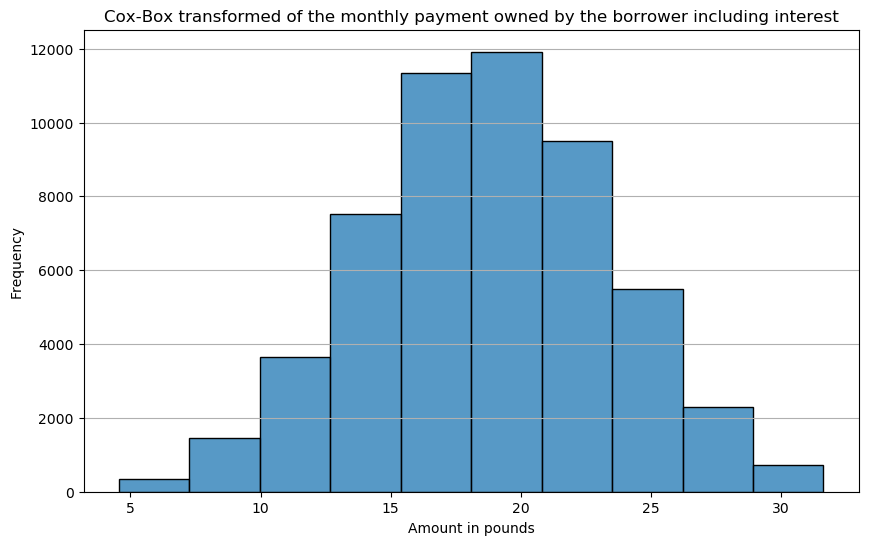

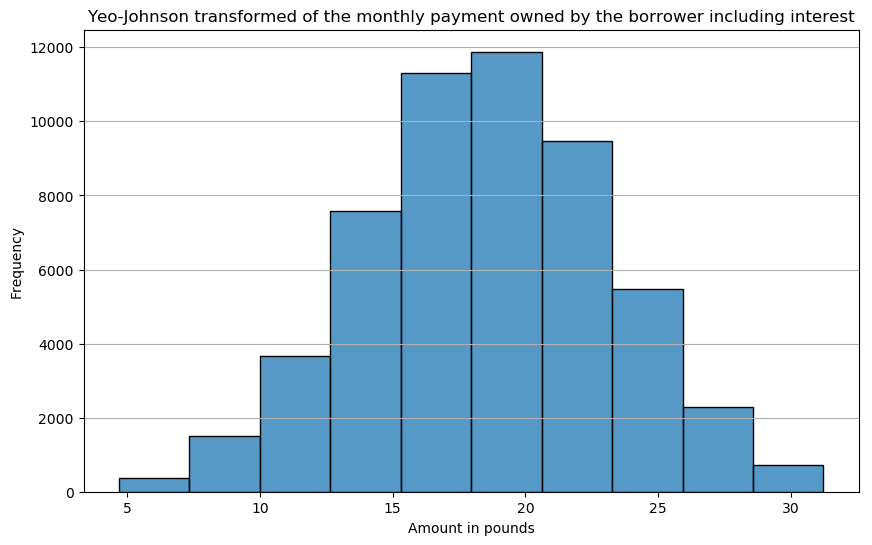

In [ ]:
# Apply log transformation.
instal_log_transform = df_prep.skew_transform(df_prep.dataframe["instalment"], transformation="log")
instal_BC_transform = df_prep.skew_transform(df_prep.dataframe["instalment"], transformation="BC")
instal_YJ_transform = df_prep.skew_transform(df_prep.dataframe["instalment"], transformation="YJ")

# Histogram for log transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=instal_log_transform, x="log", bins= 10)
plt.title('Log transformed of the monthly payment owned by the borrower including interest')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

# Histogram for log transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=instal_BC_transform, x="Box-Cox", bins= 10)
plt.title('Cox-Box transformed of the monthly payment owned by the borrower including interest')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

# Histogram for Yeo-Johnson transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=instal_YJ_transform, x="Yeo-Johnson", bins= 10)
plt.title('Yeo-Johnson transformed of the monthly payment owned by the borrower including interest')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y")
plt.show()

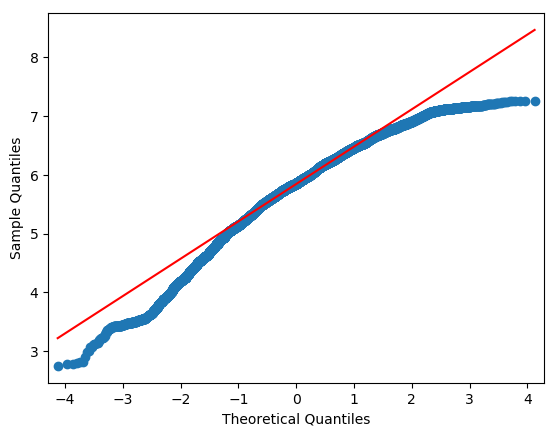

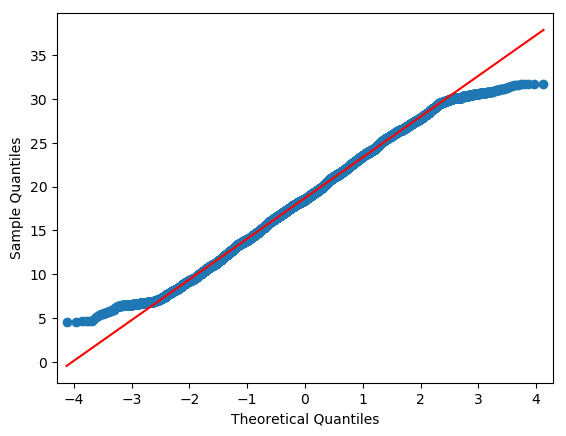

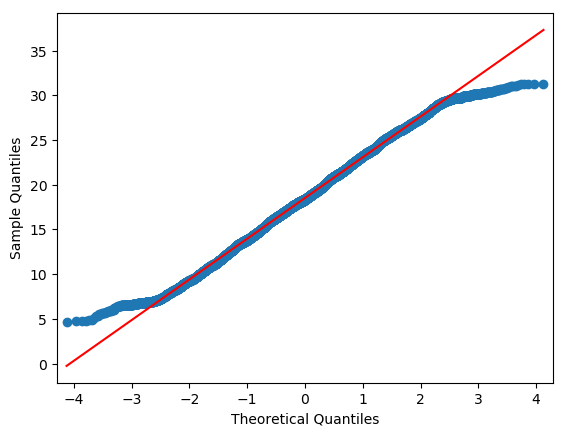

In [ ]:

# QQplot
qq_plot = qqplot(instal_log_transform["log"], scale=1 ,line='q')
qq_plot = qqplot(instal_BC_transform["Box-Cox"], scale=1 ,line='q')
qq_plot = qqplot(instal_YJ_transform["Yeo-Johnson"], scale=1 ,line='q')
pyplot.show()

- Box-Cox and Yeo-Johnson produced the same results but since there were no zero or negative  values, Box-Cox was used.

In [ ]:
df_prep.dataframe["instalment"]  = instal_BC_transform

##### Annual inc

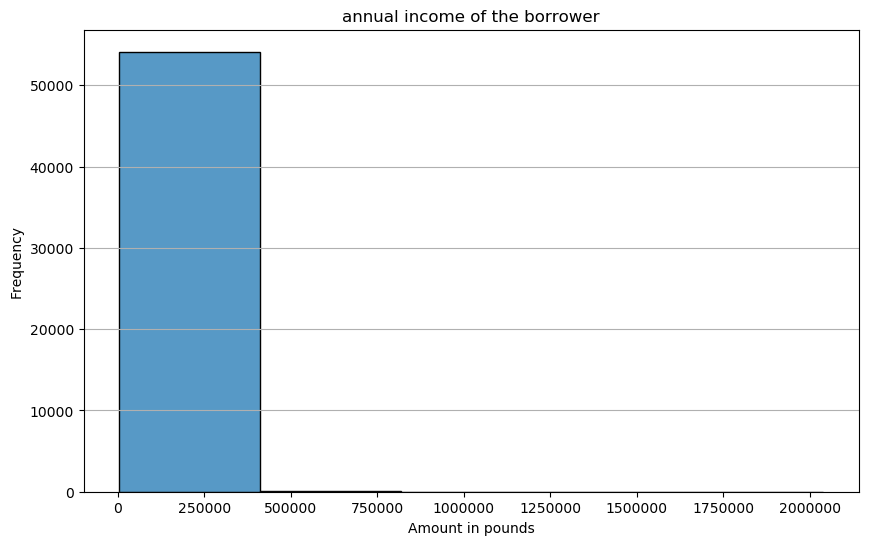

In [ ]:
# Original Data
plt.figure(figsize=(10, 6))
sns.histplot(data=df_prep.dataframe, x="annual_inc", bins= 5)
plt.title('annual income of the borrower')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

The histogram shows left skew of the data.

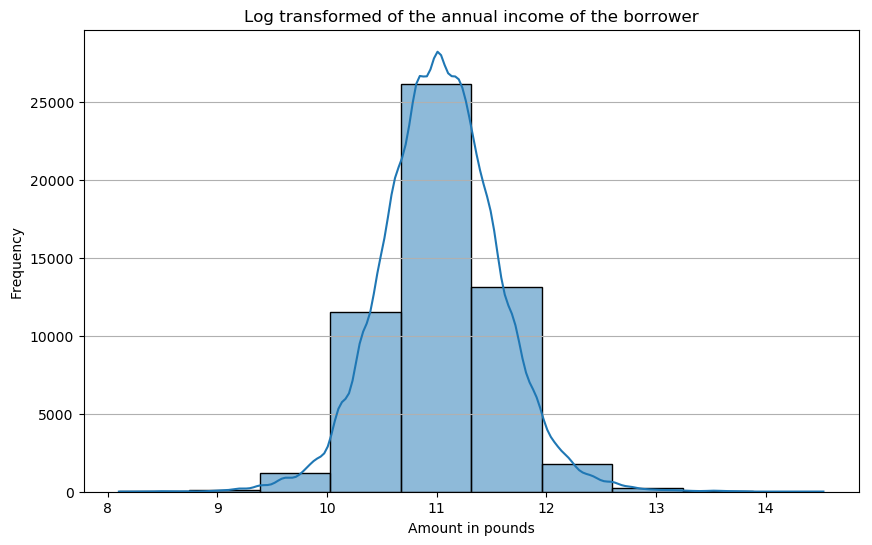

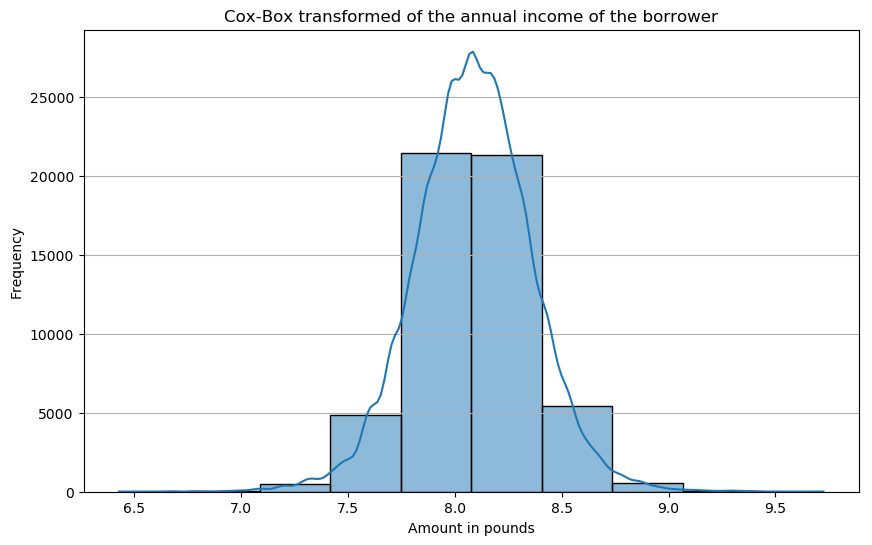

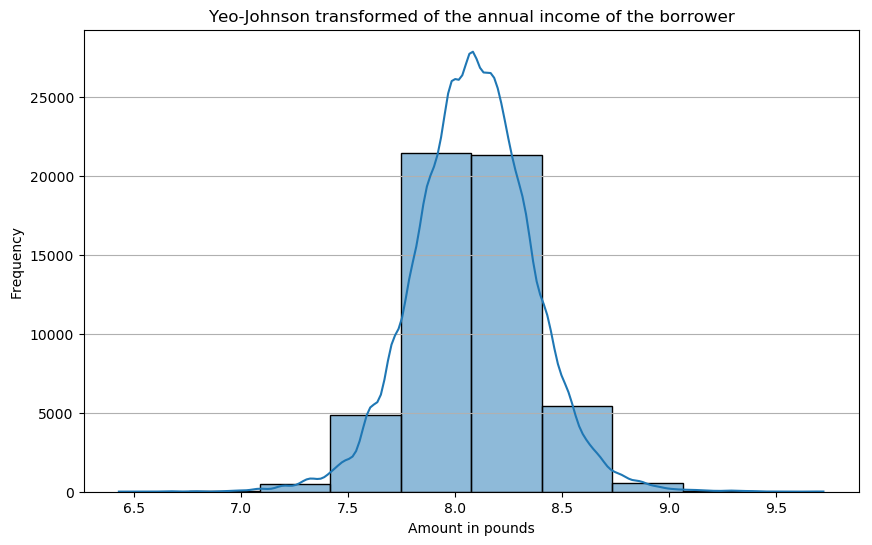

In [ ]:
# Apply log transformation.
an_in_log_transform = df_prep.skew_transform(df_prep.dataframe["annual_inc"], transformation="log")
an_in_BC_transform = df_prep.skew_transform(df_prep.dataframe["annual_inc"], transformation="BC")
an_in_YJ_transform = df_prep.skew_transform(df_prep.dataframe["annual_inc"], transformation="YJ")

# Histogram for log transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=an_in_log_transform, x="log", bins= 10, kde=True)
plt.title('Log transformed of the annual income of the borrower')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

# Histogram for log transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=an_in_BC_transform, x="Box-Cox", bins= 10, kde=True)
plt.title('Cox-Box transformed of the annual income of the borrower')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y") 
plt.show()

# Histogram for Yeo-Johnson transform data
plt.figure(figsize=(10, 6))
sns.histplot(data=an_in_YJ_transform, x="Yeo-Johnson", bins= 10, kde=True)
plt.title('Yeo-Johnson transformed of the annual income of the borrower')
plt.xlabel('Amount in pounds')
plt.ylabel('Frequency')
plt.grid(True, axis="y")
plt.show()

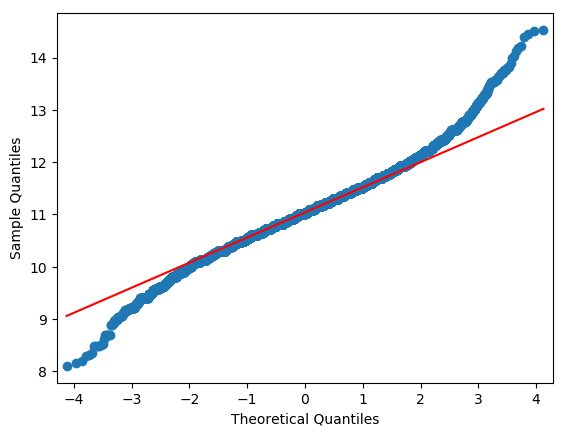

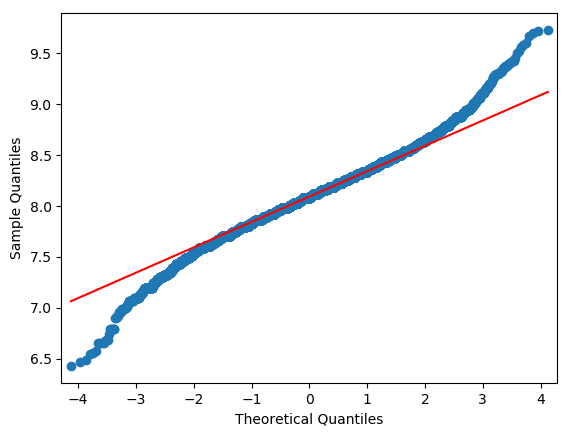

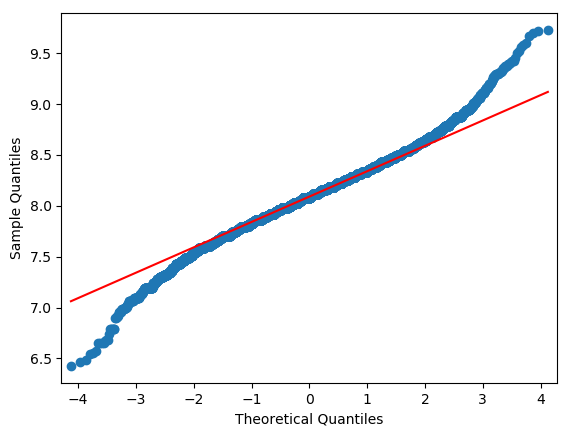

In [ ]:
# QQplot
qq_plot = qqplot(an_in_log_transform["log"], scale=1 ,line='q')
qq_plot = qqplot(an_in_BC_transform["Box-Cox"], scale=1 ,line='q')
qq_plot = qqplot(an_in_YJ_transform["Yeo-Johnson"], scale=1 ,line='q')
pyplot.show()

Histograms an qq plost showed that any of the three used transfomations can be use and produce very similar chnages in distribution but seems that the log transformation produces the most normal distribution. therefore this will be used.

In [ ]:
df_prep.dataframe["annual_inc"]  = an_in_log_transform 

##### Total payment

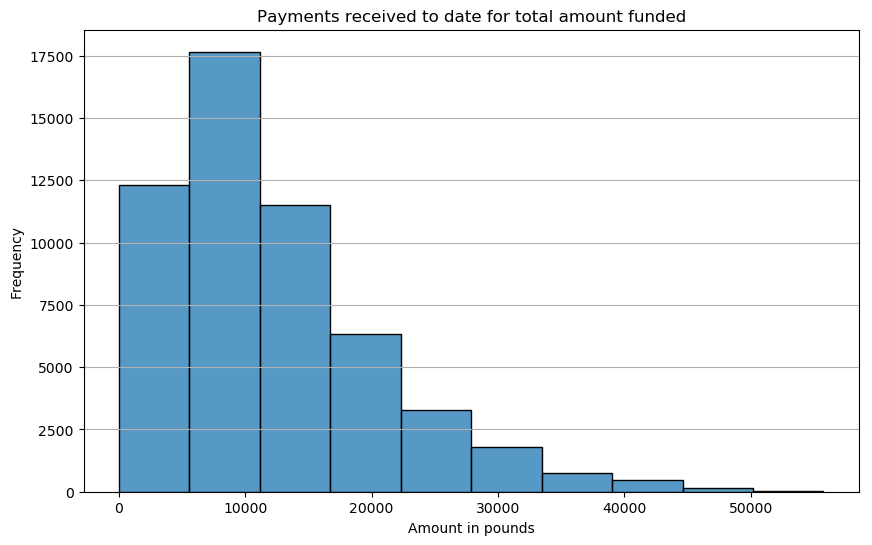

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="total_payment", 
                title= "Payments received to date for total amount funded", 
                xlabel="Amount in pounds",
                ylabel="Frequency")

This histogram shows positve/ right skew of the data.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


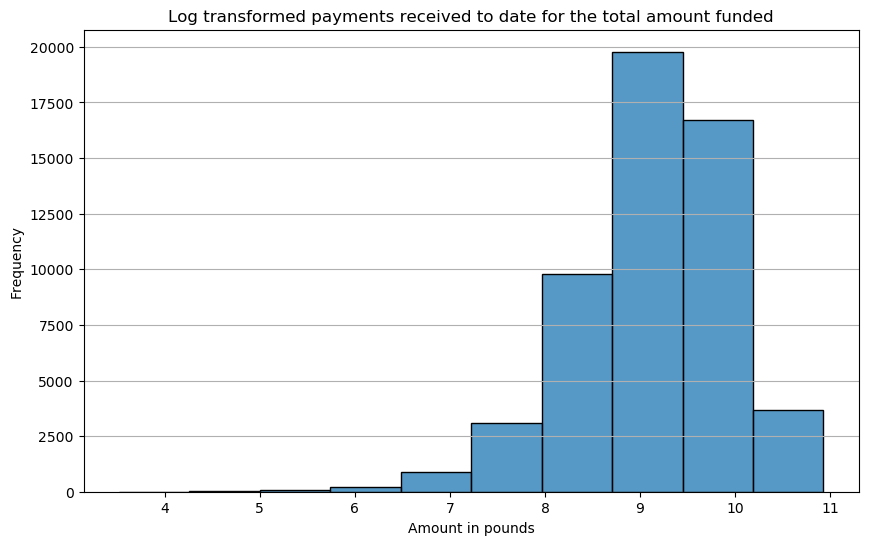

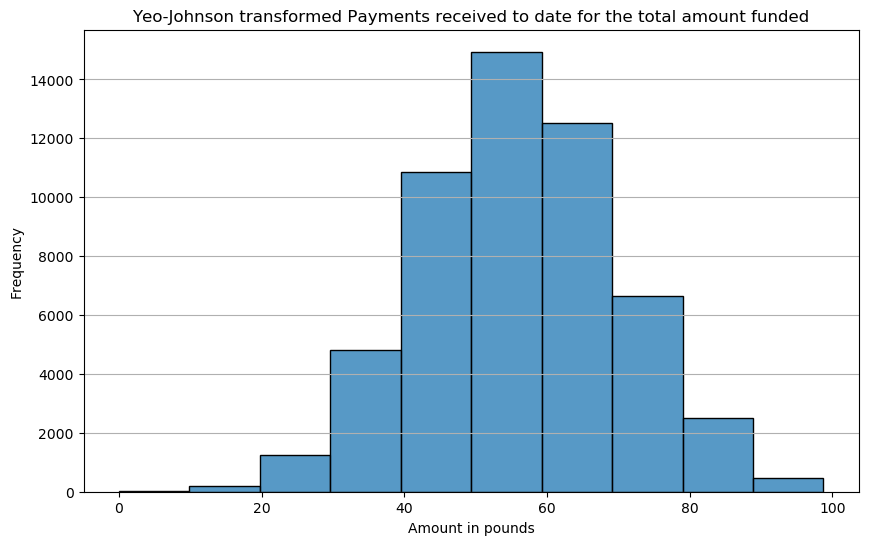

In [ ]:
# Apply log transformation.
total_p_in_log_transform = df_prep.skew_transform(df_prep.dataframe["total_payment"], transformation="log")
total_p_YJ_transform = df_prep.skew_transform(df_prep.dataframe["total_payment"], transformation="YJ")

# Plot log transformation
plots.hist_plot(dataframe = total_p_in_log_transform,
                column="log", 
                title= "Log transformed payments received to date for the total amount funded", 
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Plot Box-Cox transformation
plots.hist_plot(dataframe = total_p_YJ_transform,
                column="Yeo-Johnson", 
                title= "Yeo-Johnson transformed Payments received to date for the total amount funded", 
                xlabel="Amount in pounds",
                ylabel="Frequency")

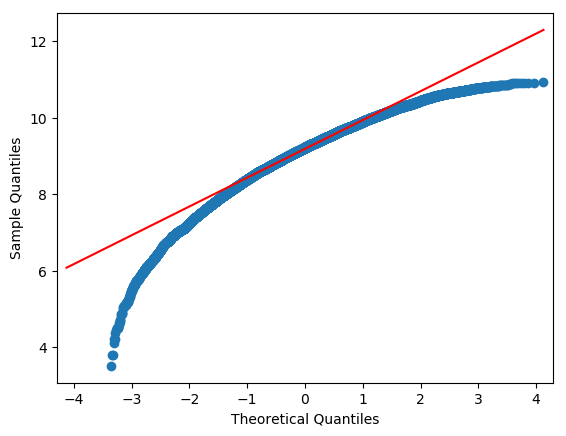

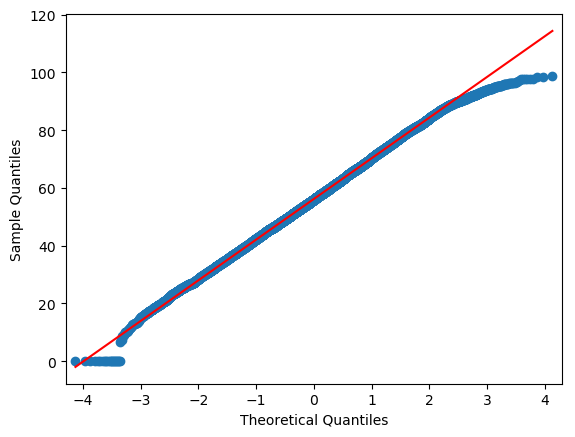

In [ ]:
plots.plot_qq(dataframe=total_p_in_log_transform,
              column="log")
plots.plot_qq(dataframe=total_p_YJ_transform,
              column="Yeo-Johnson")

Histograms and qq plots showed that the Yeo-Johnson trasnformation ahs the greates effect on the data. Therefore we will applied that transformation.

In [ ]:
df_prep.dataframe["total_payment"] = total_p_YJ_transform


##### Total rec int

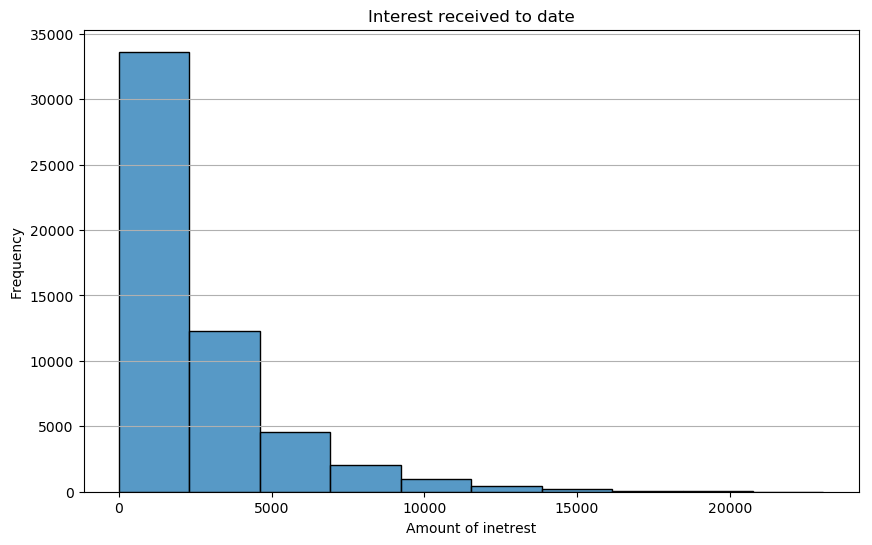

In [ ]:
# Original data
plots.hist_plot(dataframe= df_prep.dataframe,
                column="total_rec_int",
                title= "Interest received to date",
                xlabel="Amount of inetrest",
                ylabel="Frequency")

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


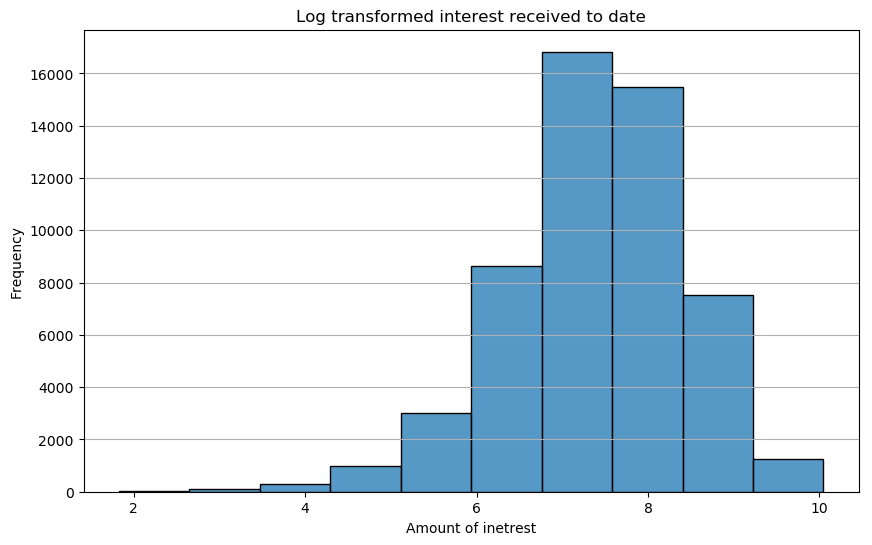

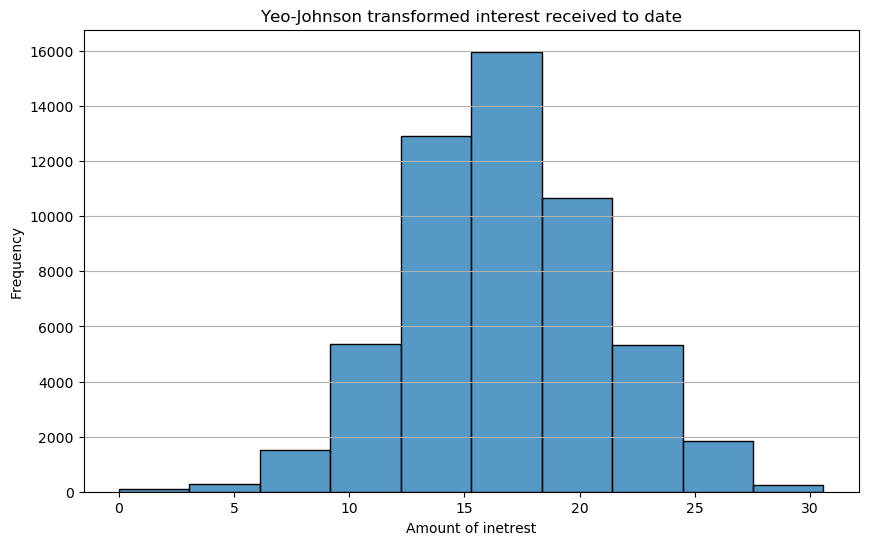

In [ ]:
# Transformations
total_rec_log_transform = df_prep.skew_transform(df_prep.dataframe["total_rec_int"], transformation="log")

total_rec_YJ_transform = df_prep.skew_transform(df_prep.dataframe["total_rec_int"], transformation="YJ")

# Histograms
plots.hist_plot(dataframe= total_rec_log_transform,
                column="log",
                title= "Log transformed interest received to date",
                xlabel="Amount of inetrest",
                ylabel="Frequency")

plots.hist_plot(dataframe= total_rec_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson transformed interest received to date",
                xlabel="Amount of inetrest",
                ylabel="Frequency")

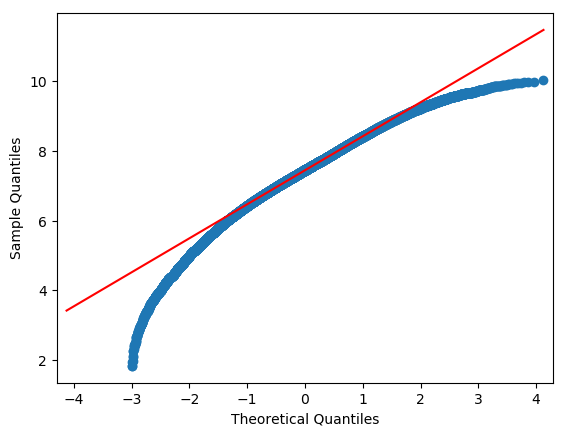

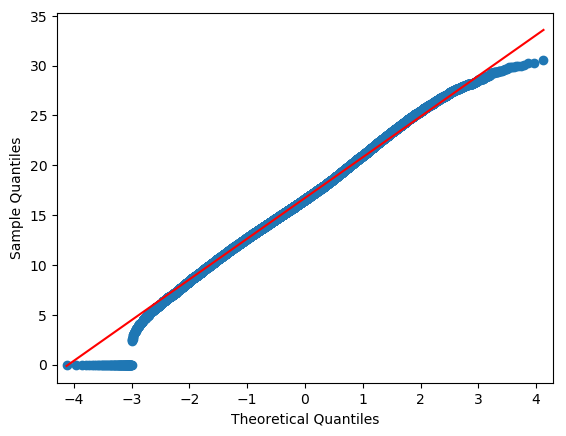

In [ ]:
# QQ_plots
plots.plot_qq(dataframe=total_rec_log_transform ,
              column="log")
plots.plot_qq(dataframe=total_rec_YJ_transform,
              column="Yeo-Johnson")

The Yeo-Johnson transformation has the most effect on the data and therefore it will be used.

In [ ]:
df_prep.dataframe["total_rec_int"] = total_rec_YJ_transform

##### Delinq 2yrs

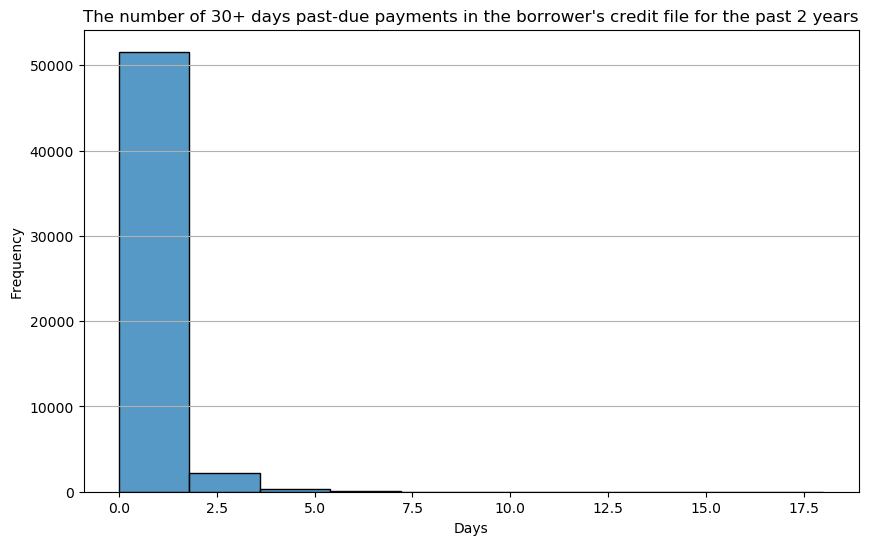

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="delinq_2yrs",
                title= "The number of 30+ days past-due payments in the borrower's credit file for the past 2 years",
                xlabel="Days",
                ylabel="Frequency")

The histogram show postive/right skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


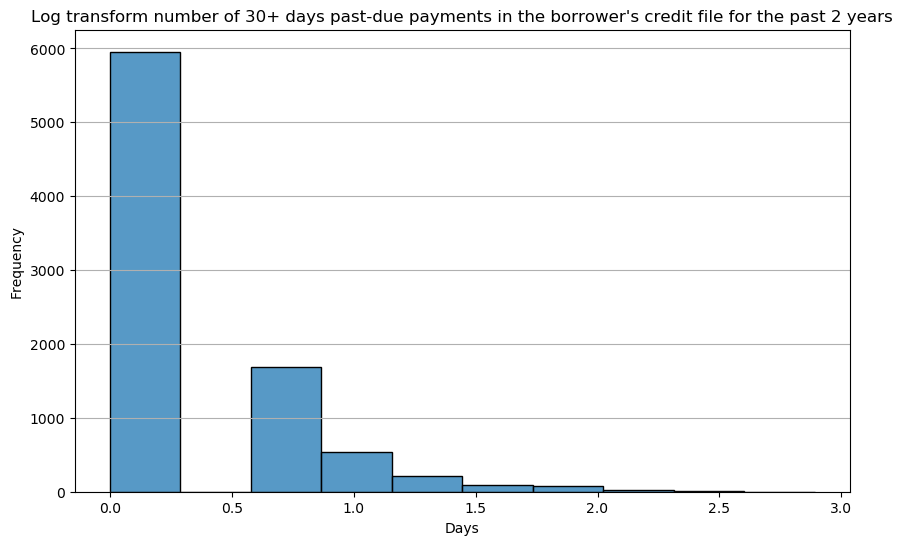

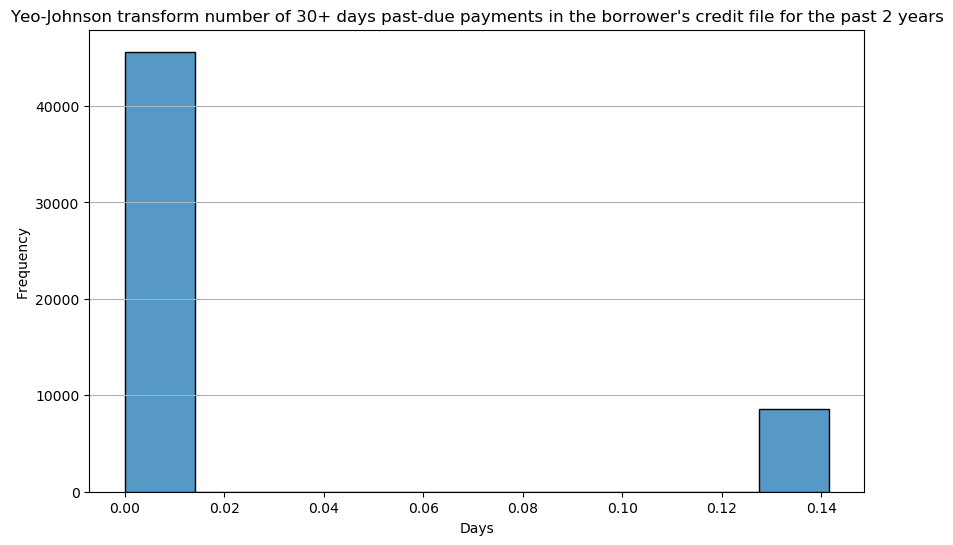

In [ ]:
delinq_log_transform = df_prep.skew_transform(df_prep.dataframe["delinq_2yrs"], transformation="log")
delinq_YJ_transform = df_prep.skew_transform(df_prep.dataframe["delinq_2yrs"], transformation="YJ")

plots.hist_plot(dataframe= delinq_log_transform,
                column="log",
                title= "Log transform number of 30+ days past-due payments in the borrower's credit file for the past 2 years",
                xlabel="Days",
                ylabel="Frequency")

plots.hist_plot(dataframe= delinq_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson transform number of 30+ days past-due payments in the borrower's credit file for the past 2 years",
                xlabel="Days",
                ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:915: RuntimeWarning: invalid value encountered in scalar subtract
  m = (q75 - q25) / np.diff(theoretical_quartiles)


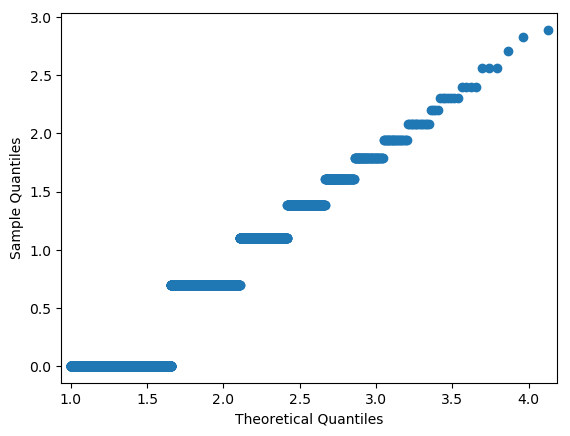

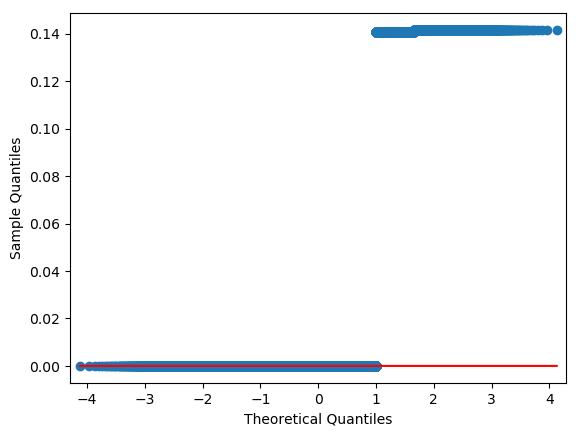

In [ ]:
plots.plot_qq(dataframe=delinq_log_transform,
              column="log")
plots.plot_qq(dataframe=delinq_YJ_transform ,
              column="Yeo-Johnson")

In [ ]:
df_prep.dataframe["delinq_2yrs"]  = delinq_log_transform 

##### Out prncp

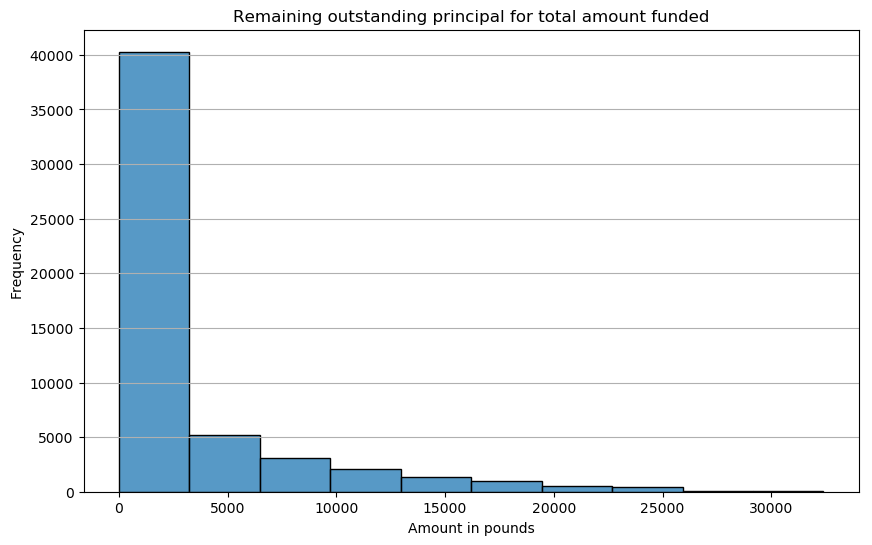

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="out_prncp",
                title= "Remaining outstanding principal for total amount funded",
                xlabel="Amount in pounds",
                ylabel="Frequency")

The histogram shows positive/right skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


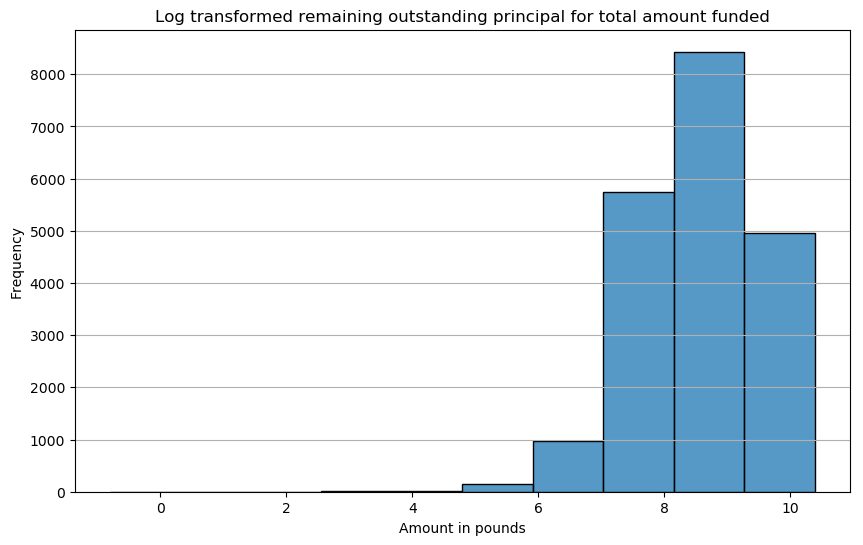

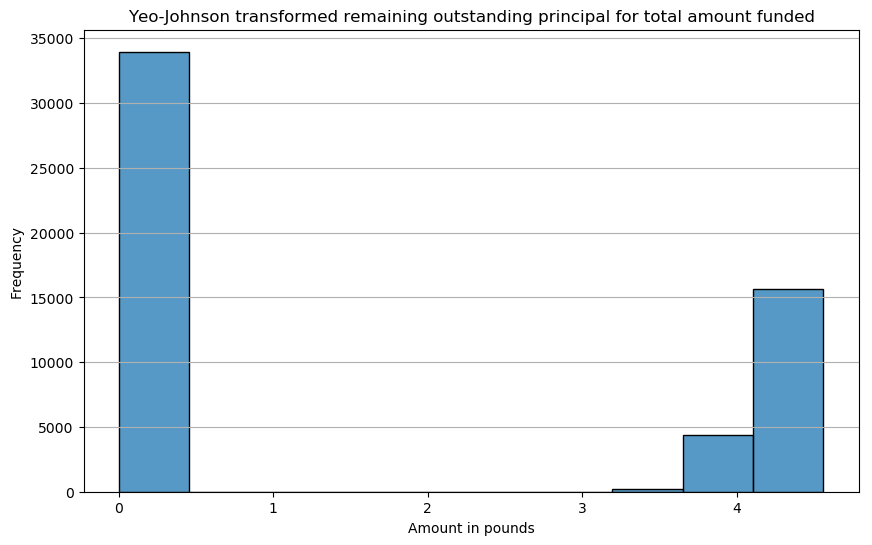

In [ ]:
# Apply log transformation.
out_pr_in_log_transform = df_prep.skew_transform(df_prep.dataframe["out_prncp"], transformation="log")
out_pr_YJ_transform = df_prep.skew_transform(df_prep.dataframe["out_prncp"], transformation="YJ")

# Plot log transformation
plots.hist_plot(dataframe= out_pr_in_log_transform,
                column="log",
                title= "Log transformed remaining outstanding principal for total amount funded",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Plot Box-Cox Yeo-Johnson
plots.hist_plot(dataframe = out_pr_YJ_transform,
                column="Yeo-Johnson",
                bins_size= 10, 
                title= "Yeo-Johnson transformed remaining outstanding principal for total amount funded", 
                xlabel="Amount in pounds",
                ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:916: RuntimeWarning: invalid value encountered in subtract
  b = q25 - m * theoretical_quartiles[0]
c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:917: RuntimeWarning: invalid value encountered in multiply
  ax.plot(x, m * x + b, **lineoptions)


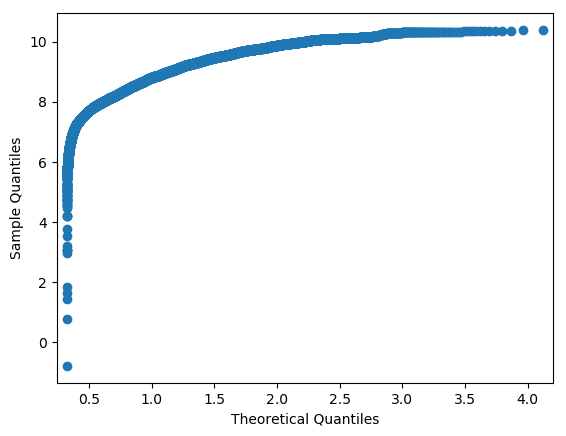

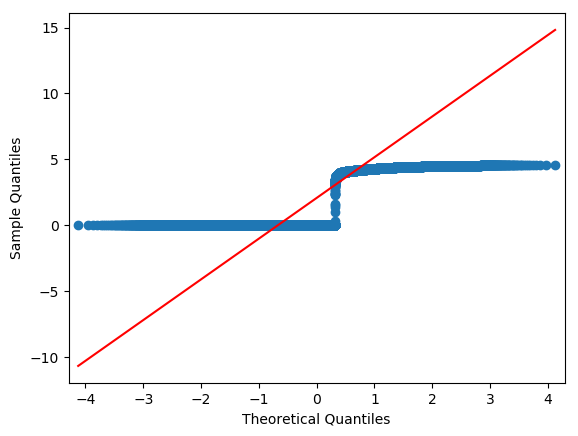

In [ ]:
plots.plot_qq(dataframe=out_pr_in_log_transform,
              column="log")
plots.plot_qq(dataframe=out_pr_YJ_transform,
              column="Yeo-Johnson")

Histograms and qq plots showed that the transformation do not have great affect in normalising the data. Since the log transformation is the closet to normal distribution between the I will proceed wiht this transformation. However, this data  will require another transformation that brings the data closer to a normal distirbution.

In [ ]:
df_prep.dataframe["out_prncp"] = out_pr_in_log_transform


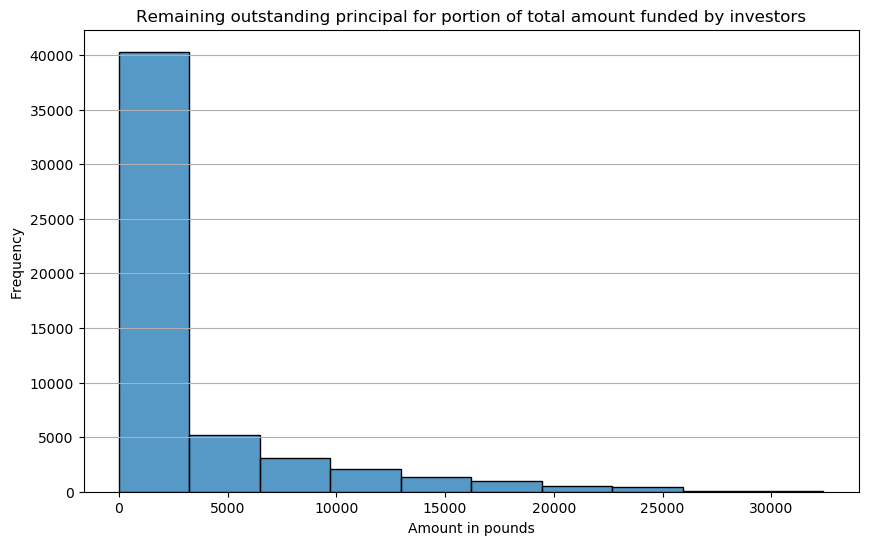

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="out_prncp_inv",
                title= "Remaining outstanding principal for portion of total amount funded by investors",
                xlabel="Amount in pounds",
                ylabel="Frequency")

This histogram showed positve right skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


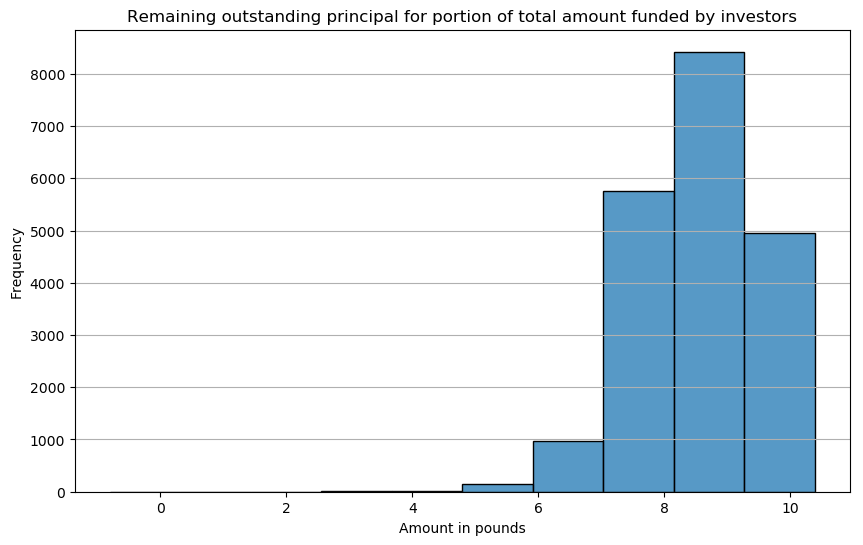

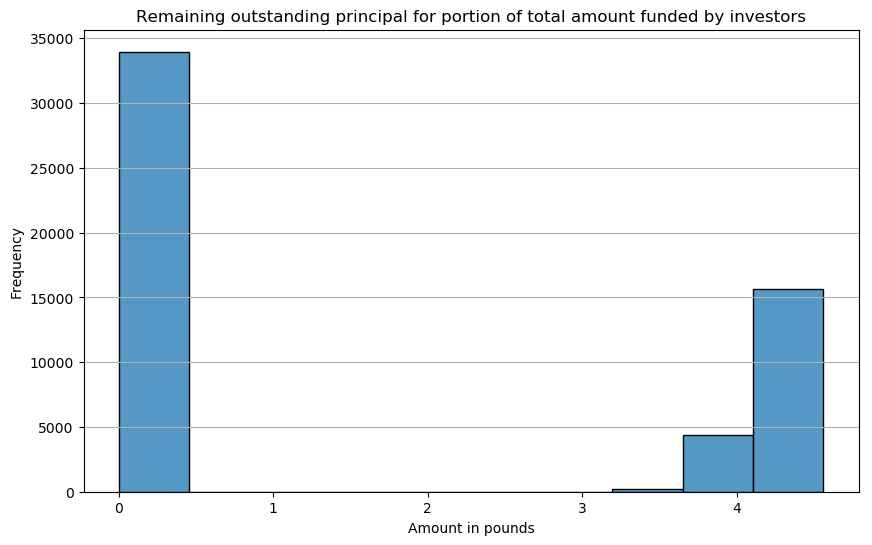

In [ ]:
# Apply log transformation.
out_in_in_log_transform = df_prep.skew_transform(df_prep.dataframe["out_prncp_inv"], transformation="log")
out_in_YJ_transform = df_prep.skew_transform(df_prep.dataframe["out_prncp_inv"], transformation="YJ")

# Log transformation
plots.hist_plot(dataframe= out_in_in_log_transform,
                column="log",
                title= "Remaining outstanding principal for portion of total amount funded by investors",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Log transformation
plots.hist_plot(dataframe= out_in_YJ_transform,
                column="Yeo-Johnson",
                title= "Remaining outstanding principal for portion of total amount funded by investors",
                xlabel="Amount in pounds",
                ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:916: RuntimeWarning: invalid value encountered in subtract
  b = q25 - m * theoretical_quartiles[0]
c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:917: RuntimeWarning: invalid value encountered in multiply
  ax.plot(x, m * x + b, **lineoptions)


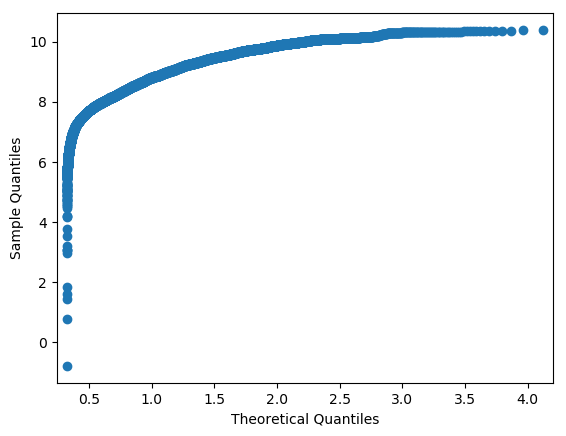

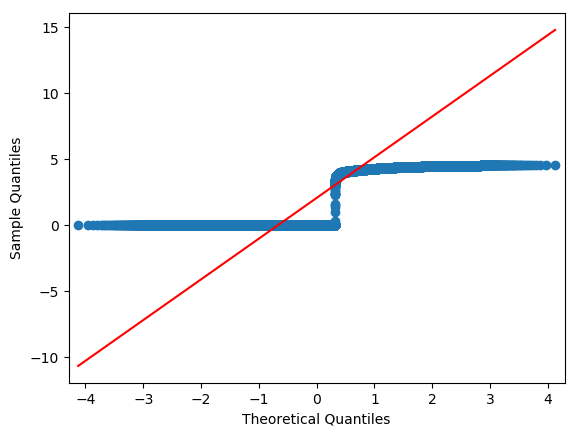

In [ ]:
plots.plot_qq(dataframe=out_in_in_log_transform,
              column="log")
plots.plot_qq(dataframe=out_in_YJ_transform,
              column="Yeo-Johnson")

The histograms and qq plots showed that either transformation cannot fully correct the skew of the data. However, since the distribution of the log transform data is closer to a normal distribtuion than the Yeo-Johnson, this one will be use for this data.

In [ ]:
df_prep.dataframe["out_prncp_inv"] = out_in_in_log_transform 

##### Recoveries

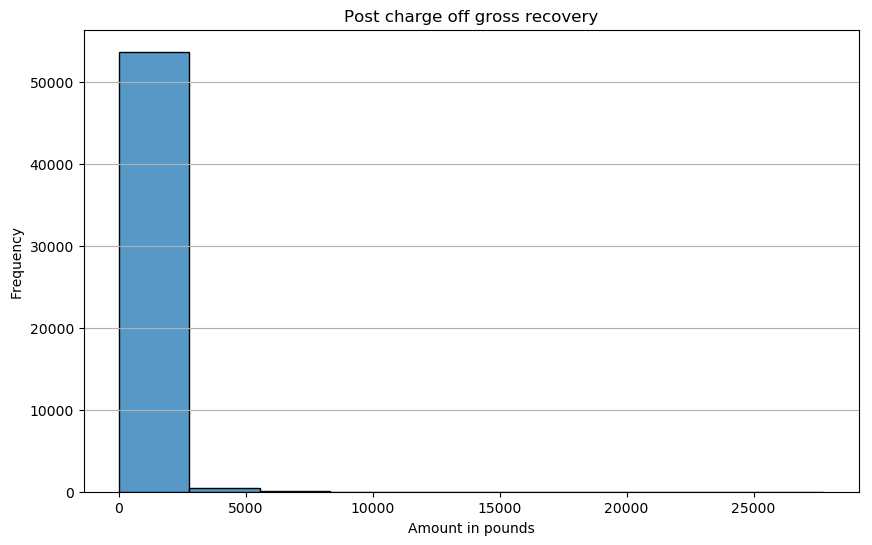

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="recoveries",
                title= "Post charge off gross recovery",
                xlabel="Amount in pounds",
                ylabel="Frequency")

The histogram shows, positive/ rigth skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


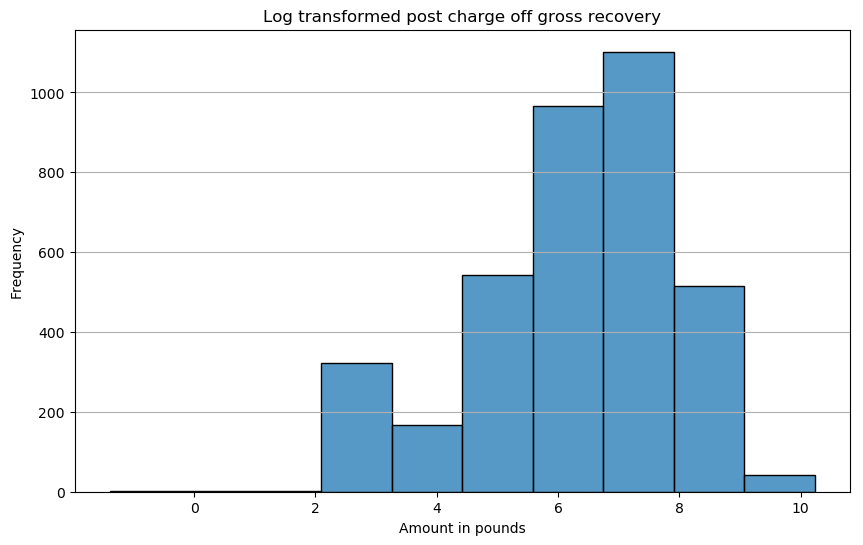

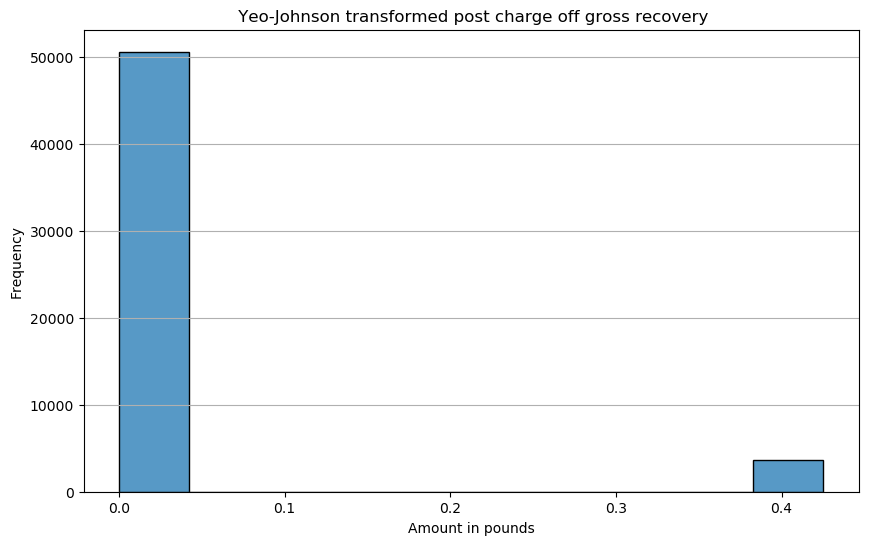

In [ ]:
# Apply log transformation.
recover_in_log_transform = df_prep.skew_transform(df_prep.dataframe["recoveries"], transformation="log")
recover_YJ_transform = df_prep.skew_transform(df_prep.dataframe["recoveries"], transformation="YJ")

# Log transformation
plots.hist_plot(dataframe= recover_in_log_transform,
                column="log",
                title= "Log transformed post charge off gross recovery",
                xlabel="Amount in pounds",
                ylabel="Frequency")

# Log transformation
plots.hist_plot(dataframe= recover_YJ_transform,
                column="Yeo-Johnson",
                title= " Yeo-Johnson transformed post charge off gross recovery",
                xlabel="Amount in pounds",
                ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:915: RuntimeWarning: invalid value encountered in scalar subtract
  m = (q75 - q25) / np.diff(theoretical_quartiles)


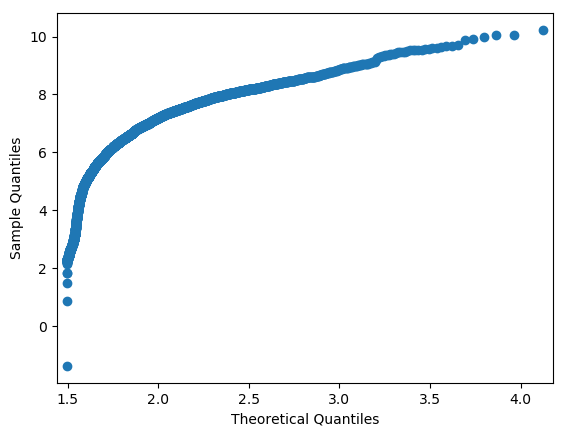

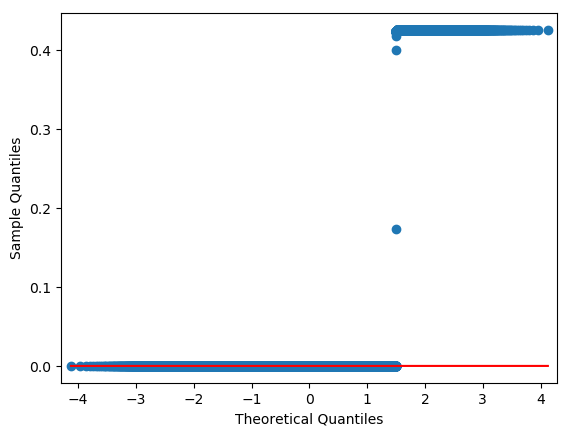

In [ ]:
plots.plot_qq(dataframe=recover_in_log_transform,
              column="log")
plots.plot_qq(dataframe=recover_YJ_transform,
              column="Yeo-Johnson")

The histograms and qq plots showed that either transformation cannot fully correct the skew of the data. However, since the distribution of the log transform data is closer to a normal distribtuion than the Yeo-Johnson, this one will be use for this data.

In [ ]:
df_prep.dataframe["recoveries"] = recover_in_log_transform

##### Collection recovery fee

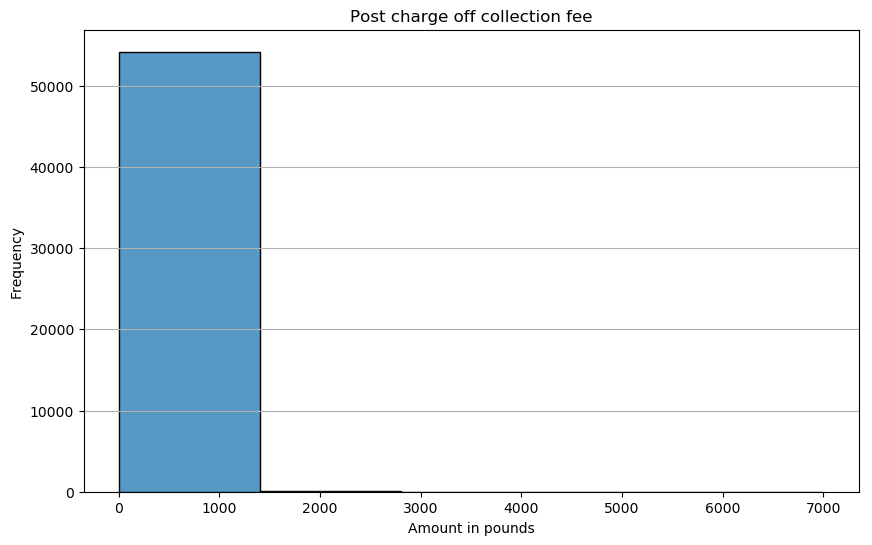

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="collection_recovery_fee", 
                title= "Post charge off collection fee",
                xlabel="Amount in pounds",
                ylabel="Frequency",
                bins_size=5)

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


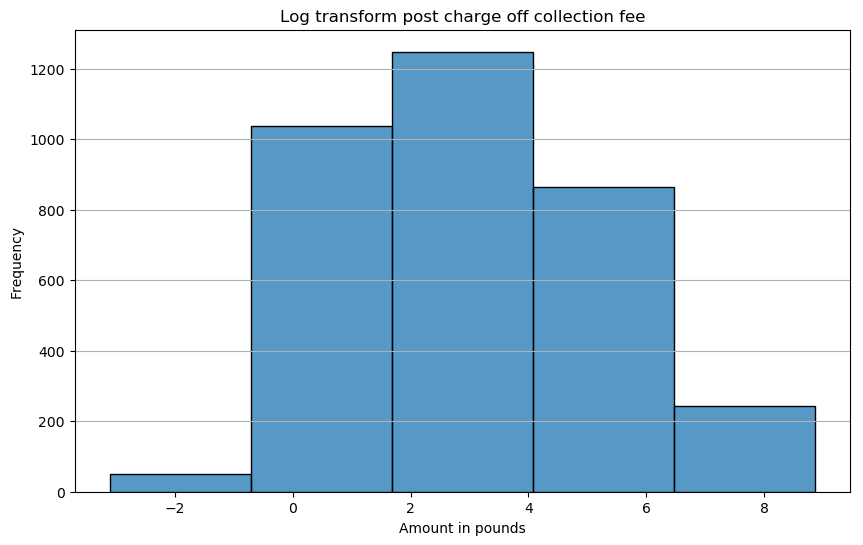

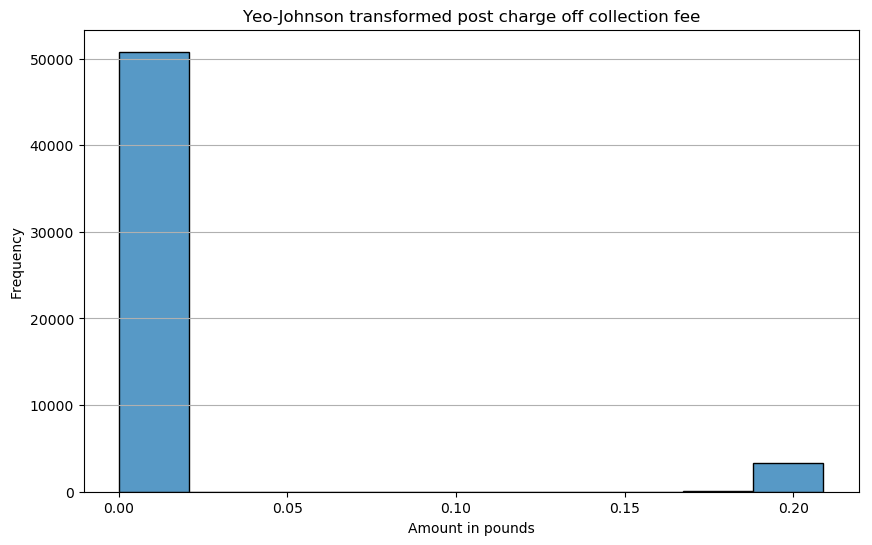

In [ ]:
# Apply log transformation.
collection_in_log_transform = df_prep.skew_transform(df_prep.dataframe["collection_recovery_fee"], transformation="log")
collection_YJ_transform = df_prep.skew_transform(df_prep.dataframe["collection_recovery_fee"], transformation="YJ")

# Plot log transformation
plots.hist_plot(dataframe= collection_in_log_transform,
                column="log", 
                title= "Log transform post charge off collection fee",
                xlabel="Amount in pounds",
                ylabel="Frequency",
                bins_size=5)

# Plot Box-Cox transformation
plots.hist_plot(dataframe = collection_YJ_transform,
                 column="Yeo-Johnson",
                 title= "Yeo-Johnson transformed post charge off collection fee",
                 xlabel="Amount in pounds",
                 ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:915: RuntimeWarning: invalid value encountered in scalar subtract
  m = (q75 - q25) / np.diff(theoretical_quartiles)


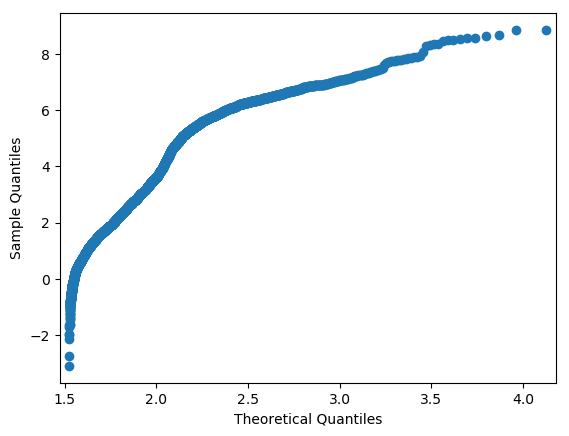

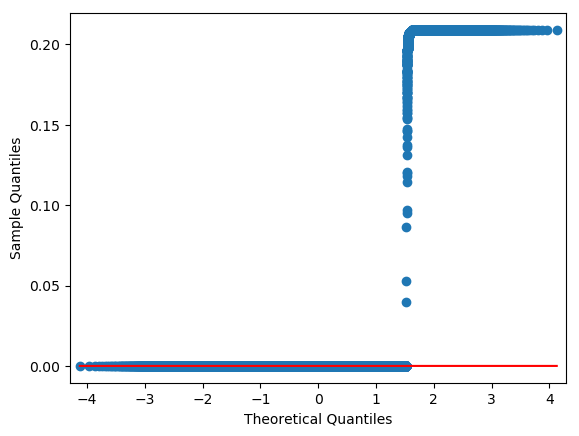

In [ ]:
plots.plot_qq(dataframe=collection_in_log_transform,
              column="log")
plots.plot_qq(dataframe=collection_YJ_transform,
               column="Yeo-Johnson")

The histograms and qqplots showed that the log transformation has the greates effect in correcting the skenes and therefore it will be used.

In [ ]:
df_prep.dataframe["collection_recovery_fee"] = collection_in_log_transform 

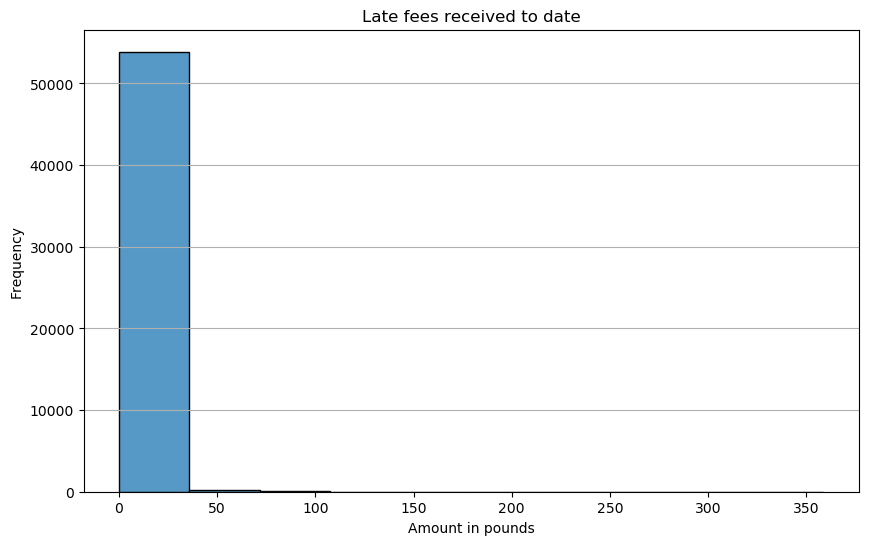

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="total_rec_late_fee",
                title= "Late fees received to date",
                xlabel="Amount in pounds",
                ylabel="Frequency")

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


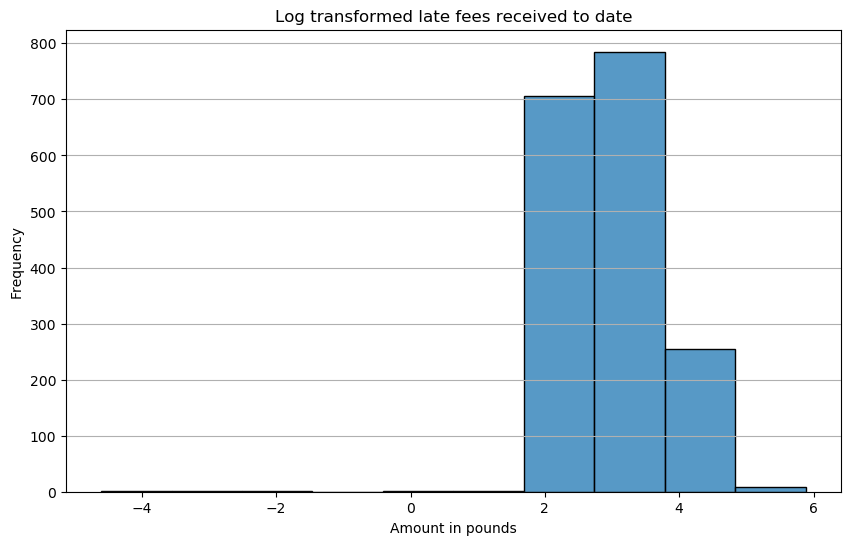

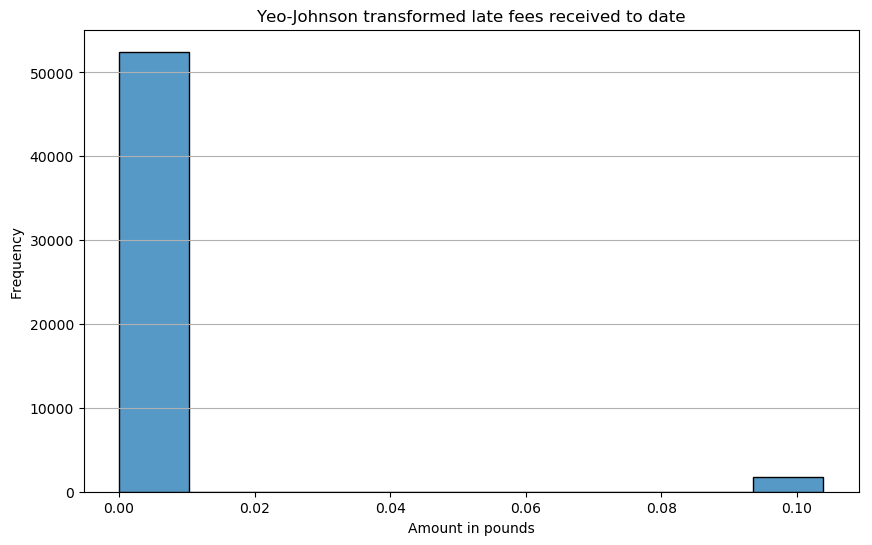

In [ ]:
# Apply log transformation.
total_p_in_log_transform = df_prep.skew_transform(df_prep.dataframe["total_rec_late_fee"], transformation="log")
total_p_YJ_transform = df_prep.skew_transform(df_prep.dataframe["total_rec_late_fee"], transformation="YJ")

plots.hist_plot(dataframe= total_p_in_log_transform,
                column="log",
                title= "Log transformed late fees received to date",
                xlabel="Amount in pounds",
                ylabel="Frequency")

plots.hist_plot(dataframe= total_p_YJ_transform,
                 column="Yeo-Johnson",
                 title= "Yeo-Johnson transformed late fees received to date",
                 xlabel="Amount in pounds",
                 ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:915: RuntimeWarning: invalid value encountered in scalar subtract
  m = (q75 - q25) / np.diff(theoretical_quartiles)


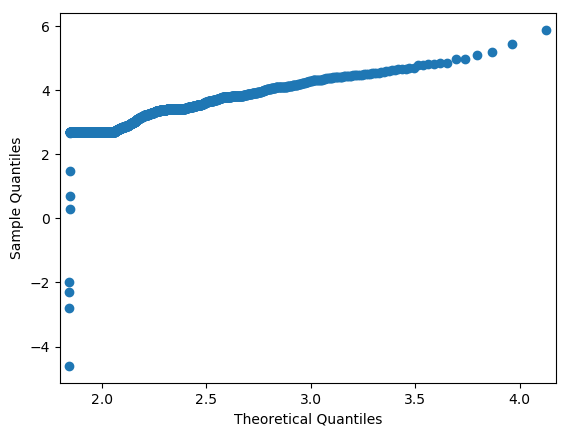

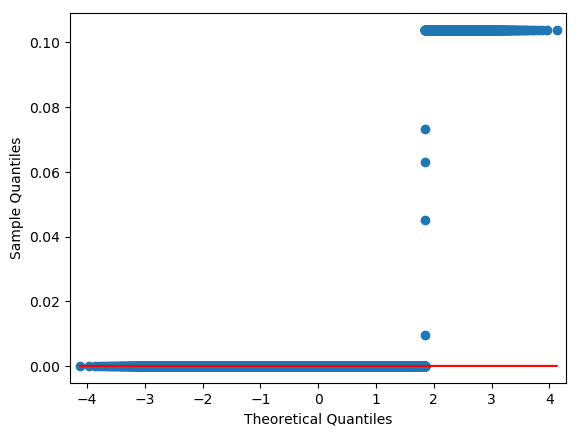

In [ ]:
plots.plot_qq(dataframe=total_p_in_log_transform,
              column="log")
plots.plot_qq(dataframe=total_p_YJ_transform,
               column="Yeo-Johnson")

The histograms and qqplots showed that the log transformation has the greates effect in correcting the skenes and therefore it will be used.

In [ ]:
df_prep.dataframe["total_rec_late_fee"] = total_p_in_log_transform

##### Inq last 6mths

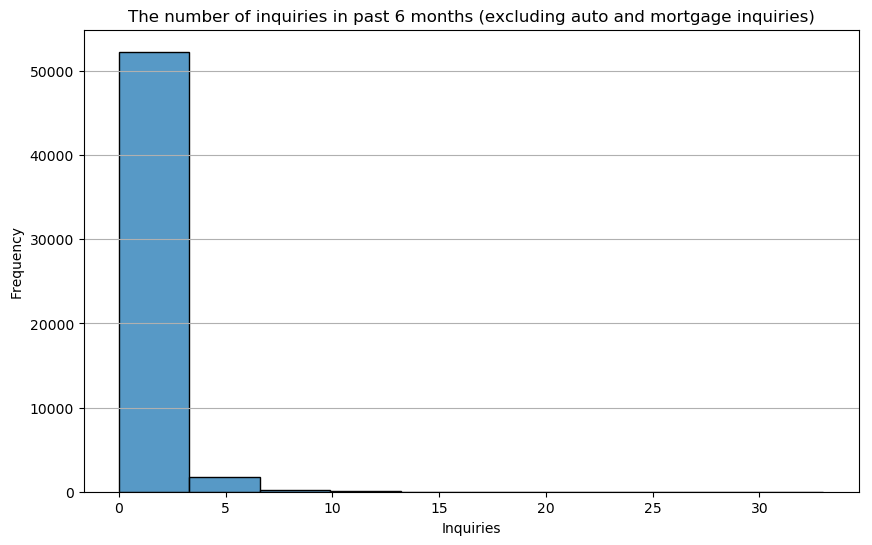

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="inq_last_6mths",
                title= "The number of inquiries in past 6 months (excluding auto and mortgage inquiries)",
                xlabel="Inquiries",
                ylabel="Frequency")

This histogram showed positive/right skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


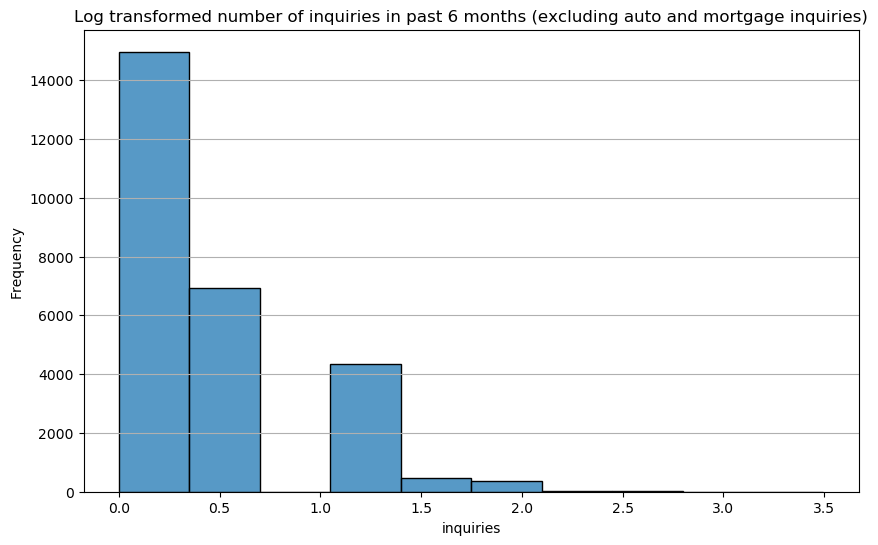

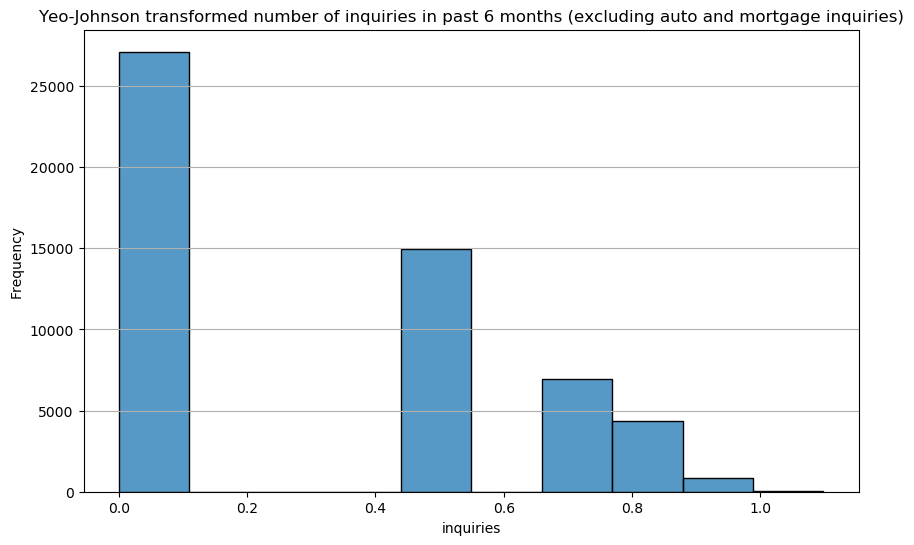

In [ ]:
# Apply log transformation.
inq_last_log_transform = df_prep.skew_transform(df_prep.dataframe["inq_last_6mths"], transformation="log")
inq_last_YJ_transform = df_prep.skew_transform(df_prep.dataframe["inq_last_6mths"], transformation="YJ")

# Plot log transformation
plots.hist_plot(dataframe = inq_last_log_transform ,
                column="log",
                title= "Log transformed number of inquiries in past 6 months (excluding auto and mortgage inquiries)",
                xlabel="inquiries",
                ylabel="Frequency")



# Plot Box-Cox transformation
plots.hist_plot(dataframe = inq_last_YJ_transform,
                 column="Yeo-Johnson",
                 title= "Yeo-Johnson transformed number of inquiries in past 6 months (excluding auto and mortgage inquiries)",
                 xlabel="inquiries",
                 ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:916: RuntimeWarning: invalid value encountered in subtract
  b = q25 - m * theoretical_quartiles[0]
c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:917: RuntimeWarning: invalid value encountered in multiply
  ax.plot(x, m * x + b, **lineoptions)


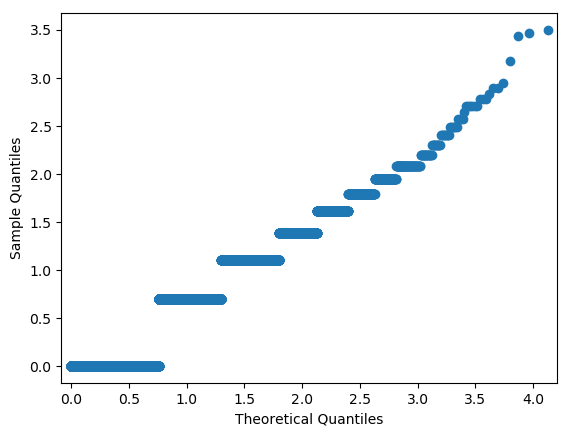

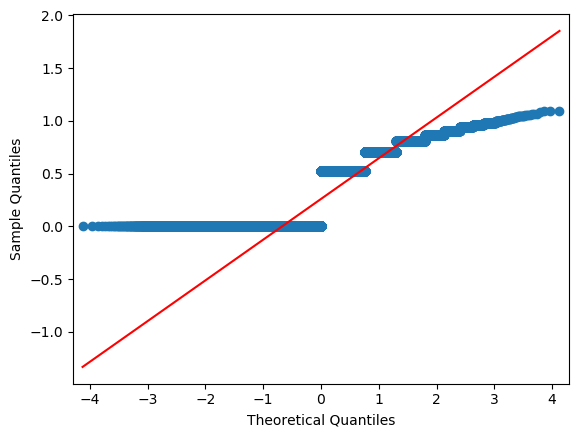

In [ ]:
plots.plot_qq(dataframe=inq_last_log_transform,
              column="log")
plots.plot_qq(inq_last_YJ_transform,
               column="Yeo-Johnson")

The histograms and qqplots showed that the log transformation has the greates effect in correcting the skenes and therefore it will be used.

In [ ]:
df_prep.dataframe["inq_last_6mths"] = inq_last_log_transform

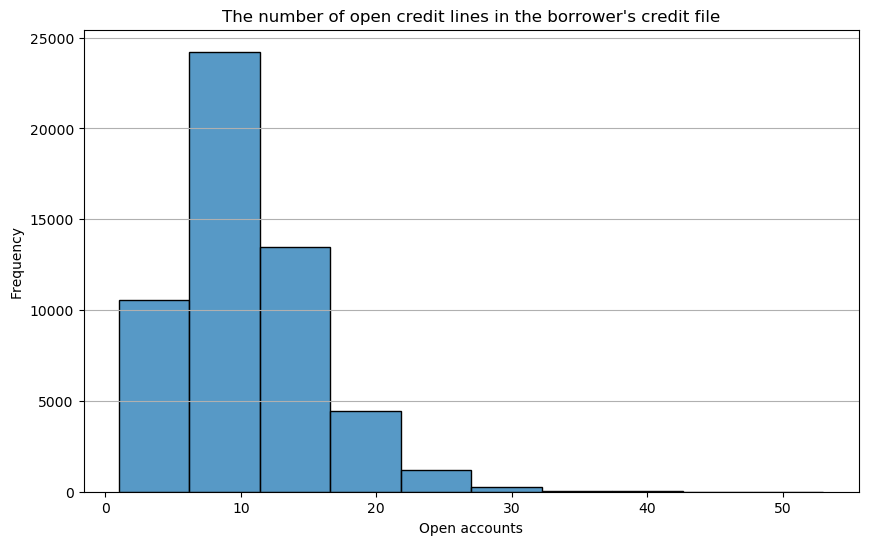

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="open_accounts",
                title= "The number of open credit lines in the borrower's credit file",
                xlabel="Open accounts",
                ylabel="Frequency")

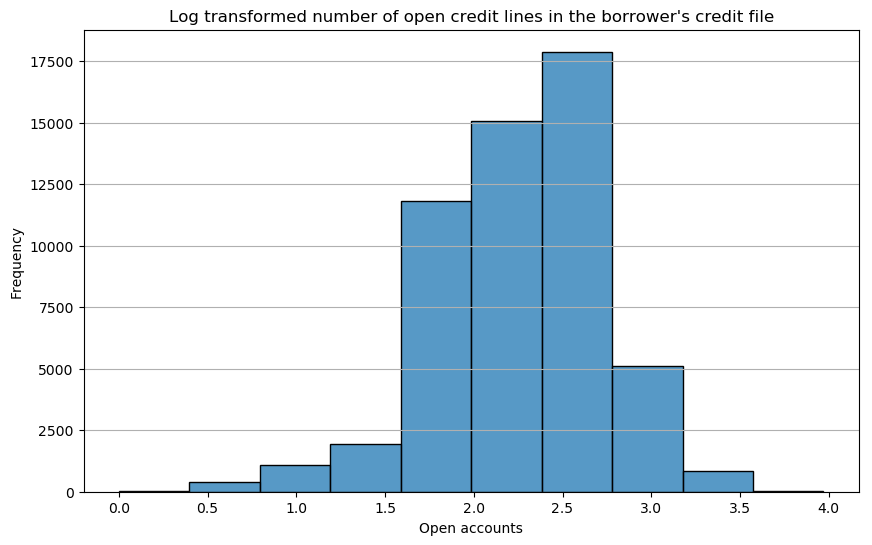

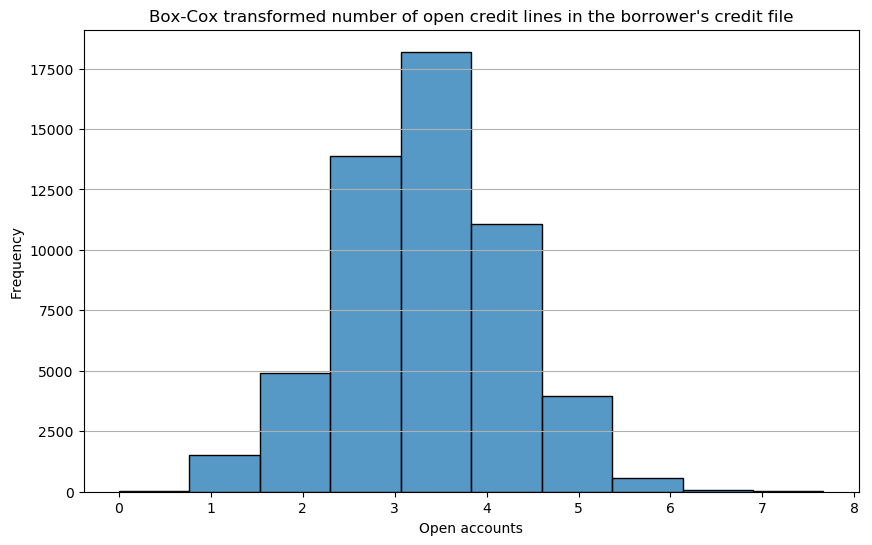

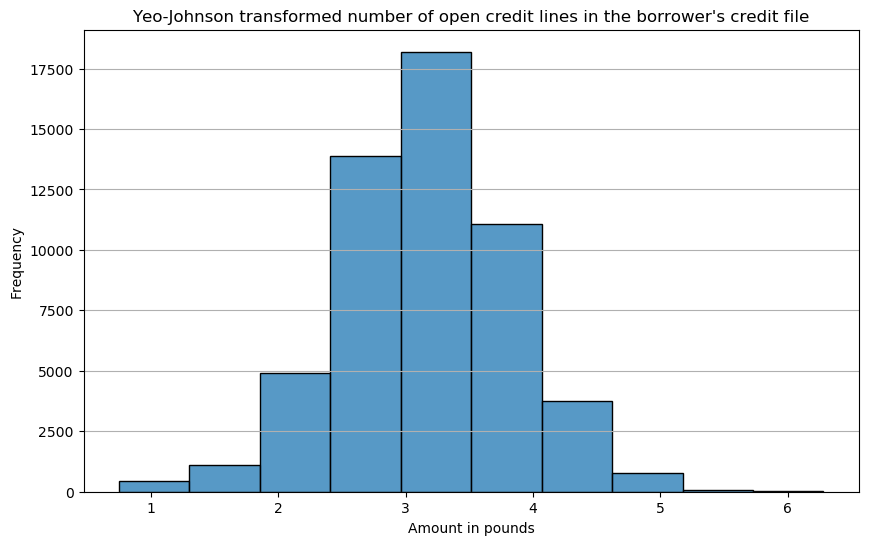

In [ ]:
# Apply log transformation.
open_a_log_transform = df_prep.skew_transform(df_prep.dataframe["open_accounts"], transformation="log")
open_a_BC_transform = df_prep.skew_transform(df_prep.dataframe["open_accounts"], transformation="BC")
open_a_YJ_transform = df_prep.skew_transform(df_prep.dataframe["open_accounts"], transformation="YJ")

# Log transformation
plots.hist_plot(dataframe= open_a_log_transform,
                column="log",
                title= "Log transformed number of open credit lines in the borrower's credit file",
                xlabel="Open accounts",
                ylabel="Frequency")


# Box-Cox transformation
plots.hist_plot(dataframe=open_a_BC_transform,
                column="Box-Cox",
                title= "Box-Cox transformed number of open credit lines in the borrower's credit file",
                xlabel="Open accounts",
                ylabel="Frequency")

# Plot Box-Cox transformation
plots.hist_plot(dataframe = open_a_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson transformed number of open credit lines in the borrower's credit file",
                xlabel="Amount in pounds",
                ylabel="Frequency")

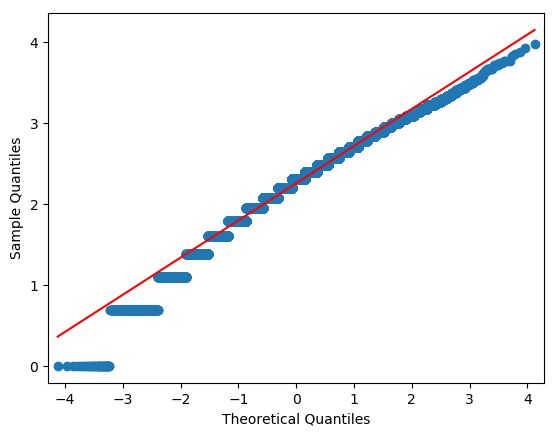

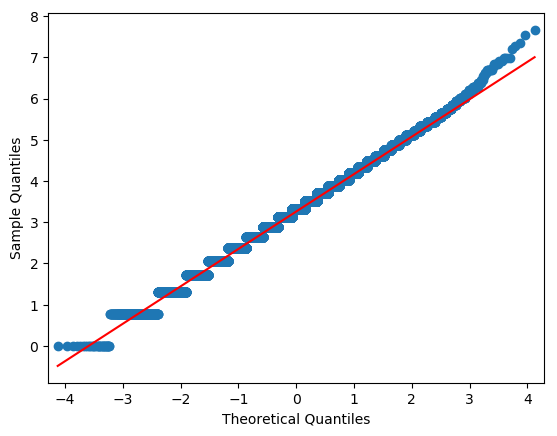

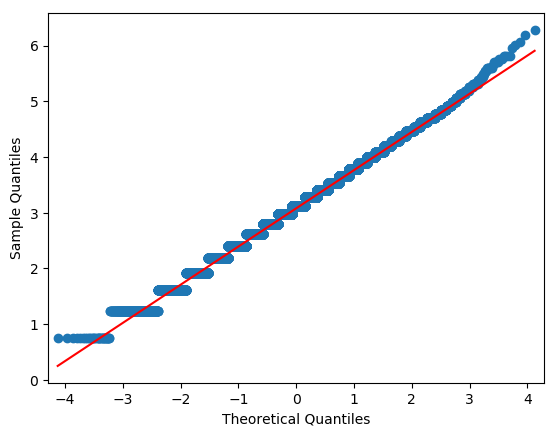

In [ ]:
plots.plot_qq(dataframe=open_a_log_transform,
              column="log")
plots.plot_qq(dataframe=open_a_BC_transform,
              column="Box-Cox")
plots.plot_qq(dataframe=open_a_YJ_transform,
              column="Yeo-Johnson")

The histograms and qqplots showed that the Box-Cox transformation had has the greates effect in bringign the distribution closer to normal. Although the the difference is not much greater than the effect of Yeo-Johnson transformation. Therefore the Box-Cox transformation will be used.

In [ ]:
df_prep.dataframe["open_accounts"] = open_a_BC_transform


##### Total accounts

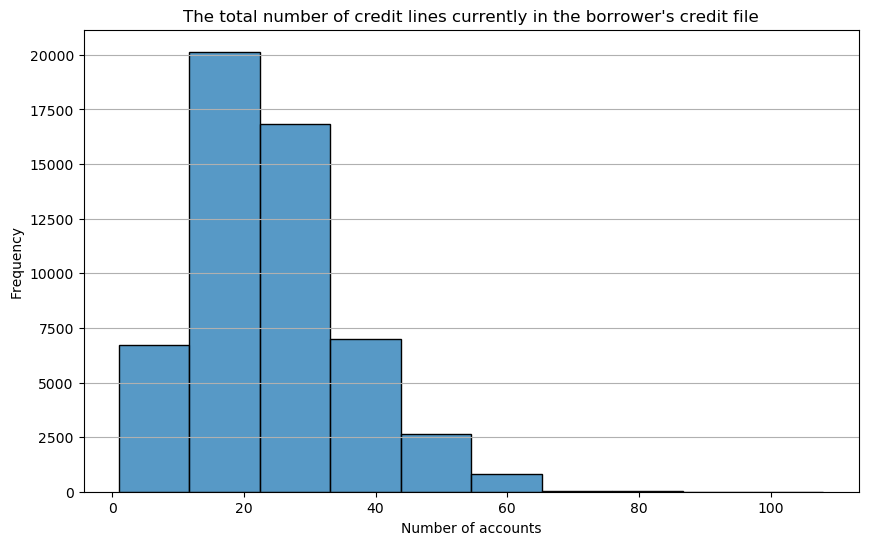

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="total_accounts",
                title= "The total number of credit lines currently in the borrower's credit file",
                xlabel="Number of accounts",
                ylabel="Frequency")

Positive/right skew

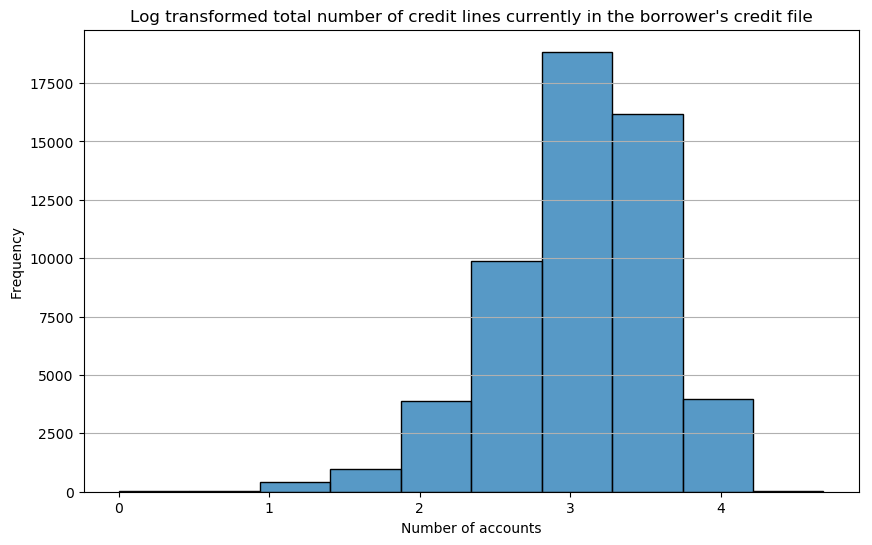

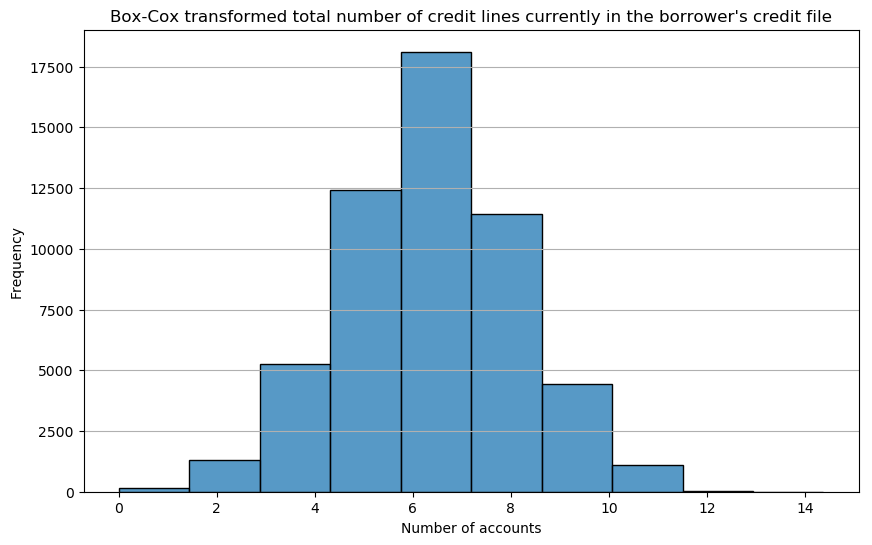

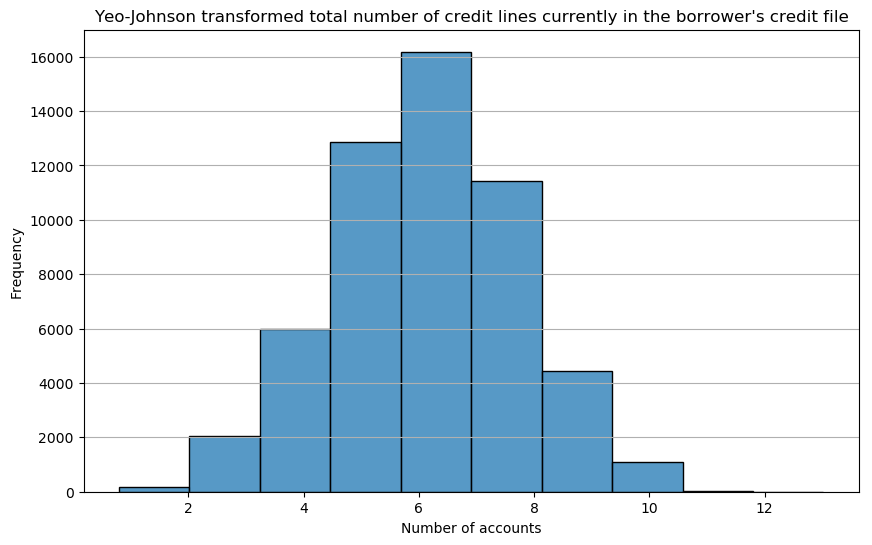

In [ ]:
total_ac_in_log_transform = df_prep.skew_transform(df_prep.dataframe["total_accounts"], transformation="log")
total_ac_BC_transform = df_prep.skew_transform(df_prep.dataframe["total_accounts"], transformation="BC")
total_ac_YJ_transform = df_prep.skew_transform(df_prep.dataframe["total_accounts"], transformation="YJ")

plots.hist_plot(dataframe= total_ac_in_log_transform,
                column="log",
                title= "Log transformed total number of credit lines currently in the borrower's credit file",
                xlabel="Number of accounts",
                ylabel="Frequency")

plots.hist_plot(dataframe= total_ac_BC_transform,
                column="Box-Cox",
                title= "Box-Cox transformed total number of credit lines currently in the borrower's credit file",
                xlabel="Number of accounts",
                ylabel="Frequency")

plots.hist_plot(dataframe= total_ac_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson transformed total number of credit lines currently in the borrower's credit file",
                xlabel="Number of accounts",
                ylabel="Frequency")



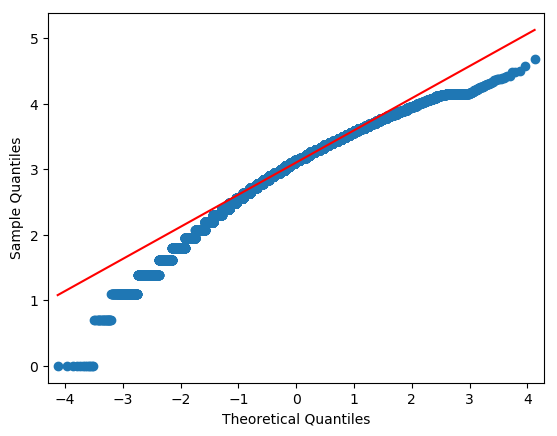

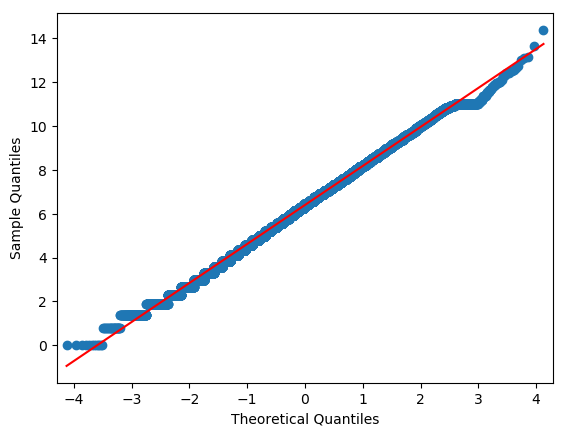

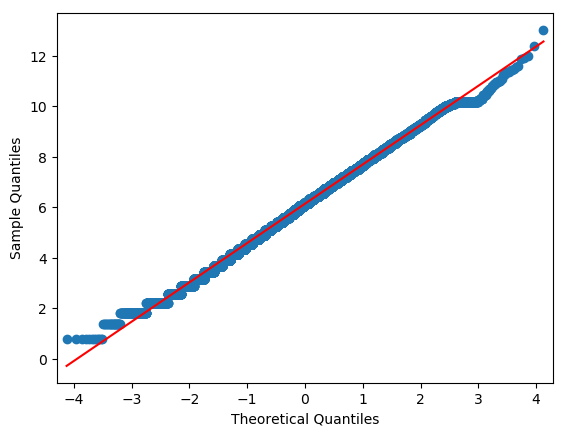

In [ ]:
plots.plot_qq(dataframe=total_ac_in_log_transform,
              column="log")
plots.plot_qq(dataframe=total_ac_BC_transform,
              column="Box-Cox")
plots.plot_qq(dataframe=total_ac_YJ_transform,
              column="Yeo-Johnson")

The histograms and qq plots shows that the box-Cox and Yeo-Johnson have the greates effect on the data. Since the data originally did not have any zero or negative values, the Box-Cox transformation will be used.

In [ ]:
df_prep.dataframe["total_accounts"] = total_ac_BC_transform 

##### Last payment amount

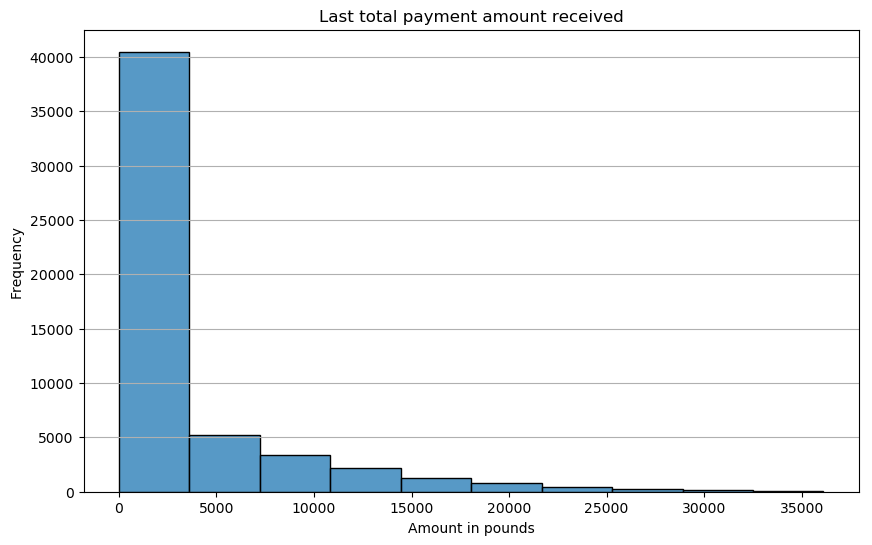

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="last_payment_amount",
                title= "Last total payment amount received",
                xlabel="Amount in pounds",
                ylabel="Frequency")


The histogram shows positive/right skew.

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


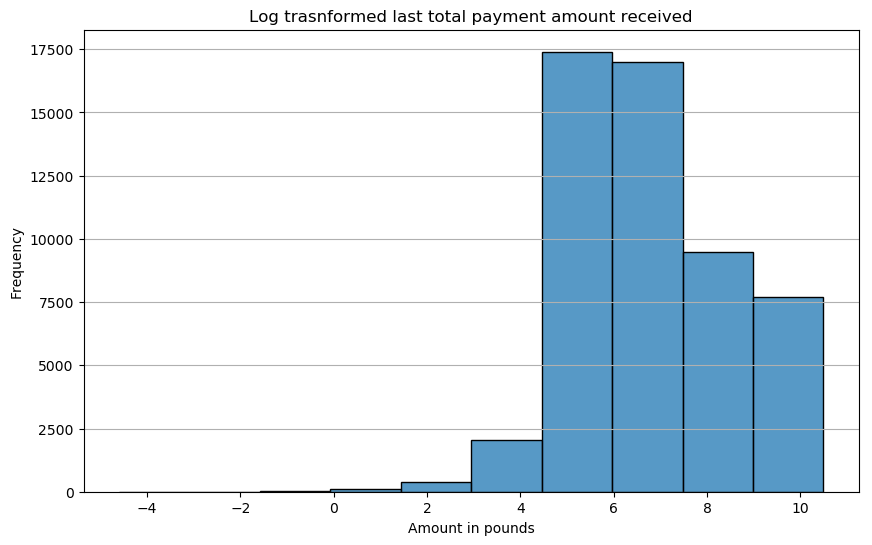

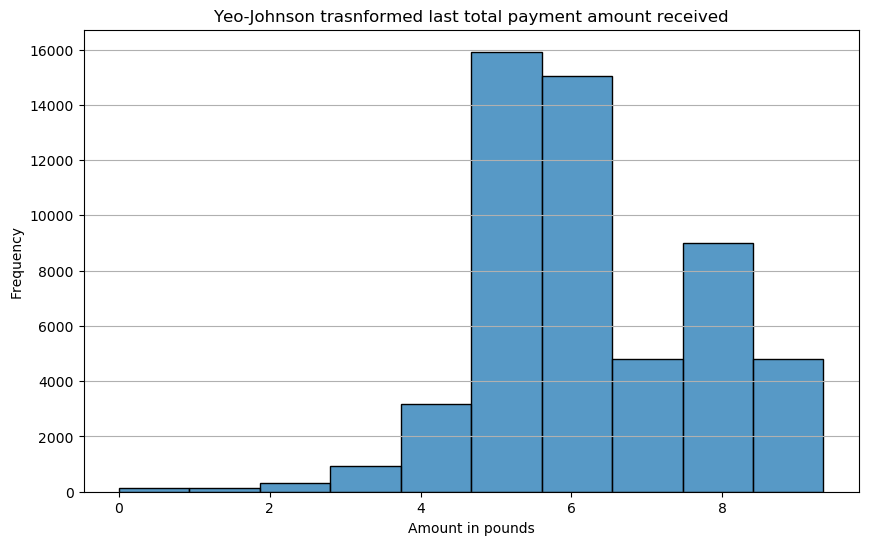

In [ ]:
# Apply transformations
last_p_in_log_transform = df_prep.skew_transform(df_prep.dataframe["last_payment_amount"], transformation="log")
last_p_YJ_transform = df_prep.skew_transform(df_prep.dataframe["last_payment_amount"], transformation="YJ")


plots.hist_plot(dataframe= last_p_in_log_transform,
                column="log",
                title= "Log trasnformed last total payment amount received",
                xlabel="Amount in pounds",
                ylabel="Frequency")

plots.hist_plot(dataframe= last_p_YJ_transform,
                column="Yeo-Johnson",
                title= "Yeo-Johnson trasnformed last total payment amount received",
                xlabel="Amount in pounds",
                ylabel="Frequency")

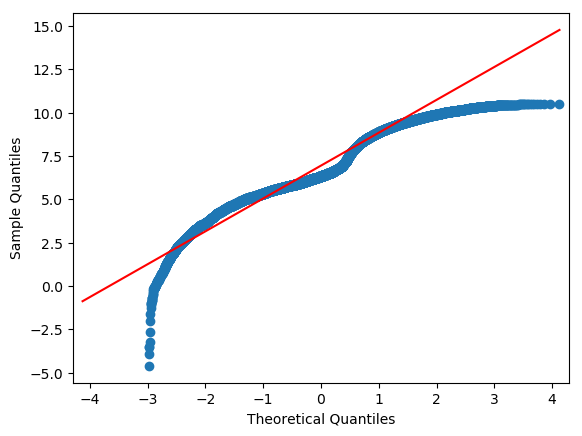

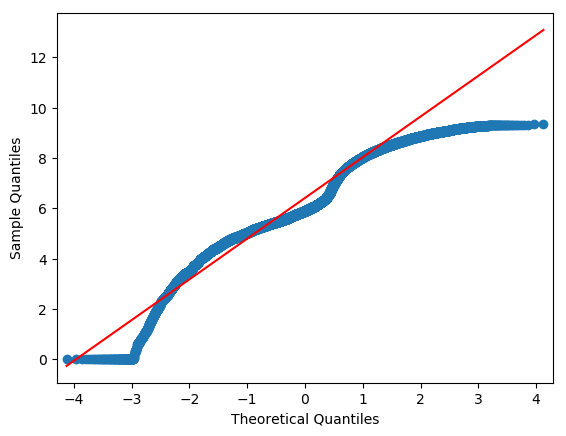

In [ ]:
plots.plot_qq(dataframe=last_p_in_log_transform,
              column="log")
plots.plot_qq(dataframe=last_p_YJ_transform,
              column="Yeo-Johnson")

The histograms and qq plots show that the Yeo-Johnson transformation ahs the greates effect. Therefore it will be applied to the data.

In [ ]:
df_prep.dataframe["last_payment_amount"] = last_p_YJ_transform

##### Collections 12 mths ex med

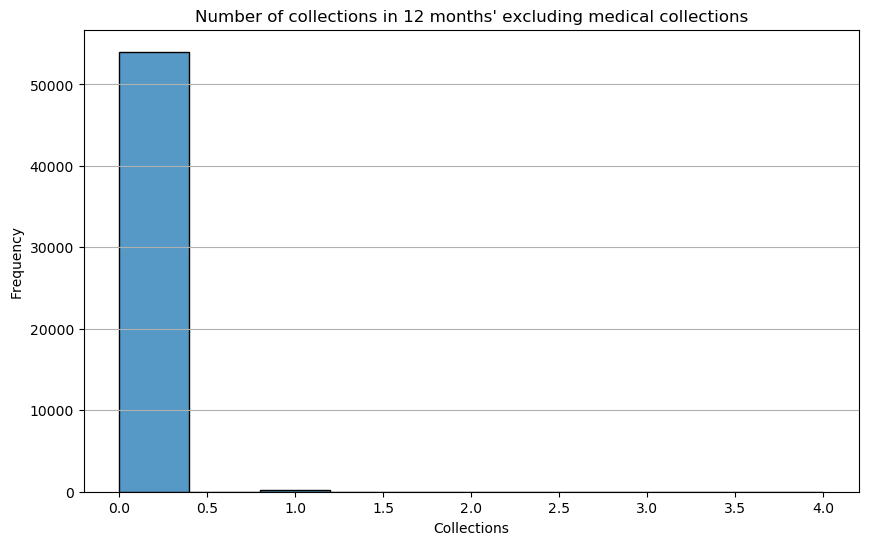

In [ ]:
plots.hist_plot(dataframe= df_prep.dataframe,
                column="collections_12_mths_ex_med",
                title= "Number of collections in 12 months' excluding medical collections",
                xlabel="Collections",
                ylabel="Frequency")

c:\Users\ChAre\OneDrive\Desktop\aicore\EDA_finance\SRC\pre_processing.py:252: RuntimeWarning: divide by zero encountered in log
  log_transform = pd.DataFrame({"log":np.log(data)})


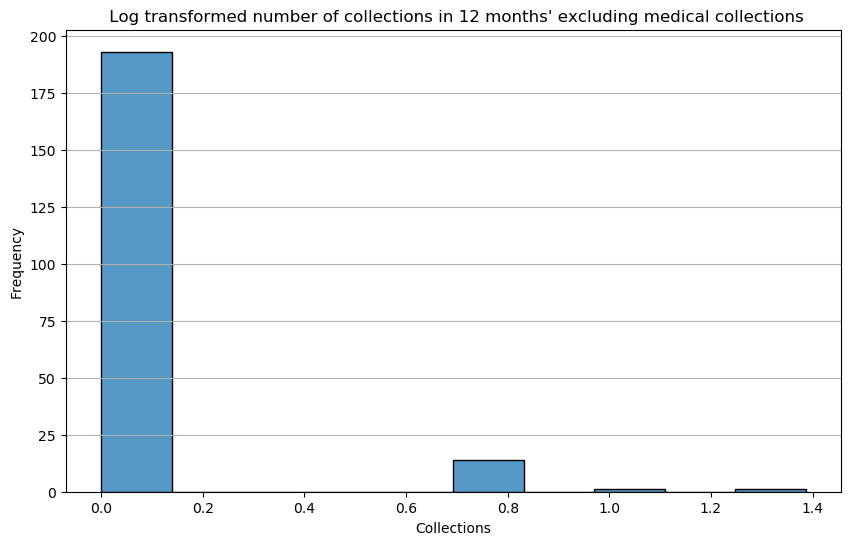

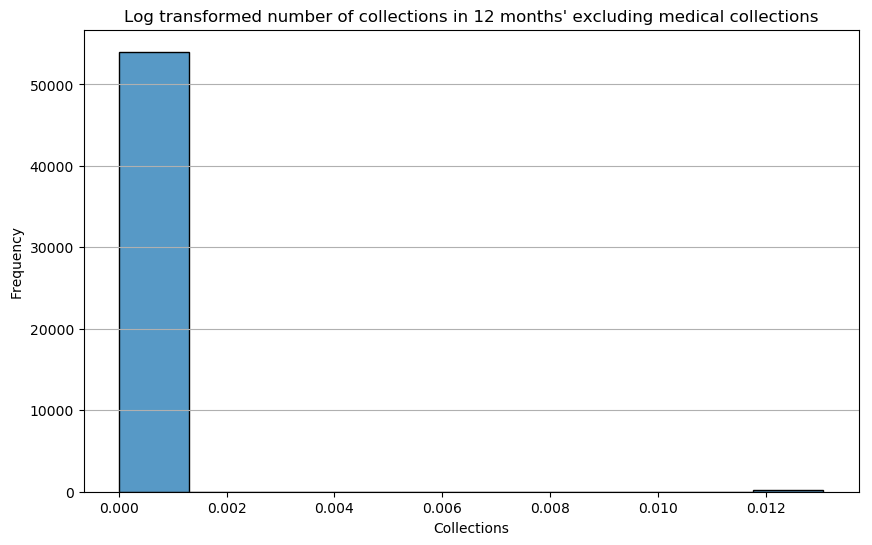

In [ ]:
# Apply log transformation.
collections_log_transform = df_prep.skew_transform(df_prep.dataframe["collections_12_mths_ex_med"], transformation="log")
collections_YJ_transform = df_prep.skew_transform(df_prep.dataframe["collections_12_mths_ex_med"], transformation="YJ")

plots.hist_plot(dataframe= collections_log_transform,
                column="log",
                title= " Log transformed number of collections in 12 months' excluding medical collections",
                xlabel="Collections",
                ylabel="Frequency")

plots.hist_plot(dataframe= collections_YJ_transform,
                 column="Yeo-Johnson",
                 title= "Log transformed number of collections in 12 months' excluding medical collections",
                 xlabel="Collections",
                 ylabel="Frequency")

c:\Users\ChAre\miniconda3\envs\EDA_finance_env\lib\site-packages\statsmodels\graphics\gofplots.py:915: RuntimeWarning: invalid value encountered in scalar subtract
  m = (q75 - q25) / np.diff(theoretical_quartiles)


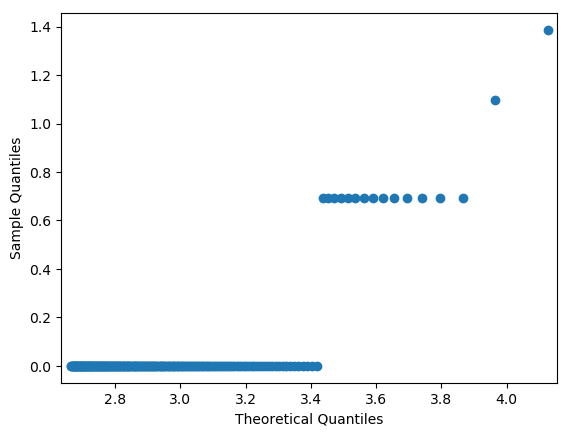

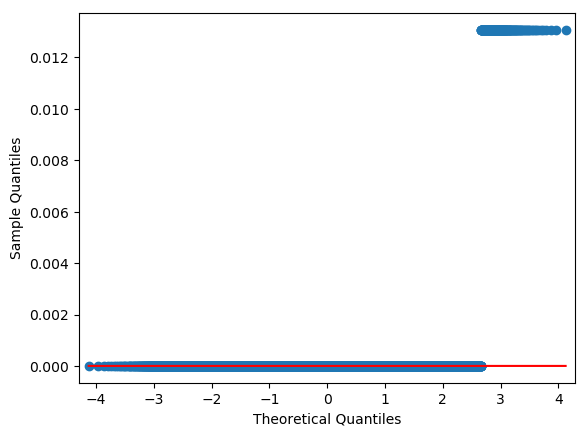

In [ ]:
plots.plot_qq(dataframe=collections_log_transform,
              column="log")
plots.plot_qq(dataframe=collections_YJ_transform,
               column="Yeo-Johnson")

The histograms and qq plots show that the log transformation has the greates effect. Therefore it will be use to transform the data.

In [ ]:
df_prep.dataframe["collections_12_mths_ex_med"] = collections_log_transform

# Outliers

In this sections numeric type columsn were visulised or tested for outliers wich then they were either removed or left.

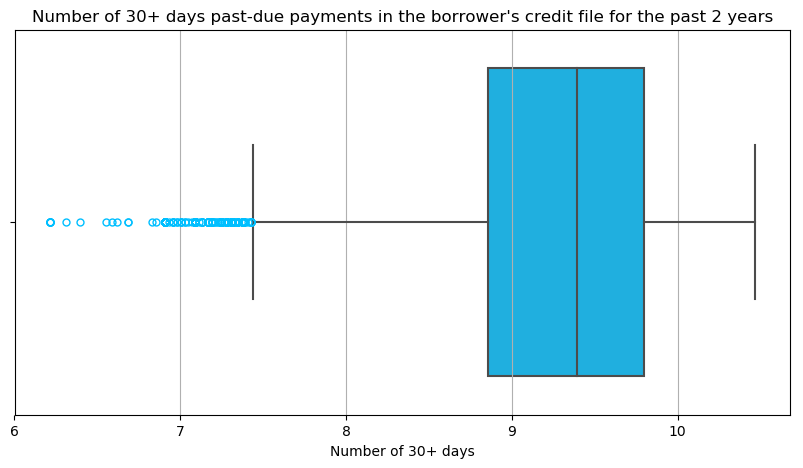

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="loan_amount", 
               title="Number of 30+ days past-due payments in the borrower's credit file for the past 2 years",
               xlabel="Number of 30+ days")

The histogram shows there is an otulier at the left wisker of the boxplot. However, since is close to the wisker it dosen't seem likely that it is an error.

In [ ]:
# z scores, the cutts of to be consider and outlier is normally >=  2 or 3
df_z = df_inf.z_score(dataframe=df_prep.dataframe, column="loan_amount")
# Turn on filter based on z_scores
df_z_cutoff = df_inf.z_score(dataframe=df_prep.dataframe, column="loan_amount", filter=True)
df_z_cutoff

Empty DataFrame
Columns: [loan_amount, z_scores]
Index: []

The z_scores showed that 23875 are considered and outlier, being z_score > 2. However, removing that many data points will affect all the distribution distribution for other columns. 

In [ ]:
# Idetify outlier based on IQR
df_inf.IQR_filter_outliers(column="loan_amount", dataframe=df_z)

Q1 (25th percentile): 8.85366542803745
Q3 (75th percentile): 9.798127036878302
IQR: 0.944461608840852


loan_amount  z_scores
20        7.313220 -1.973219
83        7.189168 -2.097272
84        7.090077 -2.196363
162       6.907755 -2.378684
255       6.907755 -2.378684
...            ...       ...
54168     7.313220 -1.973219
54194     6.907755 -2.378684
54199     6.907755 -2.378684
54206     6.907755 -2.378684
54214     7.090077 -2.196363

[823 rows x 2 columns]

The interquartile range showed six data points with the same value, which means that the single outlier in the boxplot is actually six overlapping data points. Since all six outliers share the same value and are very close to the left wisker, they don't seem to be an error and therefore, they will remian in the column. The box-plot and interquantile range seem to less stringet than z_scores. Therefore both of them will be use for the subsequent columns.

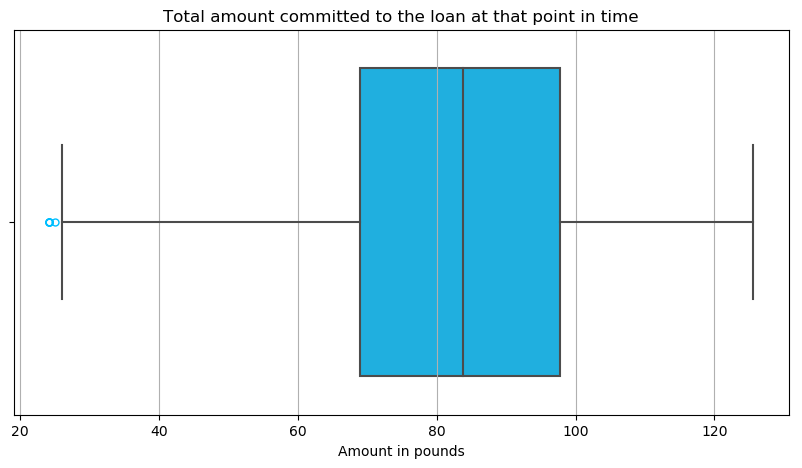

Q1 (25th percentile): 68.92421424529317
Q3 (75th percentile): 97.70290404637049
IQR: 28.77868980107732


funded_amount
53352      24.091883
53470      24.091883
53709      24.091883
53756      25.050206
53849      24.091883
54056      24.091883

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="funded_amount", 
               title="Total amount committed to the loan at that point in time",
               xlabel="Amount in pounds")

# Idetify outlier based on IQR
df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="funded_amount")

The histogram shows there are 2 otuliers at the left wisker of the boxplot, which slightly overlap with each other.However, the interquartile range shows that there are 6 outliers, of which five of them have the same values. Since 5 of the outliers share the same value and overlap wiht the 6th outlier all of them close to the left wisker of the boxplot, they don't seem to be an error. Therefore, they will remian in the column.

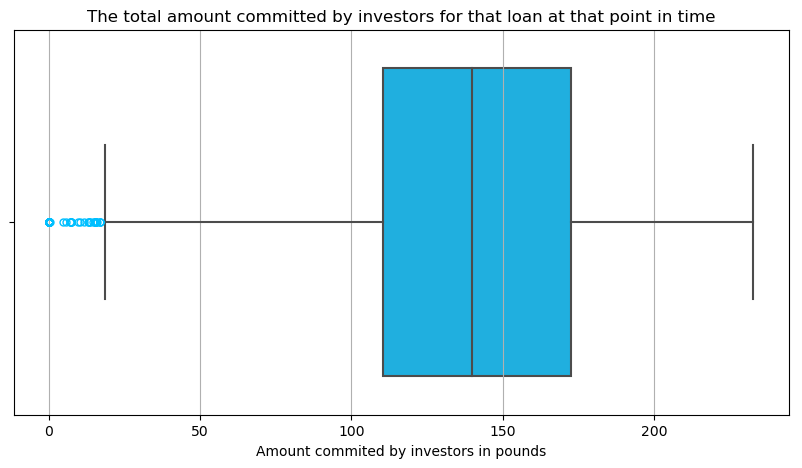

Q1 (25th percentile): 110.54873710858308
Q3 (75th percentile): 172.72824134736305
IQR: 62.17950423877997


funded_amount_inv
52975           0.000000
52979           0.000000
52980           0.000000
52981           0.000000
52987           0.000000
...                  ...
54138           0.007478
54142           7.321280
54168           7.321280
54199           0.000000
54201          15.241916

[155 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="funded_amount_inv", 
               title="The total amount committed by investors for that loan at that point in time",
               xlabel="Amount commited by investors in pounds")

# Idetify outlier based on IQR
df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="funded_amount_inv")

The histogram and interquartile range showed 155 outliers near by the left wisker of the box plot. These most of which overlap with each other, except those wiht a zero value. Altough they are outisde of the wiskers, their clustering and overlapping suggest that these data points are no an error. Interially the data points wiht a zero value can be deleted but these can referring to loans funded by other means rather than investors. Taking into account that the outliers don't seem to be extreamily large, they will remain in the data.

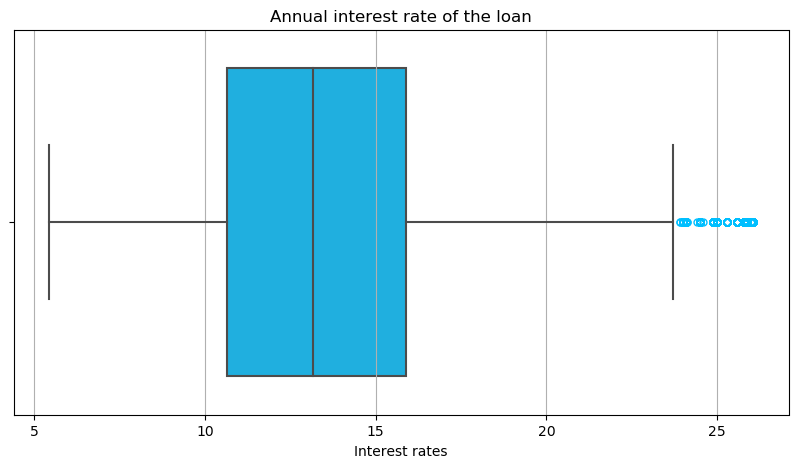

Q1 (25th percentile): 10.65
Q3 (75th percentile): 15.88
IQR: 5.23


int_rate
25        24.99
105       25.80
112       25.89
125       24.99
182       23.99
...         ...
36168     23.91
40009     25.83
40040     24.59
40171     24.40
53218     25.99

[919 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="int_rate", 
               title="Annual interest rate of the loan",
               xlabel="Interest rates")

# Idetify outlier based on IQR
df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="int_rate")

The histogram and interquartile range showed 919 outliers near by the right wisker of the box plot. These most of which overlap with each other. Altough they are outisde of the wiskers, their clustering and overlapping suggest that these data points are no an error. To determine if these are left or remove the interest rate for their corresponding need to be check with the data for those years. Hoever, since their values son't seem to be very large they will remain in the data.

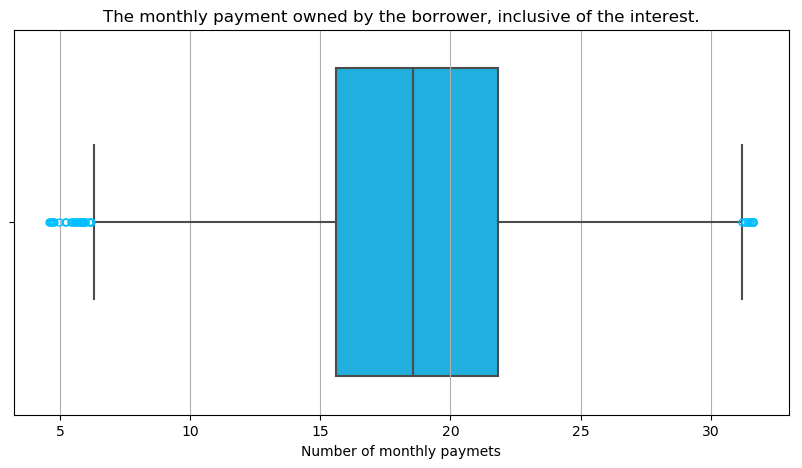

Q1 (25th percentile): 15.580614225187695
Q3 (75th percentile): 21.83411458625475
IQR: 6.253500361067054


instalment
607     31.433877
3863    31.641047
5488    31.636367
6750    31.636367
6935    31.641047
7330     6.173380
8108    31.433877
9046    31.510218
10470   31.309083
14101   31.600559
15141   31.636367
16033   31.510218
17070   31.309083
21731   31.215355
29572    5.946529
38445    5.437326
40953    5.600618
41497    5.812545
41634    5.572765
41644    5.547289
44719    5.897189
45369    6.153310
45931    5.632056
46894    5.233389
47202    5.863997
47526    5.712766
48041    5.743423
48078    5.185006
53318    5.417628
53352    4.620867
53358    5.537058
53470    4.554756
53647    5.847309
53709    4.657467
53756    4.957826
53843    4.682728
53849    4.742079
53899    5.843725
53913    6.092577
53948    5.939513
54056    4.723433

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="instalment", 
               title="The monthly payment owned by the borrower, inclusive of the interest.",
               xlabel="Number of monthly paymets")

# Idetify outlier based on IQR
df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="instalment")

The histogram and interquartile range showed 41 outliers near by the right wisker of the box plot. These most of which overlap with each other. Altough they are outisde of the wiskers, their clustering and overlapping suggest that these data points are no an error. To determine if these are left or remove the interest rate for their corresponding need to be check with the data for those years. Hoever, since their values son't seem to be very large they will remain in the data.

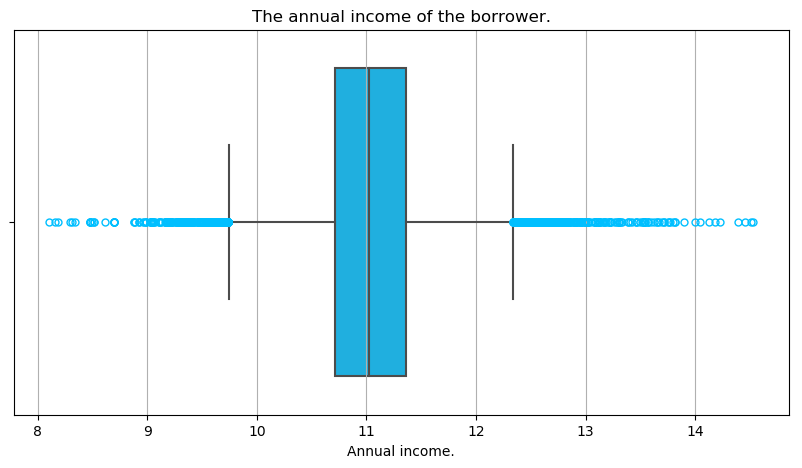

Q1 (25th percentile): 10.714417768752456
Q3 (75th percentile): 11.362102575235644
IQR: 0.6476848064831877


annual_inc
6        9.513108
43      12.793859
66      12.948010
112      9.210340
237     12.524526
...           ...
54209    9.615805
54214    8.294050
54226   12.429216
54227    9.615805
54228   12.611538

[1155 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="annual_inc", 
               title="The annual income of the borrower.",
               xlabel="Annual income.")

# Idetify outlier based on IQR
df_filter_outliers_an_in = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="annual_inc")
df_filter_outliers_an_in

The histogram and IQR_filter_outliers method shows 1335 ouliers. Altough there is a lot of overlapping and these data points don't seem to be an error, some of them have little over lapping. Therefore, we will remove all valu below 1.90, which are the values that less overlap between each other.

In [ ]:
outlier_delete_index_an_in = df_filter_outliers_an_in[df_filter_outliers_an_in["annual_inc"] < 1.90].index 
df_prep.remove_outlier(outlier_delete_index_an_in)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54229     88854      70699     8.517193      59.915634          22.768222   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54229            36.0      7.43   13.409807     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54229               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54229        2014-03-01            0.000000        2022-02-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228            2013-05-01                       -inf            1   
54229      

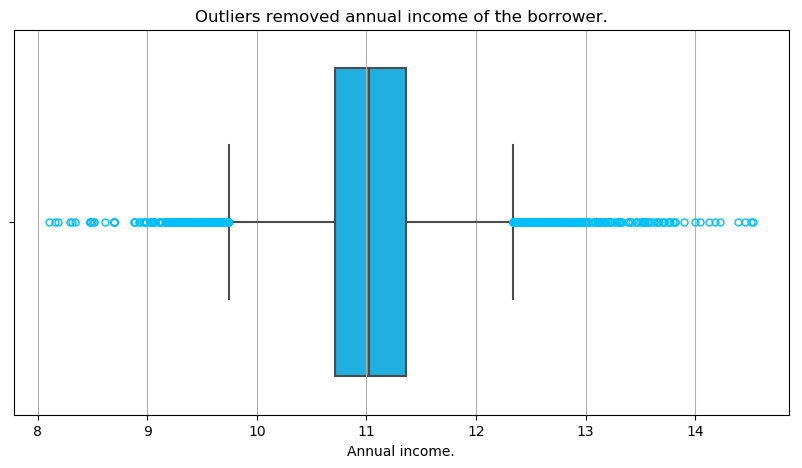

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="annual_inc", 
               title="Outliers removed annual income of the borrower.",
               xlabel="Annual income.")


In [ ]:
df_filter_outliers_is_da = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="issue_date")
df_filter_outliers_is_da

Q1 (25th percentile): 2017-05-01 00:00:00
Q3 (75th percentile): 2019-11-01 00:00:00
IQR: 914 days 00:00:00


issue_date
54196 2013-07-01
54197 2013-07-01
54200 2013-07-01
54201 2013-07-01
54206 2013-07-01
54207 2013-07-01
54208 2013-07-01
54209 2013-07-01
54210 2013-07-01
54211 2013-07-01
54212 2013-07-01
54214 2013-07-01
54215 2013-07-01
54216 2013-07-01
54217 2013-07-01
54218 2013-07-01
54219 2013-07-01
54220 2013-07-01
54222 2013-07-01
54223 2013-06-01
54224 2013-06-01
54226 2013-07-01
54230 2013-07-01

The IQR_filter_outliers shows 23 outliers. However, since the issue dat for loan can depend in several factor, these data points will remain.

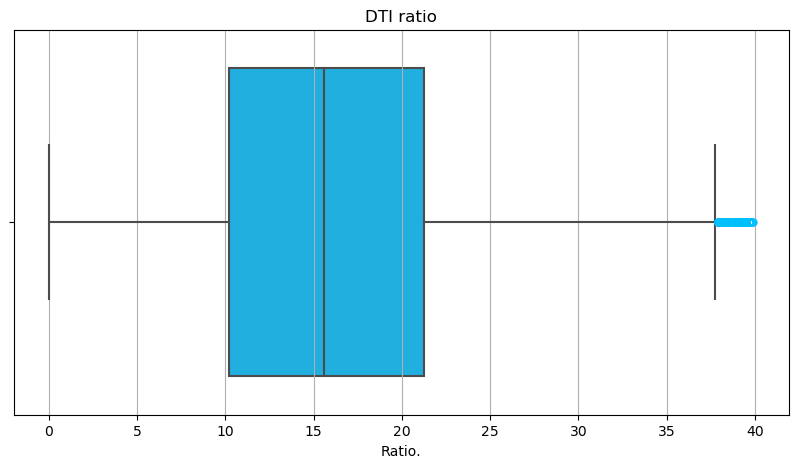

Q1 (25th percentile): 10.2
Q3 (75th percentile): 21.26
IQR: 11.060000000000002


dti
62    38.93
83    38.66
86    38.45
128   39.86
145   39.30
201   38.57
265   38.33
293   38.20
449   39.20
475   39.43
525   38.72
646   38.98
705   38.45
727   37.98
787   39.71
792   39.74
794   37.91
899   37.97
977   38.79
1120  39.31
1146  39.18
1182  38.90
1229  38.40
1339  39.38
1375  39.26
1383  38.97
1457  39.52
1551  39.25
1569  37.92
1733  38.03
1780  38.50
1917  39.91
2100  38.08
2108  39.50
2134  39.65
2217  38.19
2405  39.52
2414  39.71
2451  39.18
2488  37.92
2507  39.09
2563  38.32
2604  37.95
2772  38.45
2888  38.79
2989  39.03
3228  39.42
3231  38.29
3300  39.71
3314  38.38
3354  38.56
3492  39.51
3629  38.99
3837  39.83
3841  39.66
3893  38.93
3906  38.19
3950  38.15
3991  37.94
4063  37.99

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="dti", 
               title="DTI ratio",
               xlabel="Ratio.")

# Idetify outlier based on IQR
df_filter_outliers_dti = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="dti")
df_filter_outliers_dti

The boxplot and QR_filter_outliers method shows 60 outliers close by the right wisker of the boxplot. Since these data points are overlapping and close to the wiskers, it suggest they are not an error and therefore  they will remain in the data.

In [ ]:
# Idetify outlier based on IQR
df_filter_outliers_ear_credit = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="earliest_credit_line")
df_filter_outliers_ear_credit

Q1 (25th percentile): 1993-12-01 00:00:00
Q3 (75th percentile): 2002-04-01 00:00:00
IQR: 3043 days 00:00:00


earliest_credit_line
27              1978-02-01
32              1981-06-01
65              1981-01-01
67              1979-11-01
91              1974-09-01
...                    ...
54088           1976-12-01
54101           1981-02-01
54160           1979-06-01
54200           1969-02-01
54221           1979-08-01

[1840 rows x 1 columns]

The QR_filter_outliers showed 1833 outliers. However, since dates can be affected by many  other variables, therefore these they will remain.

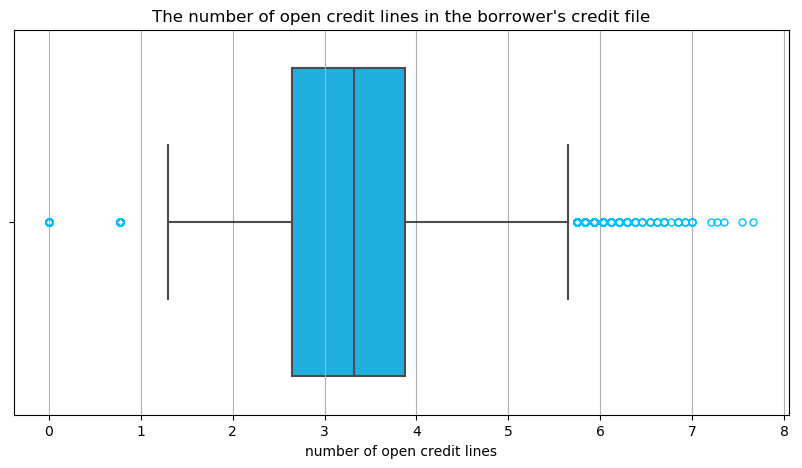

Q1 (25th percentile): 2.646970561107755
Q3 (75th percentile): 3.8707685410290646
IQR: 1.2237979799213097


open_accounts
116         5.741626
359         6.201691
418         6.992508
496         6.201691
548         6.287757
...              ...
54178       0.770906
54184       5.837980
54201       0.770906
54225       0.770906
54229       0.770906

[699 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="open_accounts", 
               title="The number of open credit lines in the borrower's credit file",
               xlabel="number of open credit lines")

# Idetify outlier based on IQR
df_filter_outliers_op = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="open_accounts")
df_filter_outliers_op

The boxplot and QR_filter_outliers method show 693 outliers, 2 data point clusters the left wisker and 21 data clusters in the right wisker. The outliers on the left wisker will be remove and any putlier above 7.2 in the right wisker, since the remaining data point are very close to each other.

In [ ]:
outlier_delete_index_op = df_filter_outliers_op[(df_filter_outliers_op["open_accounts"] < 1) | (df_filter_outliers_op["open_accounts"] > 7.2)].index 
df_prep.remove_outlier(outlier_delete_index_op)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

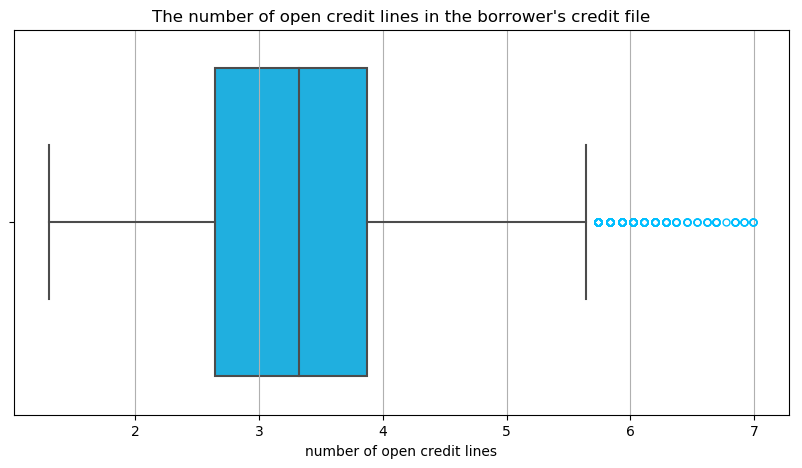

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="open_accounts", 
               title="The number of open credit lines in the borrower's credit file",
               xlabel="number of open credit lines")

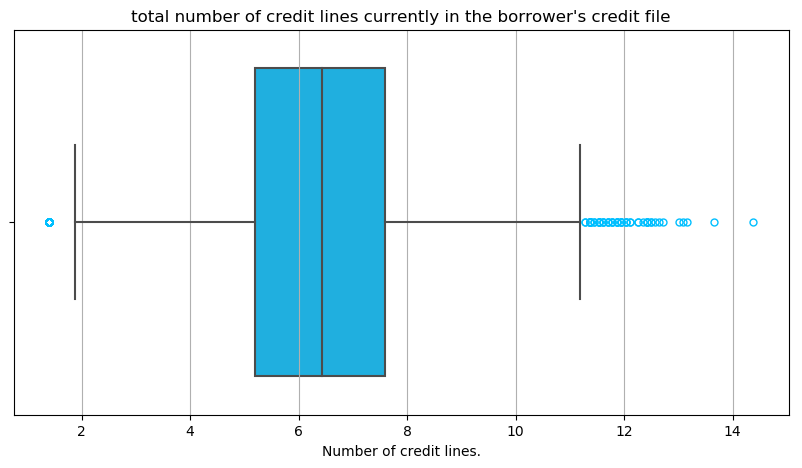

Q1 (25th percentile): 5.1992919027849265
Q3 (75th percentile): 7.599235662437102
IQR: 2.3999437596521753


total_accounts
482         11.534810
613         12.416372
643         11.945014
734         11.365860
904         11.365860
...               ...
54147        1.391312
54164        1.391312
54191        1.391312
54205        1.391312
54214        1.391312

[134 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_accounts", 
               title="total number of credit lines currently in the borrower's credit file",
               xlabel="Number of credit lines.")

# Idetify outlier based on IQR
df_filter_outliers_t_a = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="total_accounts")
df_filter_outliers_t_a

The boxplot and QR_filter_outliers method show 132 outliers, 1 data point clusters the left wisker and several others in the right wisker. The outliers on the left wisker will be remove and any putlier above 12.2 in the right wisker, since the the outliers begin to separate previous overlapping outliers.

In [ ]:
outlier_delete_index_t_a = df_filter_outliers_t_a[(df_filter_outliers_t_a["total_accounts"] < 2.3) | (df_filter_outliers_t_a["total_accounts"] > 12.2)].index 
df_prep.remove_outlier(outlier_delete_index_t_a)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

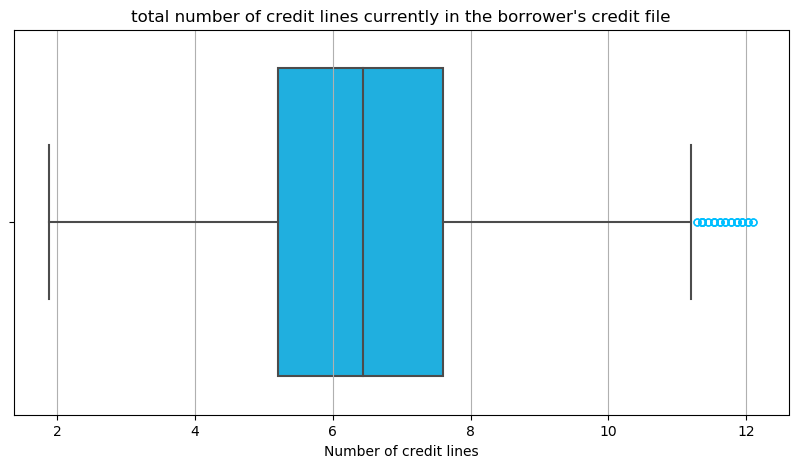

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_accounts", 
               title="total number of credit lines currently in the borrower's credit file",
               xlabel="Number of credit lines")

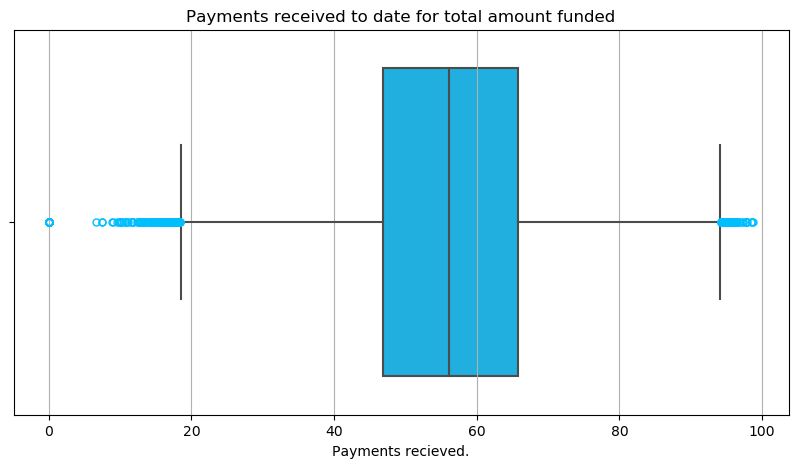

Q1 (25th percentile): 46.84169766959788
Q3 (75th percentile): 65.77328571656616
IQR: 18.931588046968287


total_payment
83         15.826930
162        18.206990
581        17.671838
679        17.749504
1580       18.026431
...              ...
53222      17.287854
53540       0.000000
53593       0.000000
53752      16.773238
53793      13.182246

[213 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_payment", 
               title="Payments received to date for total amount funded",
               xlabel="Payments recieved.")

# Idetify outlier based on IQR
df_filter_outliers_t_p = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="total_payment")
df_filter_outliers_t_p

The boxplot and QR_filter_outliers method show 192 outliers with 3 clusters on the left wisker and two clustes in the right wisker. For both wisker  the outliers that are separating or in their own cluster away from the clusters touching the wisker will be be remove. 

In [ ]:
outlier_delete_index_t_p = df_filter_outliers_t_p[(df_filter_outliers_t_p["total_payment"] < 15) | (df_filter_outliers_t_p["total_payment"] > 97)].index 
df_prep.remove_outlier(outlier_delete_index_t_p)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

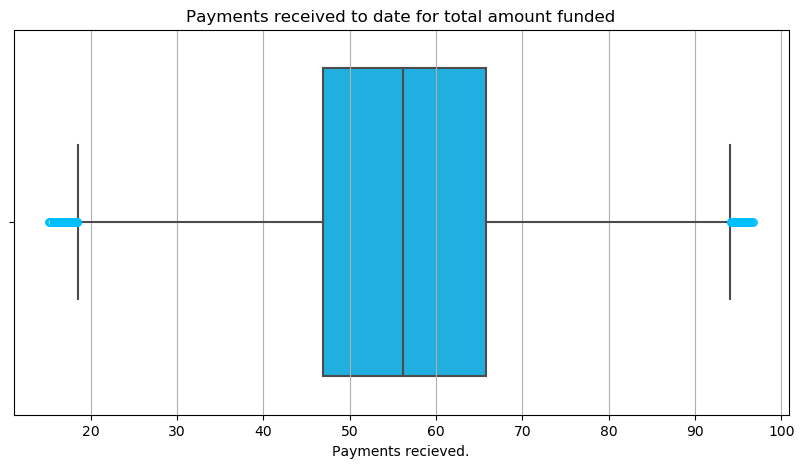

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_payment", 
               title="Payments received to date for total amount funded",
               xlabel="Payments recieved.")

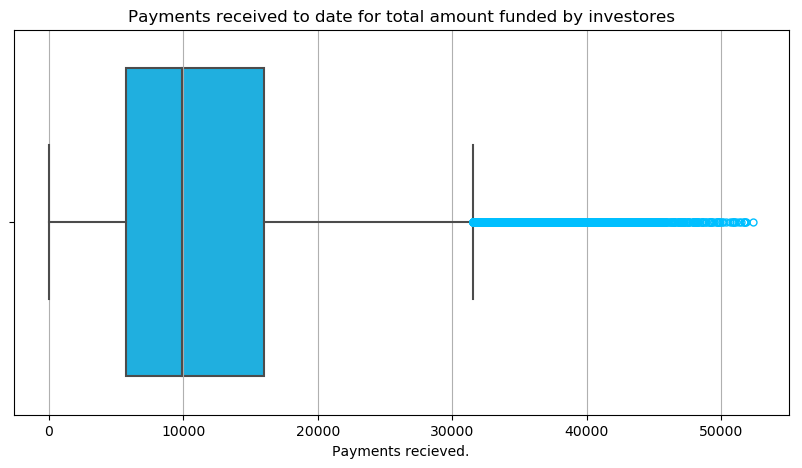

Q1 (25th percentile): 5720.665
Q3 (75th percentile): 16035.720000000001
IQR: 10315.055


total_payment_inv
204             36535.24
230             41837.26
263             32741.69
408             36558.91
685             37477.70
...                  ...
49559           31544.53
49624           32363.29
49864           32336.19
50224           32334.91
50271           32815.67

[1711 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_payment_inv", 
               title="Payments received to date for total amount funded by investores",
               xlabel="Payments recieved.")

# Idetify outlier based on IQR
df_filter_outliers_t_i = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="total_payment_inv")
df_filter_outliers_t_i

The boxplot and QR_filter_outliers method show 1711 outliers with 1 main clustes in the right wisker. Outlier above 47000 will be remove, which are the outliers that are separting from the main cluster.

In [ ]:
outlier_delete_index_t_i = df_filter_outliers_t_i[df_filter_outliers_t_i["total_payment_inv"] > 47000].index 
df_prep.remove_outlier(outlier_delete_index_t_i)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

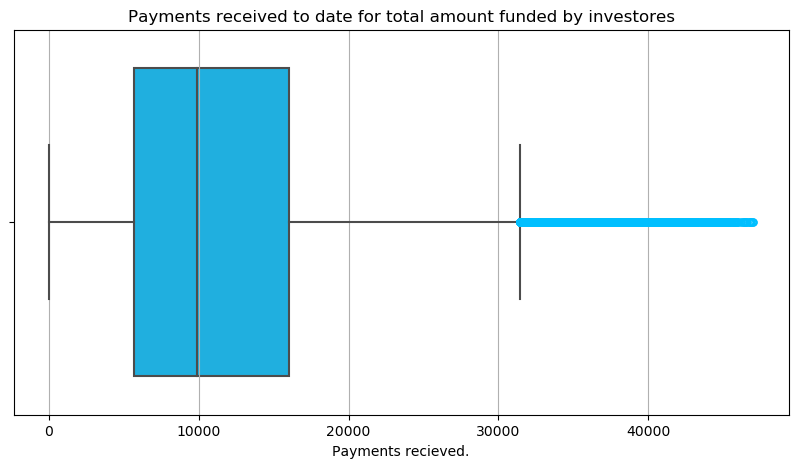

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_payment_inv", 
               title="Payments received to date for total amount funded by investores",
               xlabel="Payments recieved.")

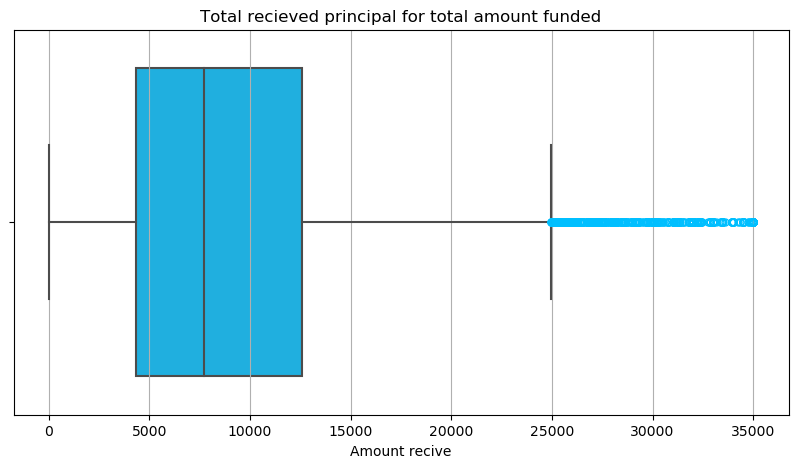

Q1 (25th percentile): 4317.8525
Q3 (75th percentile): 12566.2425
IQR: 8248.39


total_rec_prncp
38             25000.0
66             28000.0
74             25000.0
75             28000.0
204            35000.0
...                ...
53865          25000.0
53881          25000.0
53940          25000.0
54064          25000.0
54077          25000.0

[2252 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_rec_prncp", 
               title="Total recieved principal for total amount funded",
               xlabel="Amount recive")

# Idetify outlier based on IQR
df_filter_outliers_t_rec_pr = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="total_rec_prncp")
df_filter_outliers_t_rec_pr

The boxplot and QR_filter_outliers method show 2249 outliers with 1 main clustes in the right wisker. Outlier above 33000 will be remove, which are the outliers that are separting from the main cluster.

In [ ]:
outlier_delete_index_t_rec_pr = df_filter_outliers_t_rec_pr[df_filter_outliers_t_rec_pr["total_rec_prncp"] > 30200].index 
df_prep.remove_outlier(outlier_delete_index_t_rec_pr)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

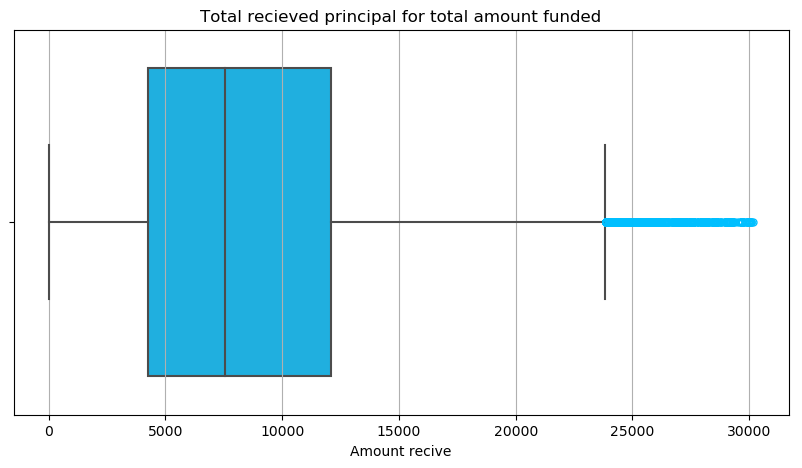

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_rec_prncp", 
               title="Total recieved principal for total amount funded",
               xlabel="Amount recive")

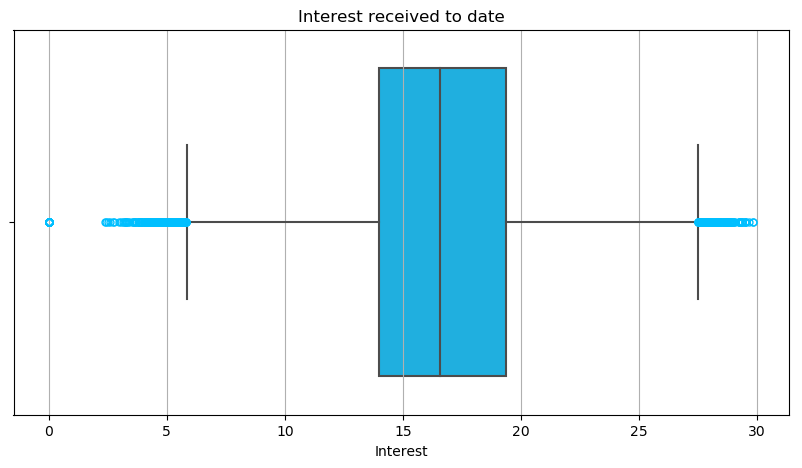

Q1 (25th percentile): 13.968024743238923
Q3 (75th percentile): 19.380720857585764
IQR: 5.412696114346842


total_rec_int
124         4.893728
353         3.902610
389         4.302402
1598        4.889423
1931        2.530731
...              ...
52871       5.000091
53204       5.261335
53209       3.578326
53300       5.748632
53405       4.981205

[434 rows x 1 columns]

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_rec_int", 
               title="Interest received to date",
               xlabel="Interest")

# Idetify outlier based on IQR
df_filter_outliers_t_r_i = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="total_rec_int")
df_filter_outliers_t_r_i

The boxplot and QR_filter_outliers method show 2249 outliers with 2 main clustes in the right wisker and 1 main cluster in the right wisker. Outlier less than 4 and above 28 will be remove, which are the outliers that are separting from the main cluster.

In [ ]:
outlier_delete_index_t_r_i = df_filter_outliers_t_r_i[(df_filter_outliers_t_r_i["total_rec_int"] < 4) | (df_filter_outliers_t_r_i["total_rec_int"] > 28) ].index 
df_prep.remove_outlier(outlier_delete_index_t_r_i)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

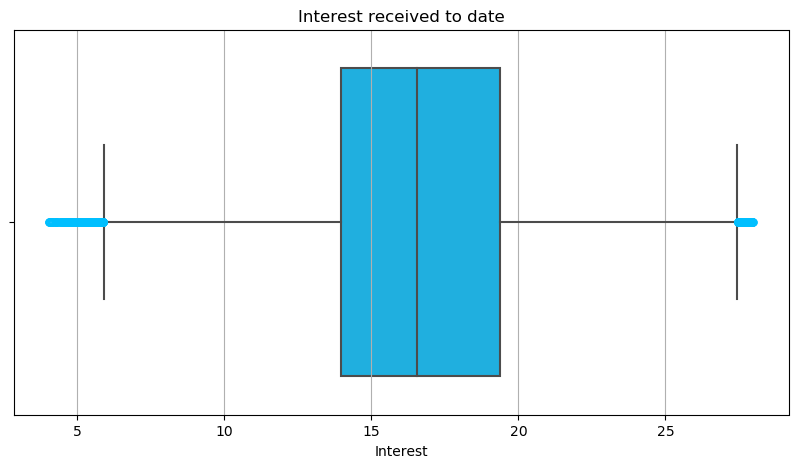

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="total_rec_int", 
               title="Interest received to date",
               xlabel="Interest")

In [ ]:
# Idetify outlier based on IQR
df_filter_outliers_l_p_d= df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="last_payment_date")
df_filter_outliers_l_p_d

Q1 (25th percentile): 2019-11-01 00:00:00
Q3 (75th percentile): 2022-01-01 00:00:00
IQR: 792 days 00:00:00


last_payment_date
42473        2016-02-01
47773        2016-07-01
48030        2016-07-01
48059        2016-07-01
48062        2016-07-01
...                 ...
54222        2014-04-01
54223        2016-06-01
54224        2016-06-01
54226        2016-07-01
54230        2014-03-01

[1078 rows x 1 columns]

QR_filter_outliers method show 1069 outliers. However since dates can be affected by several other variables, the data will remain.

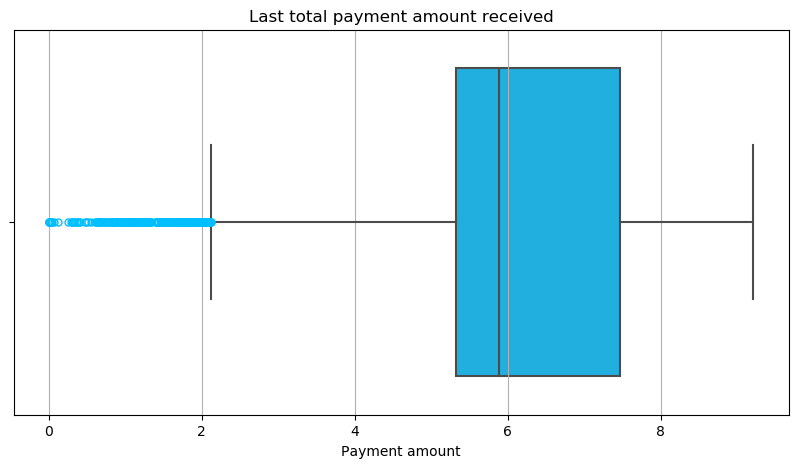

Q1 (25th percentile): 5.324503064135206
Q3 (75th percentile): 7.462243205980544
IQR: 2.137740141845338


last_payment_amount
949               0.687742
957               0.491939
1234              0.906861
4900              0.803539
5041              0.985793
...                    ...
54056             1.267938
54153             1.840078
54180             0.866858
54197             1.693063
54222             0.000000

[227 rows x 1 columns]

In [ ]:

plots.box_plot(dataframe=df_prep.dataframe, 
               column="last_payment_amount", 
               title="Last total payment amount received",
               xlabel="Payment amount")

# Idetify outlier based on IQR
df_filter_outliers_l_p_a = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="last_payment_amount")
df_filter_outliers_l_p_a

The boxplot and QR_filter_outliers method show 223 outliers with twom main cluster data points. Outliers less than 1.7 since from that values data points begin to separate from the main cluster touchin the wisker.

In [ ]:
outlier_delete_index_l_p_a = df_filter_outliers_l_p_a[df_filter_outliers_l_p_a["last_payment_amount"] < 1.7].index 
df_prep.remove_outlier(outlier_delete_index_l_p_a)

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      

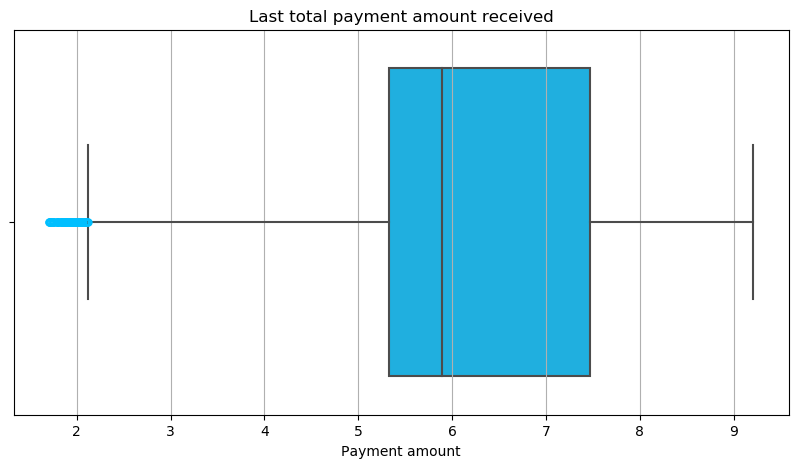

In [ ]:
plots.box_plot(dataframe=df_prep.dataframe, 
               column="last_payment_amount", 
               title="Last total payment amount received",
               xlabel="Payment amount")

In [ ]:
# Idetify outlier based on IQR
df_filter_outliers_n_p_d = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="next_payment_date")
df_filter_outliers_n_p_d

Q1 (25th percentile): 2022-02-01 00:00:00
Q3 (75th percentile): 2022-02-01 00:00:00
IQR: 0 days 00:00:00


next_payment_date
152          2022-01-01
234          2022-01-01
361          2022-01-01
526          2022-01-01
774          2022-01-01
...                 ...
54221        2016-11-01
54223        2016-07-01
54224        2016-07-01
54228        2016-09-01
54230        2014-12-01

[3350 rows x 1 columns]

Since dates can be infleunce by several other factors, this data will remain.

In [ ]:
# Idetify outlier based on IQR
df_filter_outliers_l_c_p = df_inf.IQR_filter_outliers(dataframe=df_prep.dataframe, column="last_credit_pull_date")
df_filter_outliers_l_c_p

Q1 (25th percentile): 2021-02-01 00:00:00
Q3 (75th percentile): 2022-01-01 00:00:00
IQR: 334 days 00:00:00


last_credit_pull_date
24969            2019-09-01
28611            2019-09-01
29165            2019-09-01
29209            2019-08-01
29878            2019-09-01
...                     ...
54220            2013-06-01
54226            2016-07-01
54227            2016-09-01
54228            2013-05-01
54230            2015-01-01

[6093 rows x 1 columns]

Since dates can be infleunce by several other factors, this data will remain.

# Correlation


Highly correlated column can predict with very high degree of accuracy, and thus making the dataframe more compact. Thios section aim tocheck  the correlation between the columns of the data frame and then select wether to remove or leave tose columns in the data.

The correlation matrix will be compute for the whole data frame to idetify possible correlating columns.

In [ ]:
sns.pairplot(df_prep.dataframe)
plt.show()

KeyboardInterrupt: 

From the above figure correlation between varibales of the dataframe can be seen predominately positive correlation across the dataset, such as:


funded amount:
- total_account
- out_prncp 
- total_rec_late_fee linear
- recoveries 
- collection_fee_linear

fundedamount_inv:
- out_prncp 
- out_prncp_inv


instalmest:
- loan_amount
- annual_inc 
- out_prcncp 
- out_prcncp_inv 
- total_payment 
- total_payment_inv 
- total_rec_prcnp 
- total_rec_int 
	
annual_inc
- loan_amount 
- instalment 
- ut_prcncp 
- out_prcncp_inv 
- total_payment_inv 
- total_rec_prcnp 
- total_rec_int 

To better visualise the correlation between the variables in the dataset a heat map was created using pearson's correalation with a threshold value of 0.90. This satatictic was chosen because measures linear relationships and is sensitive to both magnitud and direction of the linear association. In addtion the data has been normalize and the outliers were dealt with. However, since all the outliers were deleted Kendall and Spearman could also be used since they are more robust and make fewer assumptions about the distribution of the data.

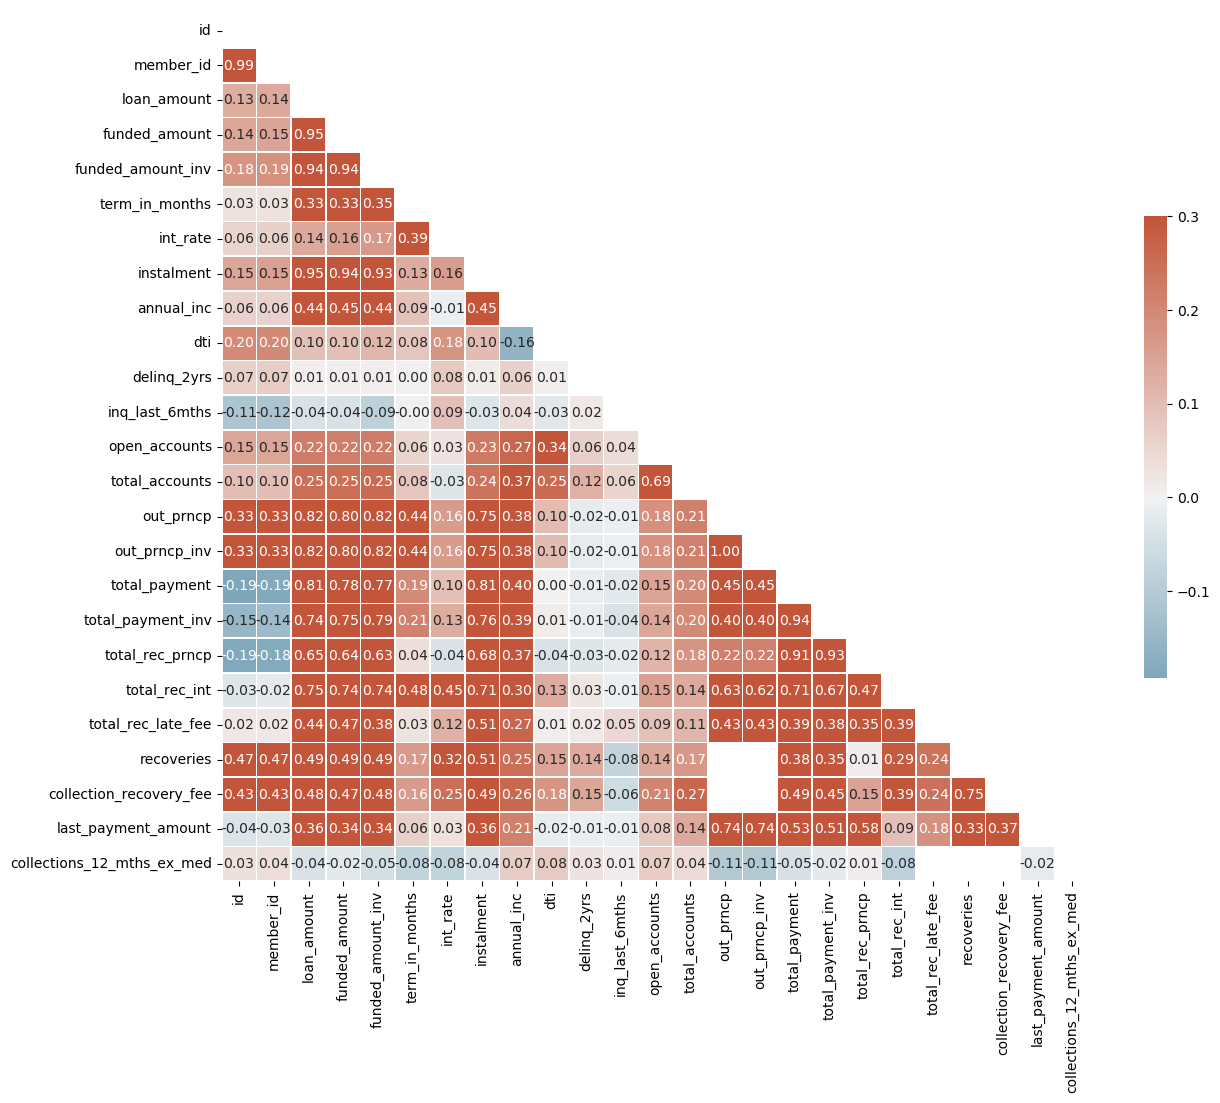

In [ ]:
# Calculate correlation matrix
corr = df_prep.dataframe.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate  a palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Generate heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The above figure show pearson's correalation predominately positive correlation in the dataset, particularly with:
- loan_amount
- funded_amount
- funded_amount_inv
- instalment
- annual_inc
- out_prncp
- out_prncp
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- Collection_recovery_fee

Interestintly the heatmap showed no correlation between recovery, collection_recovery_fee and out_prncp and out_prncp_inv


Based on the threhold value of 0.90 these are the columns correlated:
funded_amount: loan_amount

funded_amount_inv: loan_amount, funded_amount

Instalment: loan_amount

annual_inc: loan_amount, instalment, funded_amount_inv

total_payment_inv: total_payment

total_rec_prncp: total_payment, total_payment_inv


With regards to funded_amount, loan_amount, funded_amount_inv, instalmets and annual_inc. They reflect different importan aspects of the loan. Deleting them will hinder the interpredation adn further analysis of the data. Therefore these columns will remian.

Since total_rec_prncp is correlated to total_payment, total_payment_inv, which are more important for inepretation, total_rec_prncp could be removed. Therefore,  two linear regresion models will be created and based on the Variance Inflation Factor (IVF) values one of the columns will be removed. VIF is greater than 1 shows the presence of multicollinearity and therefore one of the columns will be remove.

In [ ]:
# Fit a linear regression model to try and predict total_rec_prncp 
t_r_p_model = smf.ols("total_rec_prncp ~ total_payment + total_payment_inv", df_prep.dataframe).fit()
t_p_model = smf.ols("total_payment ~ total_rec_prncp + total_payment_inv", df_prep.dataframe).fit()
t_p_i_model = smf.ols("total_payment_inv  ~ total_rec_prncp + total_payment", df_prep.dataframe).fit()

# Calculate Variance Inflation factor
VIF_t_r_p_model = round(1/(1-t_r_p_model.rsquared), 2)
VIF_t_p_model = round(1/(1-t_p_model.rsquared), 2)
VIF_t_p_i_model = round(1/(1-t_p_i_model.rsquared), 2)

#Print results
print(f"VIF scores: \n total_rec_prncp: {VIF_t_r_p_model} \n total_payment: {VIF_t_p_model} \n total_payment_inv: {VIF_t_p_i_model}")

VIF scores: 
 total_rec_prncp: 8.08 
 total_payment: 9.6 
 total_payment_inv: 11.6


The VIF values shows the presence of multicollinearity between total_rec_prncp, total_payment and total_payment_inv with the model predicting the total_payment_inv being the highest. However, total_payment and total_payment_inv are more helpful at intepreting the dataset than total_rec_prncp. Therefore that column will be removed.

In [ ]:
df_prep.remove_columns("total_rec_prncp")

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848     8.987197      71.760707         119.794551   
1      38656203   41440010     9.487972      86.856126         150.204319   
2      38656154   41439961     9.680344      93.437127         163.807197   
3      38656128   41439934     9.615805      91.177071         159.113389   
4      38656121   41439927     9.615805      91.177071         159.113389   
...         ...        ...          ...            ...                ...   
54224     88046      88023     8.389360      57.033377          54.023411   
54226     76597      76583     8.517193      59.915634          60.277328   
54227    142608      74724     8.517193      59.915634          68.575837   
54228    117045      70978     8.160518      52.200934          66.877246   
54230     72323      70694     8.517193      59.915634          28.173564   

       term_in_months  int_rate  instalment grade sub_grade  ...  \
0                36.0      7.49   16.248288     A        A4  ...   
1                36.0      6.99   19.752465     A        A3  ...   
2                36.0      7.49   21.347193     A        A4  ...   
3                36.0     14.31   21.631018     C        C4  ...   
4                36.0      6.03   20.645917     A        A1  ...   
...               ...       ...         ...   ...       ...  ...   
54224            36.0      9.64   12.888321     B        B4  ...   
54226            36.0      9.01   13.539386     B        B2  ...   
54227            36.0     10.59   13.668753     C        C2  ...   
54228            36.0      7.43   11.542816     A        A2  ...   
54230            36.0     11.54   13.746475     C        C5  ...   

      total_rec_late_fee recoveries  collection_recovery_fee  \
0                   -inf       -inf                     -inf   
1                   -inf       -inf                     -inf   
2                   -inf       -inf                     -inf   
3                   -inf       -inf                     -inf   
4                   -inf       -inf                     -inf   
...                  ...        ...                      ...   
54224               -inf       -inf                     -inf   
54226               -inf       -inf                     -inf   
54227           4.653411       -inf                     -inf   
54228               -inf       -inf                     -inf   
54230               -inf   5.205489                 0.609766   

      last_payment_date last_payment_amount next_payment_date  \
0            2022-01-01            5.189973        2022-02-01   
1            2022-01-01            5.621638        2022-02-01   
2            2021-10-01            8.517393        2022-02-01   
3            2021-06-01            8.580717        2022-02-01   
4            2022-01-01            5.720426        2022-02-01   
...                 ...                 ...               ...   
54224        2016-06-01            4.702410        2016-07-01   
54226        2016-07-01            4.803646        2022-02-01   
54227        2016-10-01            5.781842        2022-02-01   
54228        2016-09-01            4.472062        2016-09-01   
54230        2014-03-01            4.827368        2014-12-01   

      last_credit_pull_date collections_12_mths_ex_med  policy_code  \
0                2022-01-01                       -inf            1   
1                2022-01-01                       -inf            1   
2                2021-10-01                       -inf            1   
3                2021-06-01                       -inf            1   
4                2022-01-01                       -inf            1   
...                     ...                        ...          ...   
54224            2021-02-01                       -inf            1   
54226            2016-07-01                       -inf            1   
54227            2016-09-01                       -inf            1   
54228      